1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Hierarchical Clustering</a>
7. <a href="#6">DBSCAN</a>
8. <a href="#7">GMM</a>
9. <a href="#7">Cluster Analysis</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

data_path = r'E:/ITI/Unsupervised ML/Project/CC GENERAL.CSV'   #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


- **CUST_ID**: Identification of Credit Card holder (Categorical)
- **BALANCE**: Balance amount left in their account to make purchases
- **BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES**: Amount of purchases made from account
- **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
- **CASH_ADVANCE**: Cash in advance given by the user
- **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY**: How frequently the cash in advance being paid
- **CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX**: Number of purchase transactions made
- **CREDIT_LIMIT**: Limit of Credit Card for user
- **PAYMENTS**: Amount of Payment done by user
- **MINIMUM_PAYMENTS**: Minimum amount of payments made by user
- **PRCFULLPAYMENT**: Percent of full payment paid by user
- **TENURE**: Tenure of credit card service for user


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

In [4]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# This will print basic statistics for numerical columns
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

There is something illogical about 'CASH_ADVANCE_FREQUENCY' coulmn it has Max equal 1.5 and logically the maximum value should be 1

In [9]:
# Check for duplicate rows
df.duplicated().sum()

0

There are no duplicate rows in the dataframe

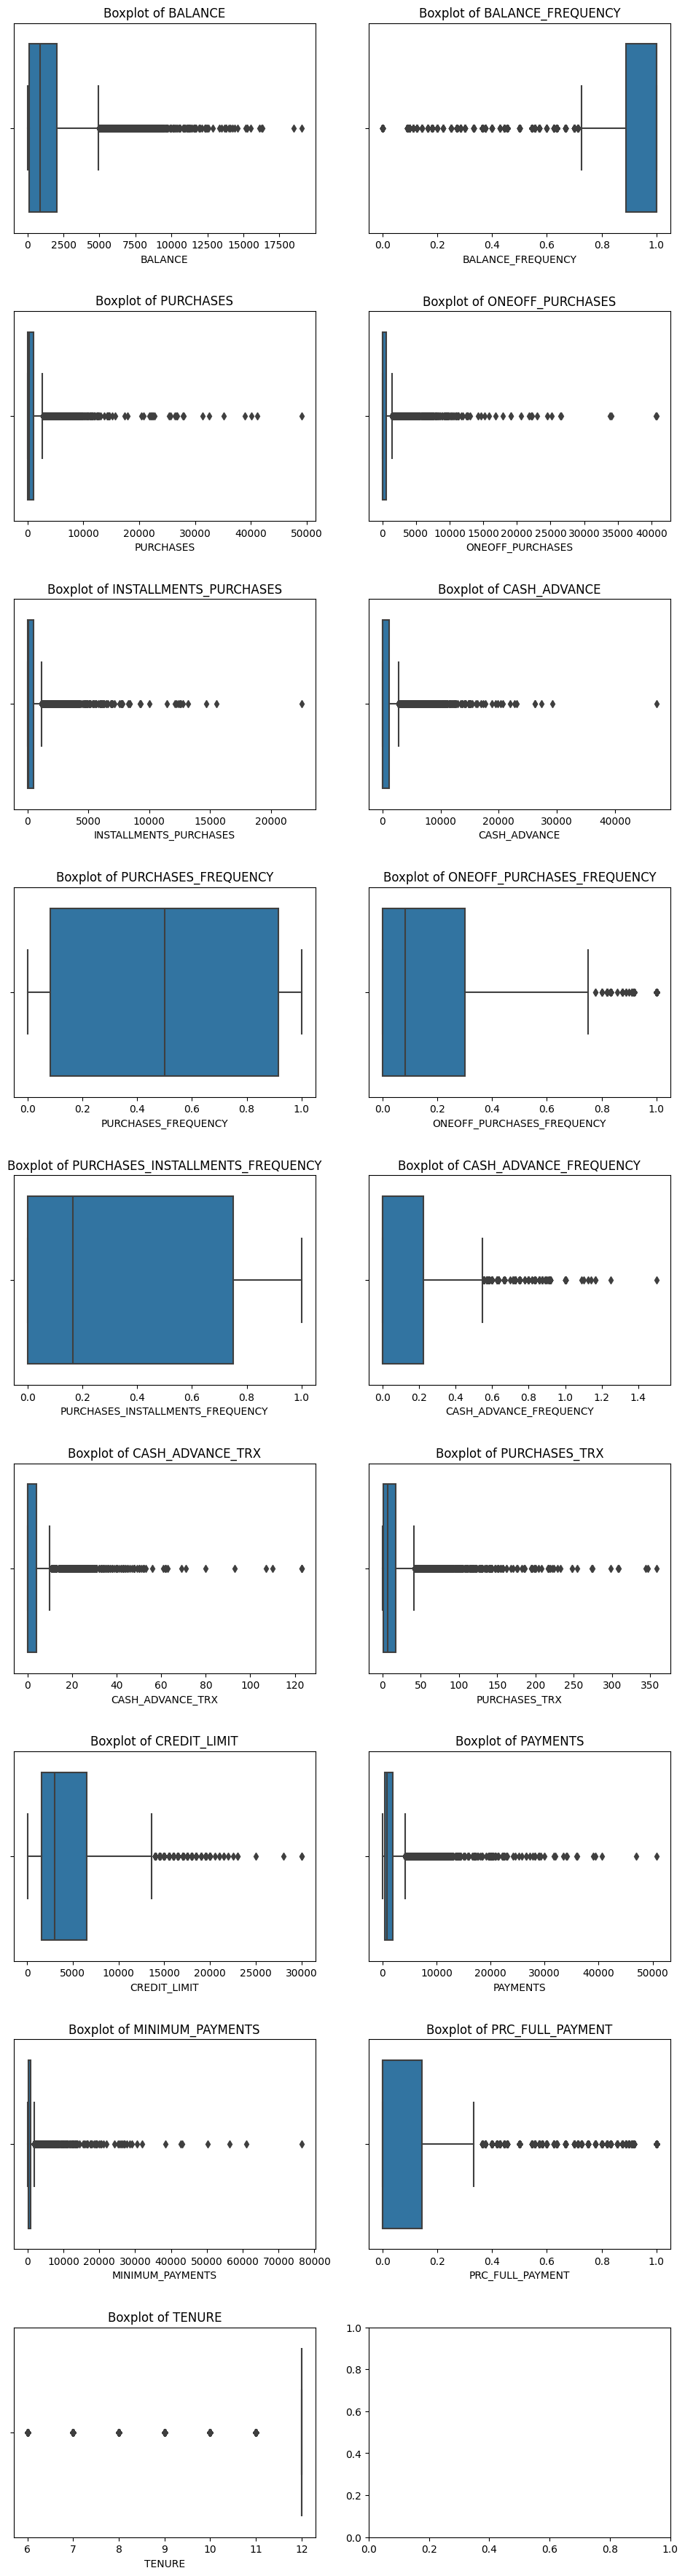

In [10]:
# check for outliers
columns_of_interest = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE']

def plot_boxplots(dataframe, columns_of_interest):
    num_cols = len(columns_of_interest)
    num_rows = int(np.ceil(num_cols / 2))  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows*4))  # Create subplots with multiple rows

    for i, column in enumerate(columns_of_interest):
        row_index = i // 2  # Calculate the row index for the subplot
        col_index = i % 2   # Calculate the column index for the subplot
        sns.boxplot(data=dataframe, x=column, ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f'Boxplot of {column}')

    plt.tight_layout(pad=3.0)  # Adjust the spacing between subplots
    plt.show()

plot_boxplots(df, columns_of_interest)

From the figure above we can see that almost every column in the datafrmae have outliers except for **PURCHASES_FREQUENCY** and **PURCHASES_INSTALLMENTS_FREQUENCY**


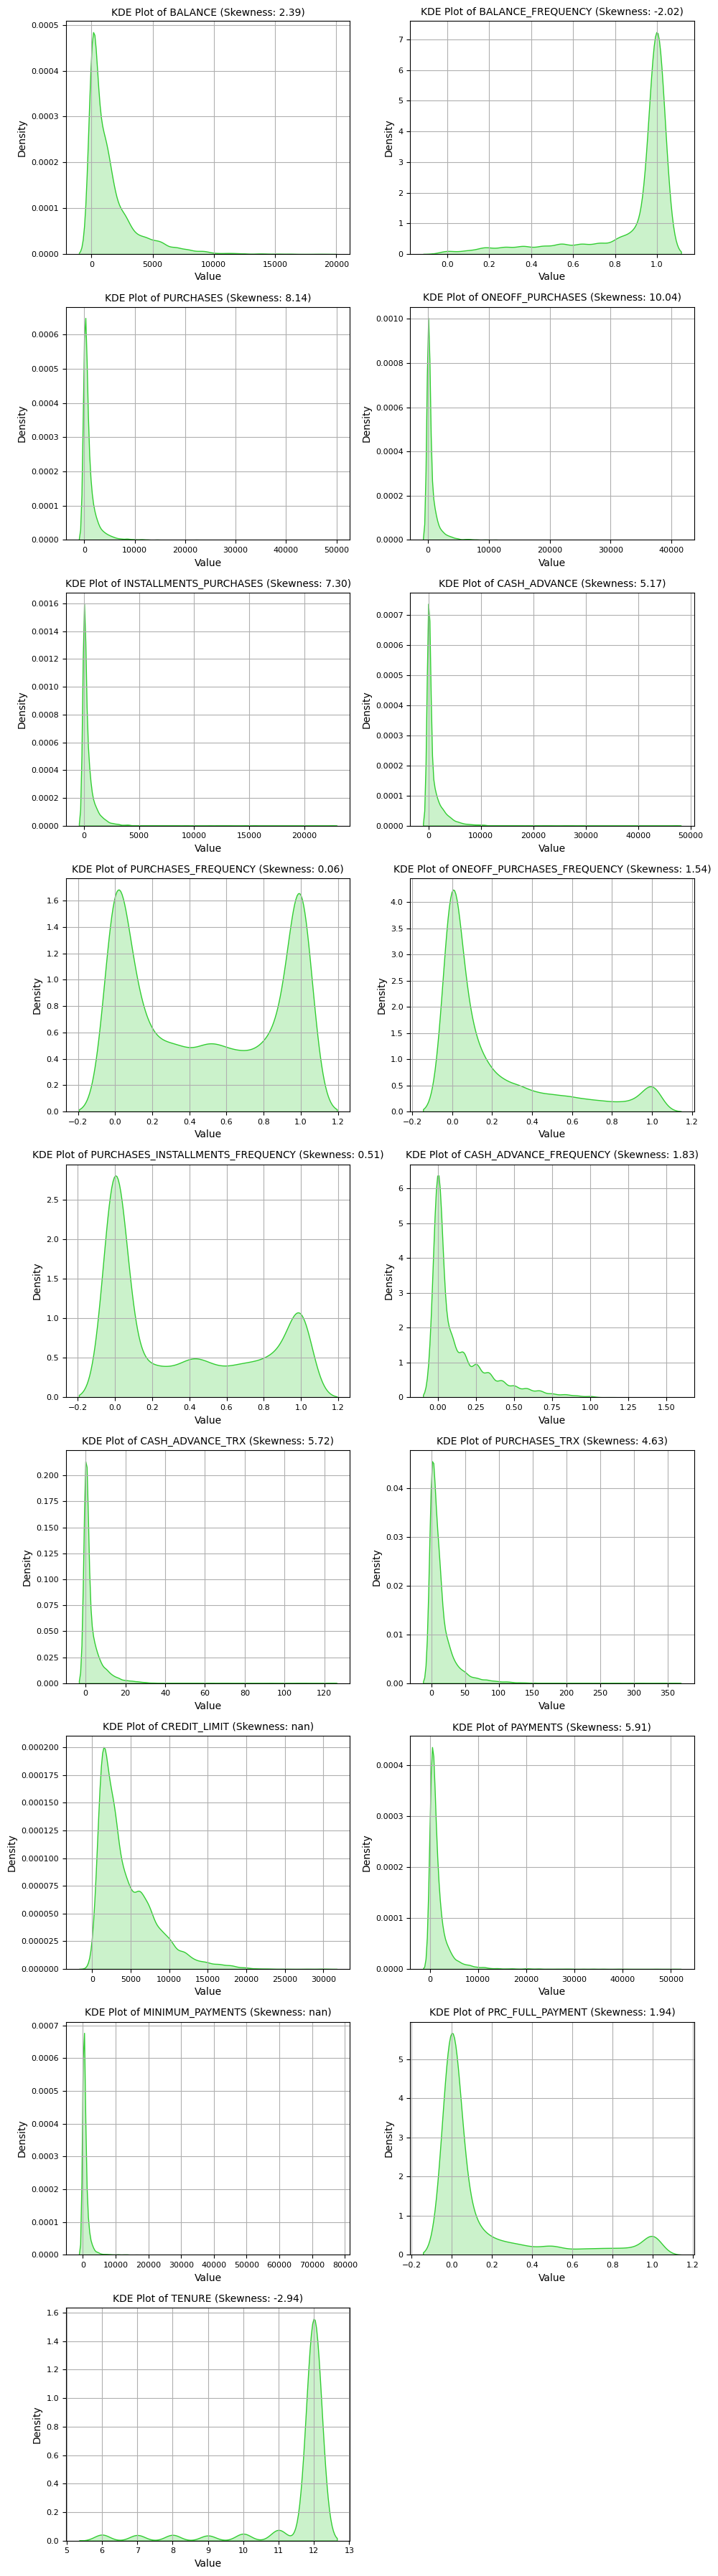

In [11]:
# Check for distribution of columns (Skewness)

def explore_skewness(dataframe):
    # Select numerical columns
    numerical_columns = dataframe.select_dtypes(include=np.number).columns

    # Create subplots
    num_cols = len(numerical_columns)
    num_rows = int(np.ceil(num_cols / 2))
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Loop through each numerical column
    for i, column in enumerate(numerical_columns):
        # Calculate skewness
        skewness = skew(dataframe[column])

        # Plot KDE plot with grid and fill the area under the curve
        sns.kdeplot(dataframe[column], ax=axes[i], fill=True,color= 'limegreen')
        axes[i].set_title(f'KDE Plot of {column} (Skewness: {skewness:.2f})',fontsize=10)
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Density')
        axes[i].grid(True)
        axes[i].tick_params(axis='x', labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)

    # Remove empty subplot(s)
    for j in range(i + 1, len(axes)):
        axes[j].remove()

    # Adjust layout
    plt.tight_layout()
    plt.show()

explore_skewness(df)


From the figures above we can see that:
- Most of the columns in the dataframe are highly skewed, either negatively or positively.
- There are only 2 columns in the dataframe that show slight skewness, these columns are **PURCHASES_FREQUENCY** and **PURCHASES_INSTALLMENTS_FREQUENCY**

### EDA on the dataset before clustring

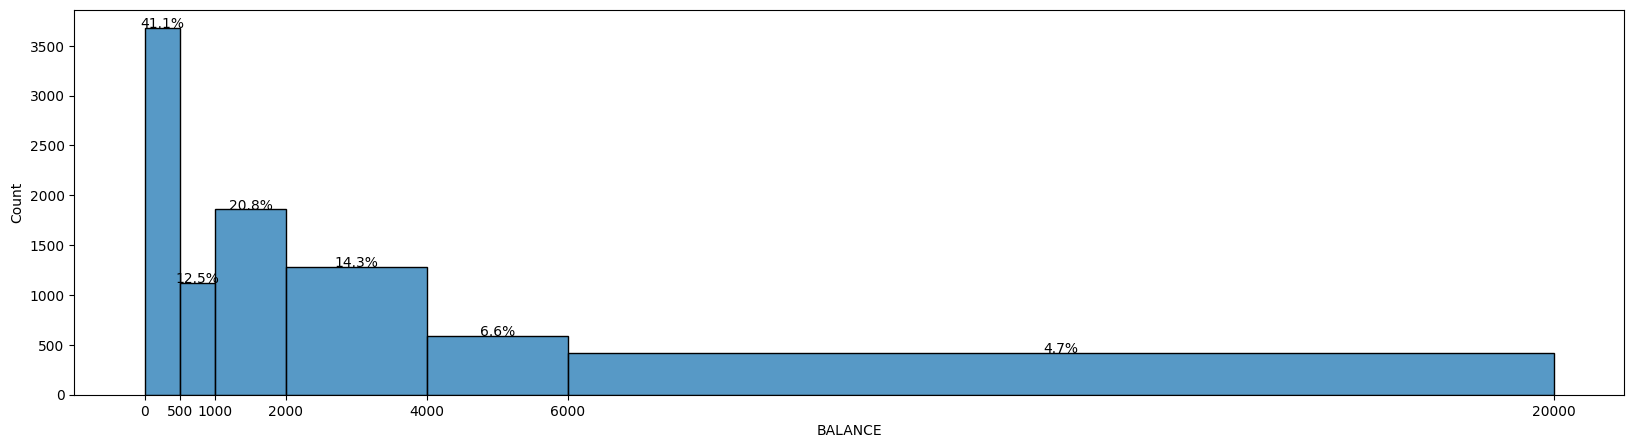

In [12]:
# Histogram plot of Balance column
col = ['BALANCE']
bins = [0, 500, 1000, 2000,4000, 6000, 20000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the figure above:
- A large portion (41.1%) of customers maintain relatively low balances (between 0 and 500), indicating conservative spending habits or prompt payment behavior.
- Only a small percentage (4.7%) of customers have high balances exceeding 6000, suggesting that a majority of customers avoid carrying significant debt on their credit cards.

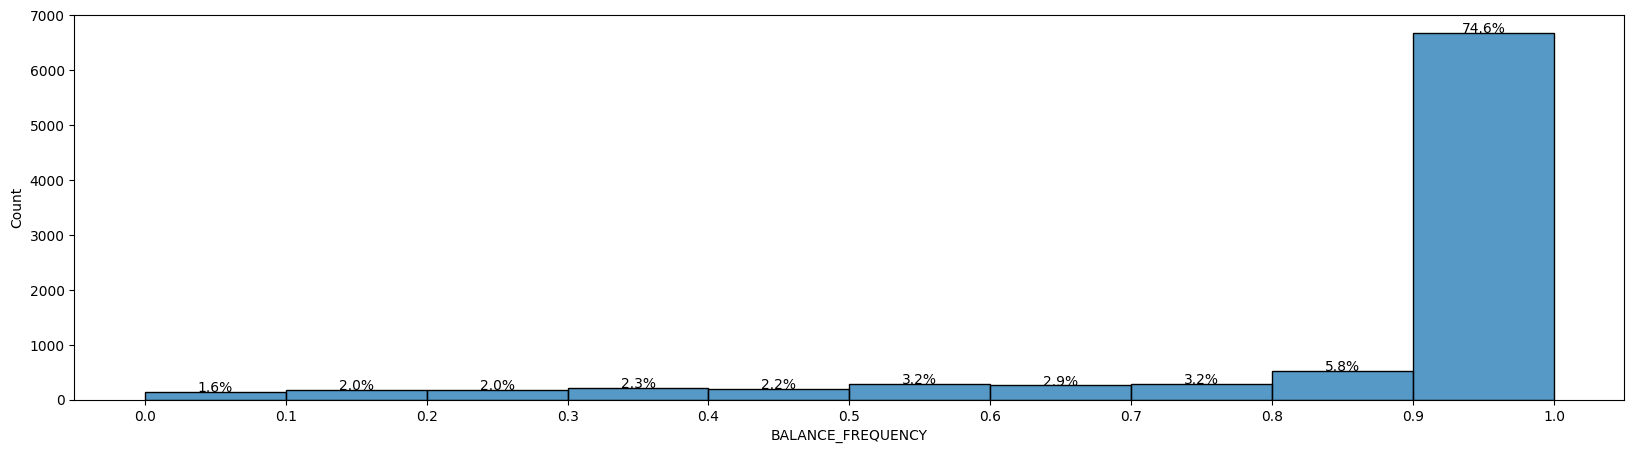

In [13]:
# Histogram plot of BALANCE_FREQUENCY column
col = ['BALANCE_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()


From the figure above:
- The majority of customers (74.6%) frequently update their balances.

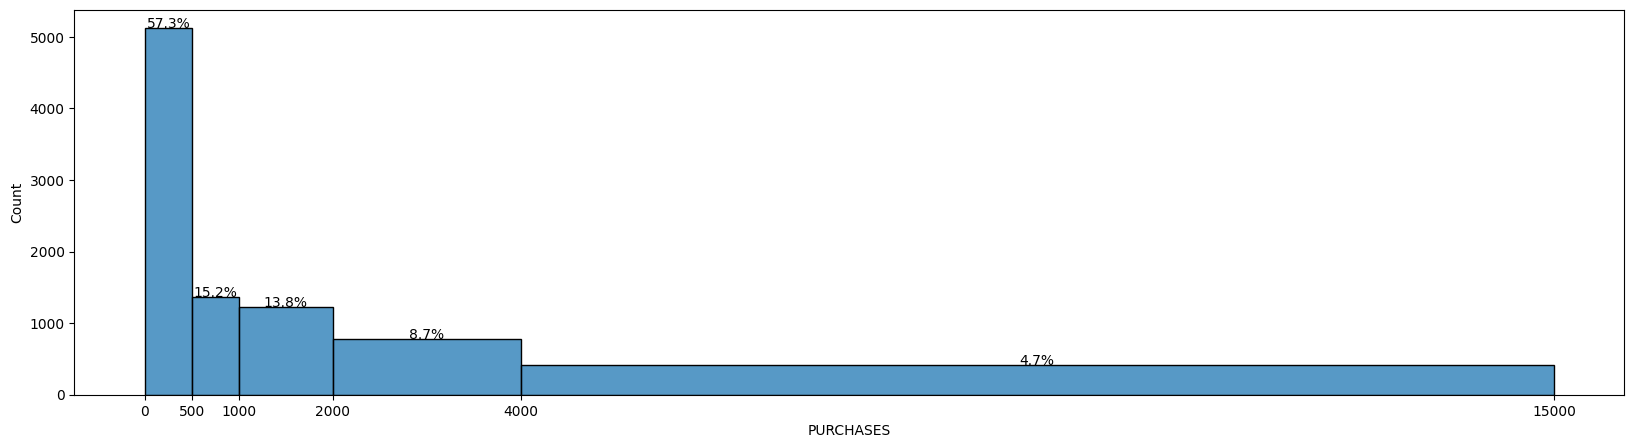

In [14]:
# Histogram plot of PURCHASES column

col = ['PURCHASES']
bins = [0, 500,1000, 2000, 4000,15000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()


From the figure above:
- 57.3% of customers have a total purchase amount ranging from 0 to 500.This suggests that a large portion of customers makes relatively small purchases or infrequent purchases from their accounts
- Only 4.7% of customers have a total purchase amount exceeding 4000.This indicates that a minority of customers make larger and potentially more frequent purchases.

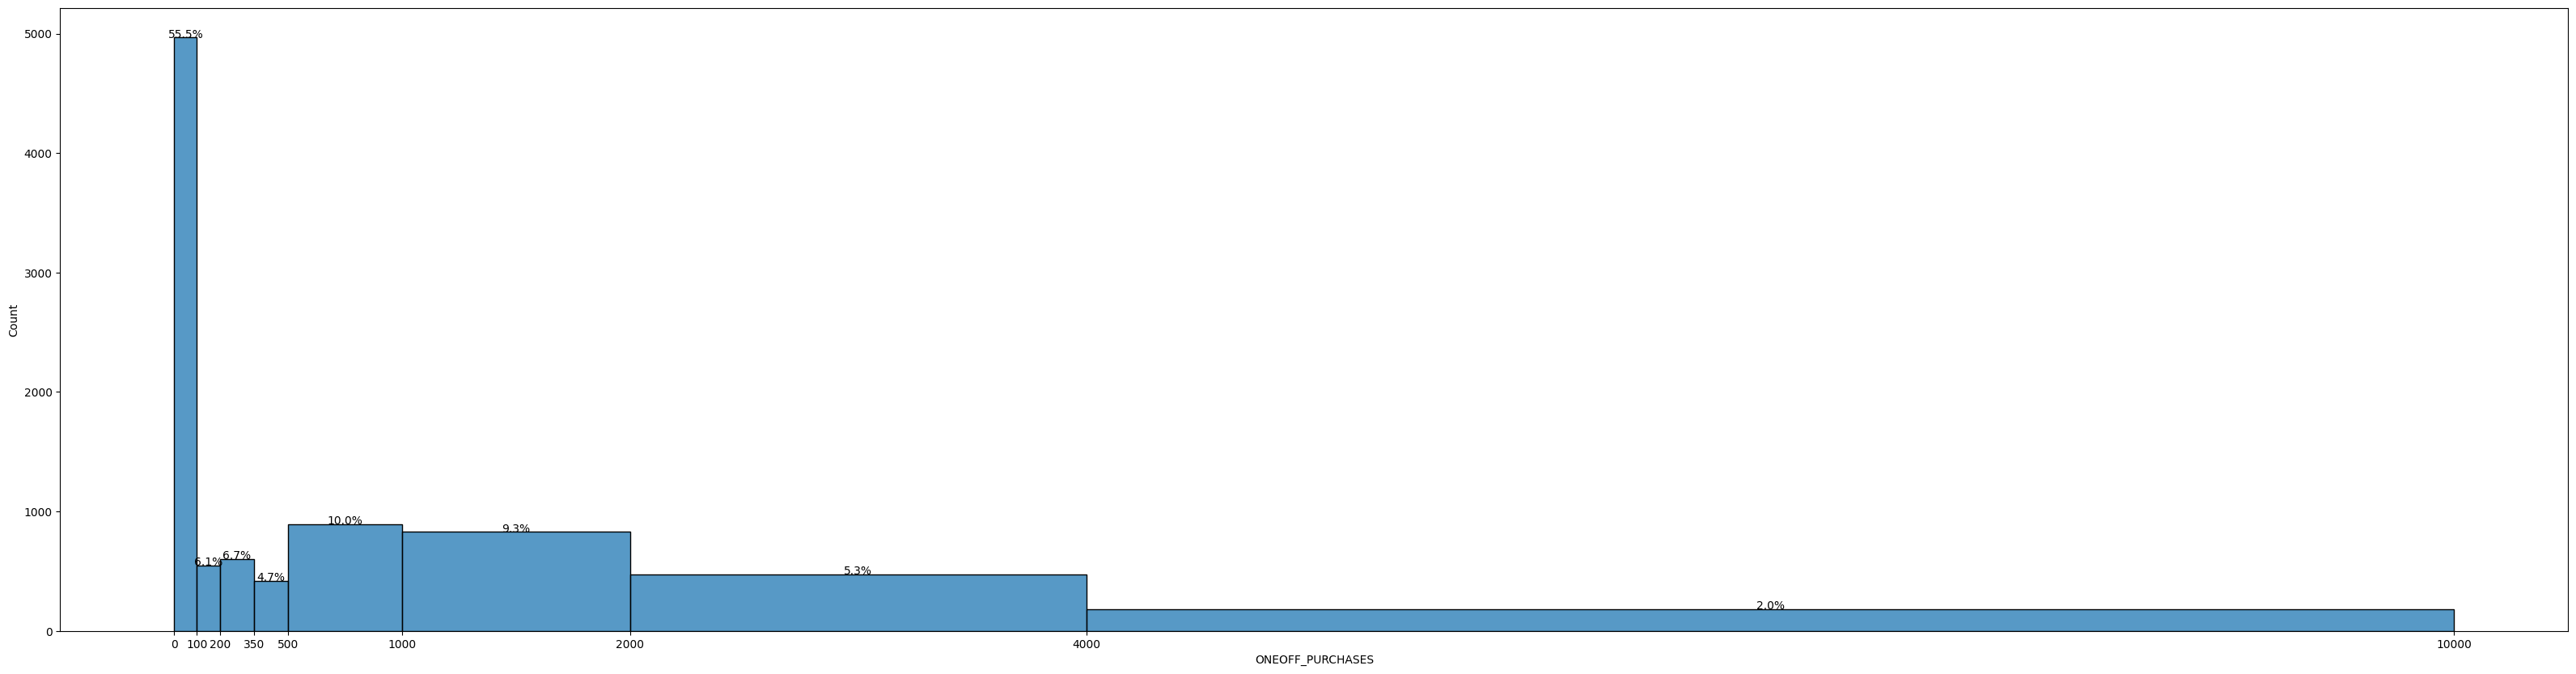

In [15]:
# Histogram plot of ONEOFF_PURCHASES column
col = ['ONEOFF_PURCHASES']
bins = [0,100,200,350, 500,1000, 2000, 4000,10000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(40, 10))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()


From the figure above:
- It's evident that a significant majority of customers tend to avoid making large one-time purchases.

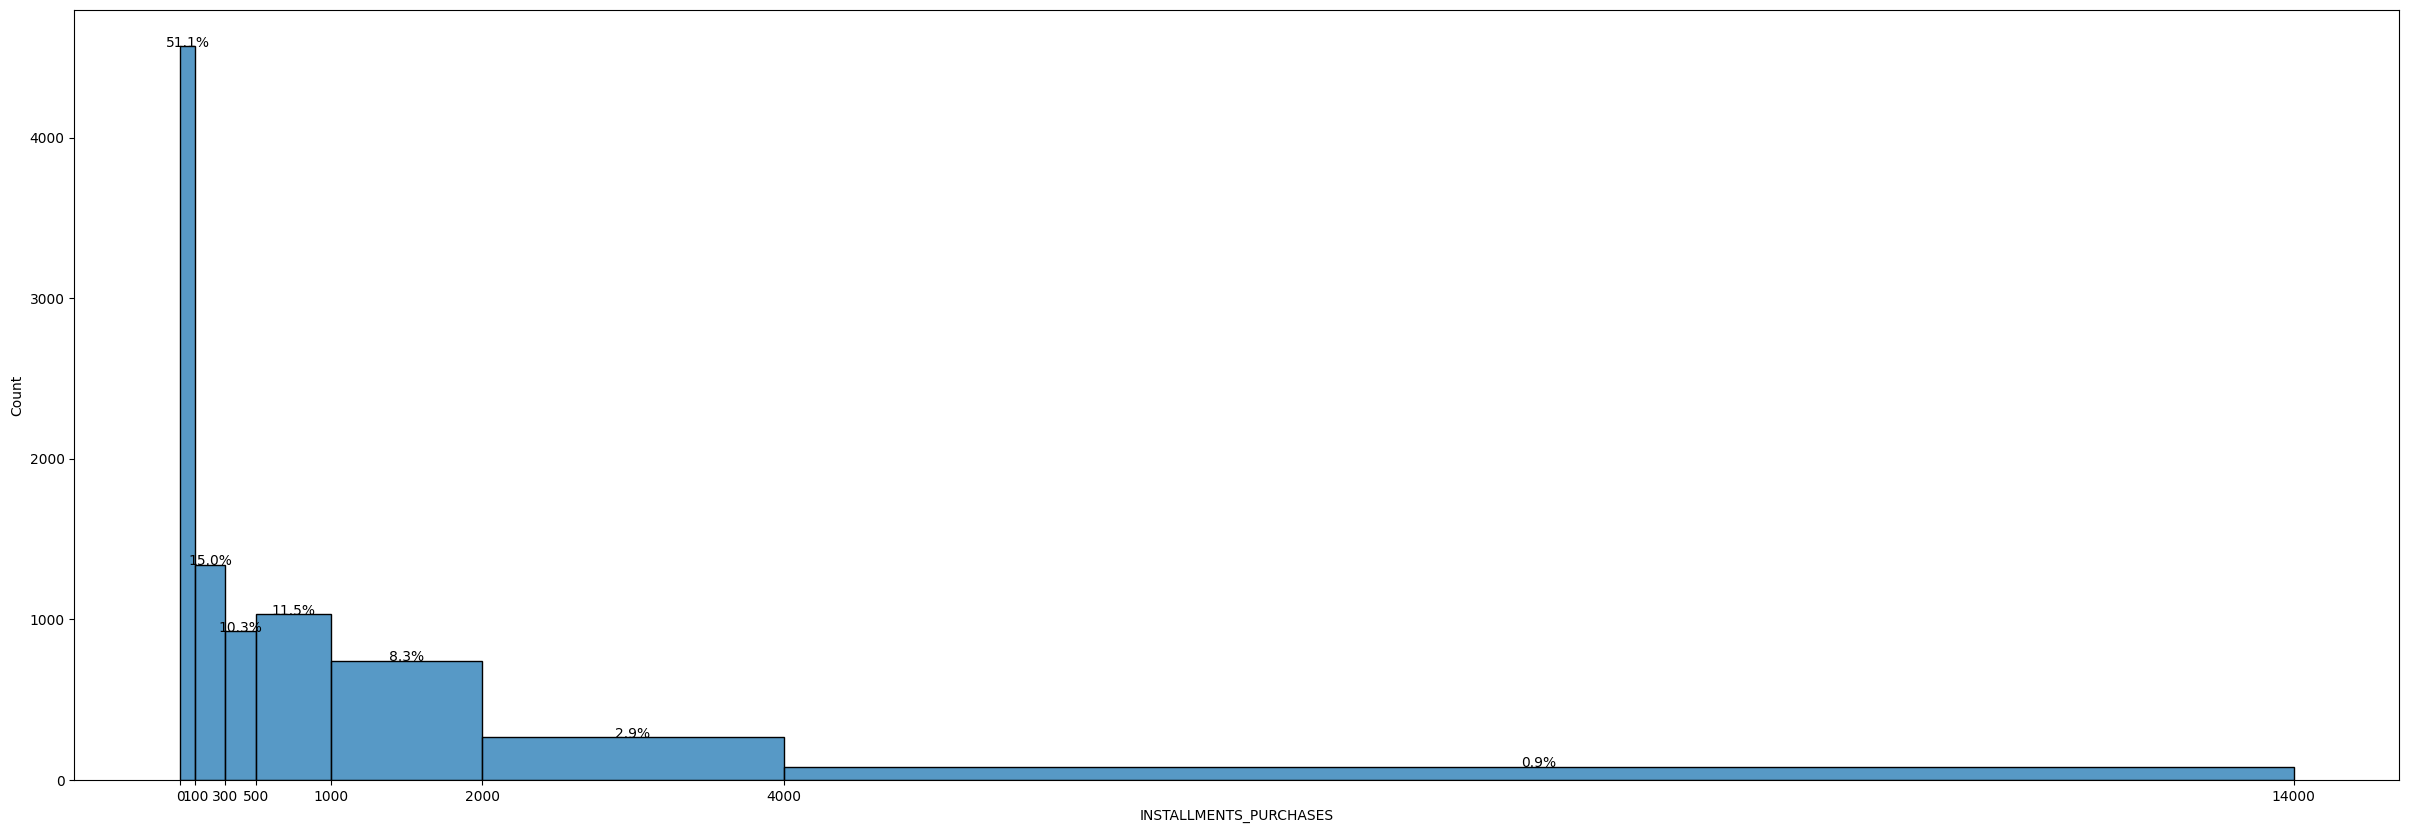

In [16]:
# Histogram plot of INSTALLMENTS_PURCHASES column

col = ['INSTALLMENTS_PURCHASES']
bins = [0, 100, 300, 500, 1000, 2000, 4000, 14000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(30, 10))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()


From the figure above:
- Over half (51.1%) of customers primarily utilize their credit cards for smaller installment purchases, typically ranging from 0 to 100 dollars. This suggests a prevalent pattern of using credit for smaller, more frequent purchases rather than larger, one-time payments. 

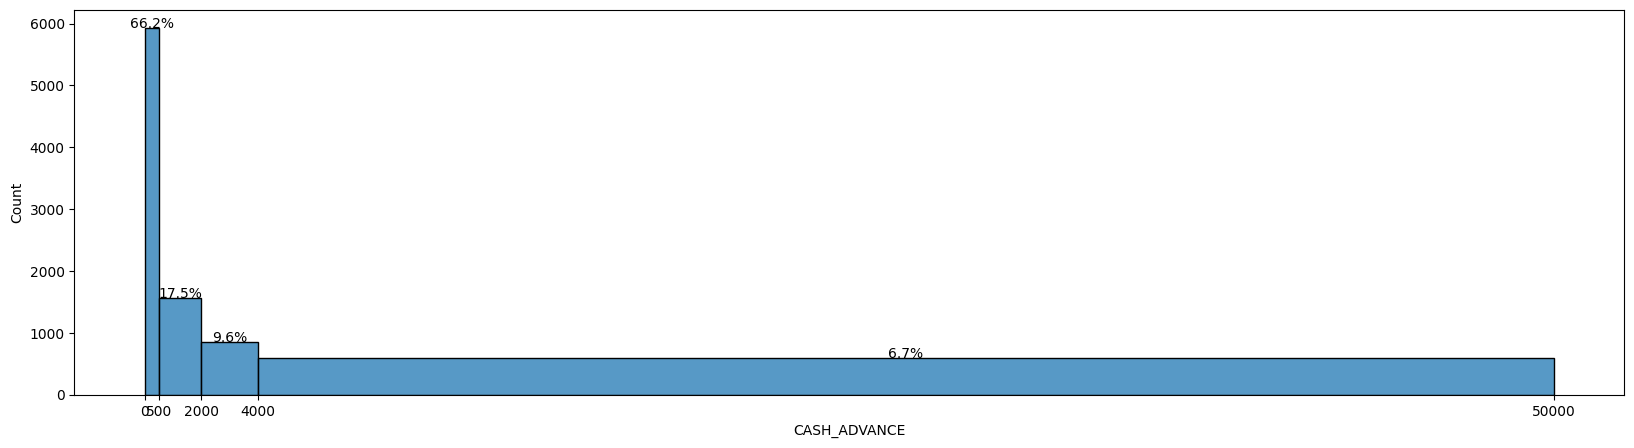

In [17]:
# Histogram plot of CASH_ADVANCE column

col = ['CASH_ADVANCE']
bins = [0, 500, 2000, 4000,50000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()


From the figure above:
- The majority of users seem to give smaller cash advances, as evidenced by 66.2% falling within the range from 0 to 500. This suggests that smaller cash advances are more common among users.
- A smaller proportion of users, approximately 17.5%, give larger cash advances falling within the range from 500 to 2000. This indicates that while larger cash advances are less common, they still occur among a notable portion of users.

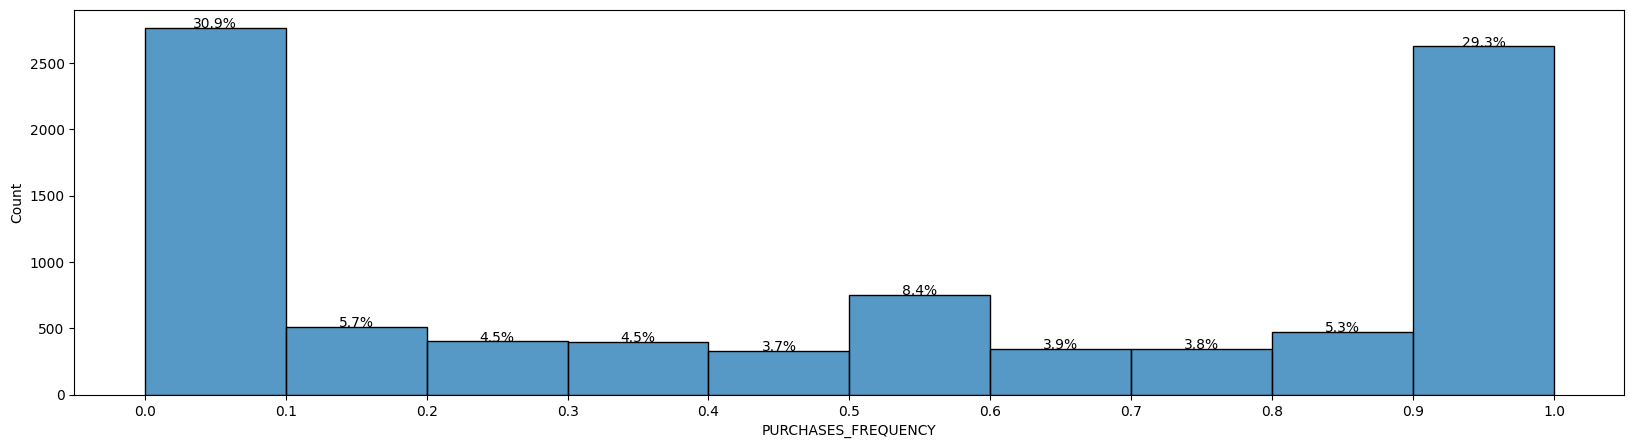

In [18]:
# Histogram plot of 'PURCHASES_FREQUENCY' column
col = ['PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()


From the figure above:
-  30.9% of customers make purchases infrequently, suggesting that a considerable portion of credit card users use their cards less often. This could be due to cautious spending habits, financial limitations, or a preference for other payment methods.

-  29.3% of customers make purchases very frequently, indicating a highly engaged segment of credit card users who utilize their cards extensively. This group might favor the convenience of credit cards for daily transactions or actively pursue rewards and benefits linked to credit card usage.

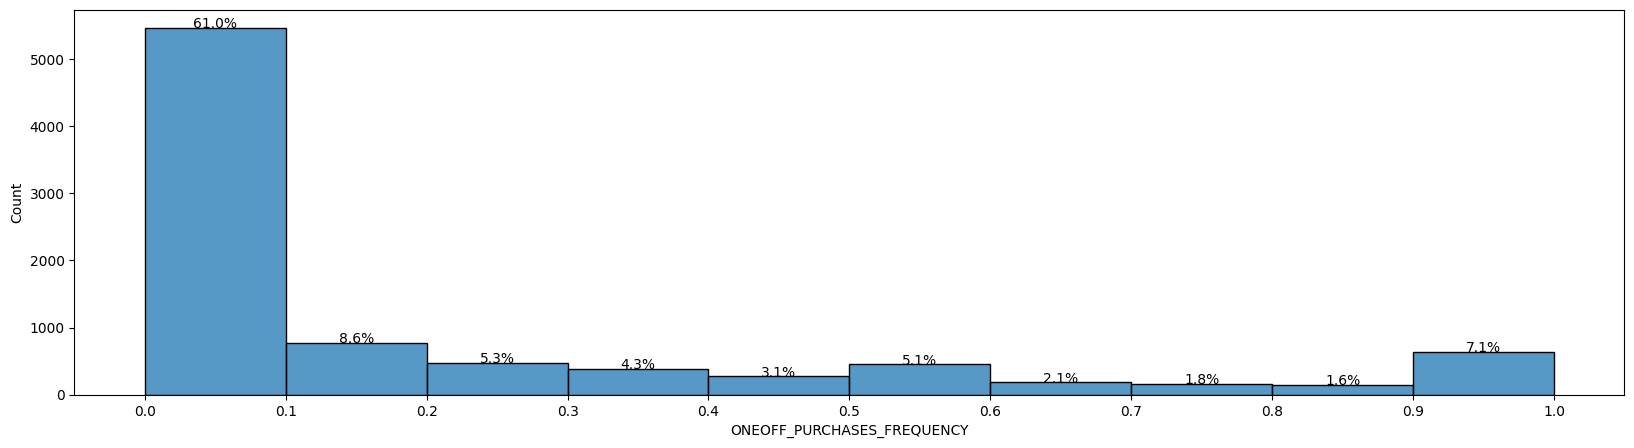

In [19]:
# Histogram plot of 'ONEOFF_PURCHASES_FREQUENCY' column
col = ['ONEOFF_PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()


From the figure above:
- 61% of credit card users rarely or never make purchases in one-go, this implies that the majority of customers prefer to make smaller, more frequent purchases rather than larger, one-time transactions. This spending pattern likely reflects cautious financial behavior, where users opt to distribute their expenses gradually over time.







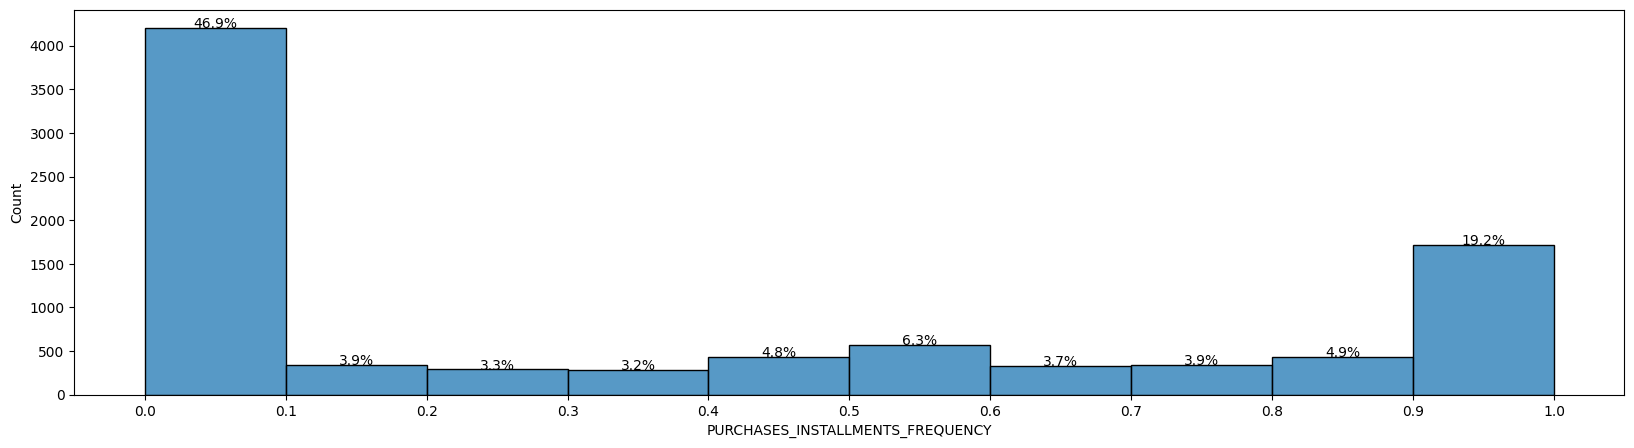

In [20]:
# Histogram plot of 'PURCHASES_INSTALLMENTS_FREQUENCY' column
col = ['PURCHASES_INSTALLMENTS_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()


From the figure above:
- The significant percentage of users (more than 46.9%) falling within the lower range (0 to 0.3) suggests that a substantial portion of credit card users do not frequently make purchases in installments. This could indicate a preference for paying for purchases upfront or avoiding installment plans.

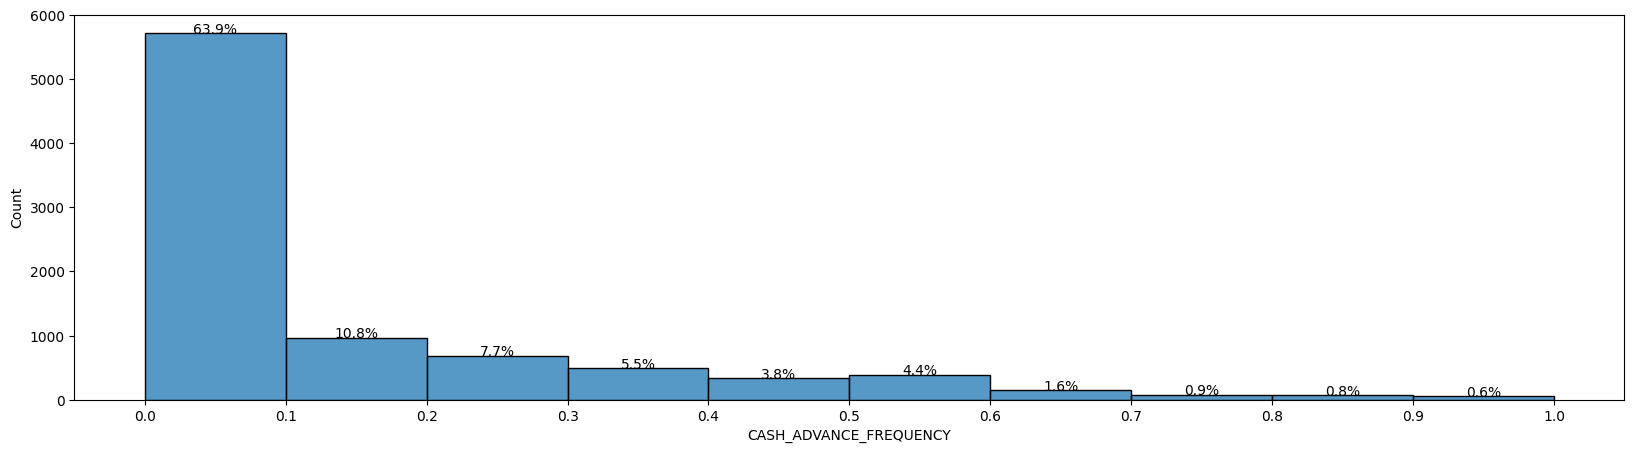

In [21]:
# Histogram plot of 'CASH_ADVANCE_FREQUENCY' column
col = ['CASH_ADVANCE_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the figure above:
- The high percentage of users falling within the lower range suggests that a significant portion of credit card users rarely or never give cash advances. This may indicate a trend of low utilization of cash advance services among customers.

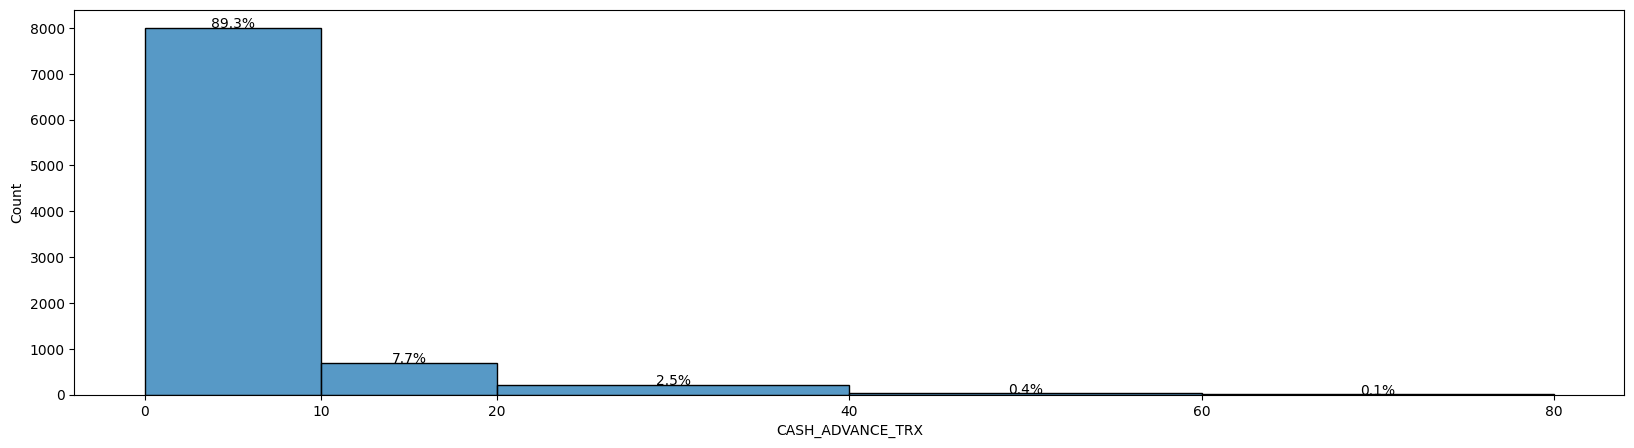

In [22]:
# Histogram plot of 'CASH_ADVANCE_TRX' column
col = ['CASH_ADVANCE_TRX']
bins = [0,10,20,40,60,80]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the figure above:
- The majority of credit card users have a low number of transactions involving cash advances, as evidenced by the high percentage falling within the range of 0 to 10. This indicates that cash advance transactions are infrequent among most users.

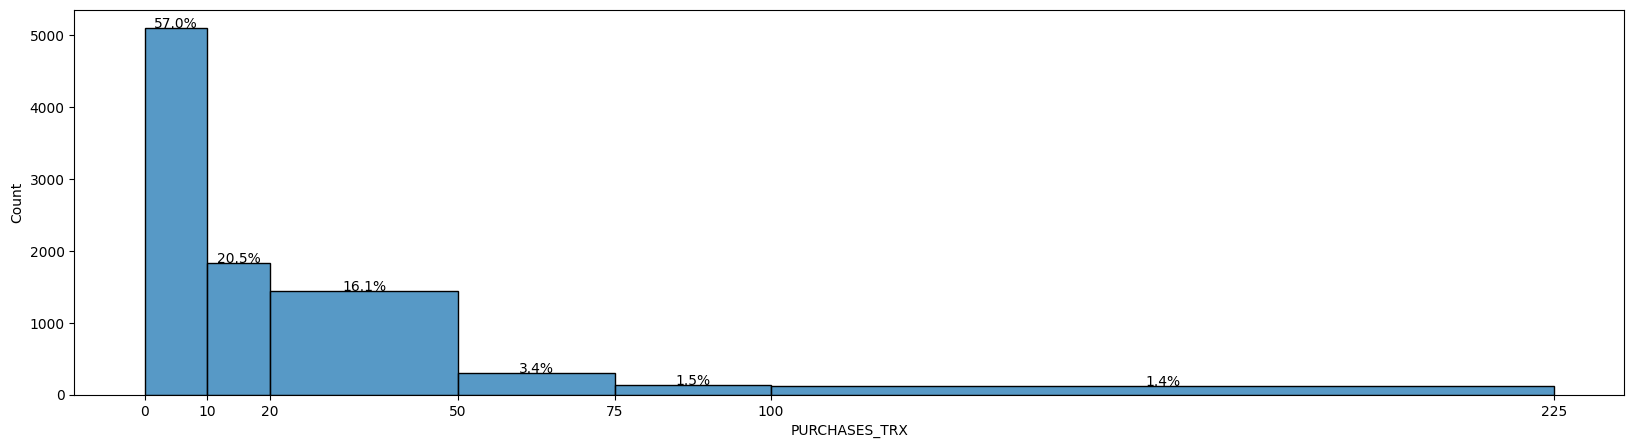

In [23]:
# Histogram plot of 'PURCHASES_TRX' column
col = ['PURCHASES_TRX']
bins = [0,10,20,50,75,100,225]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the figure above:
- More than half (57%) of credit card users make fewer than 10 purchase transactions. This indicates that many users prefer conservative spending habits or tend to use alternative payment methods for everyday expenses.

- Around one-fifth (20.6%) of users make between 10 to 20 purchase transactions. These users engage in moderate purchase activity, using their credit cards more frequently for a variety of expenses, including both essential and discretionary purchases.

- A small percentage (2.9%) of users make over 75 purchase transactions. This group consists of high-volume spenders who extensively use their credit cards for various purchases. They are likely to contribute significantly to transaction volume and revenue for credit card issuers through fees and interest charges.

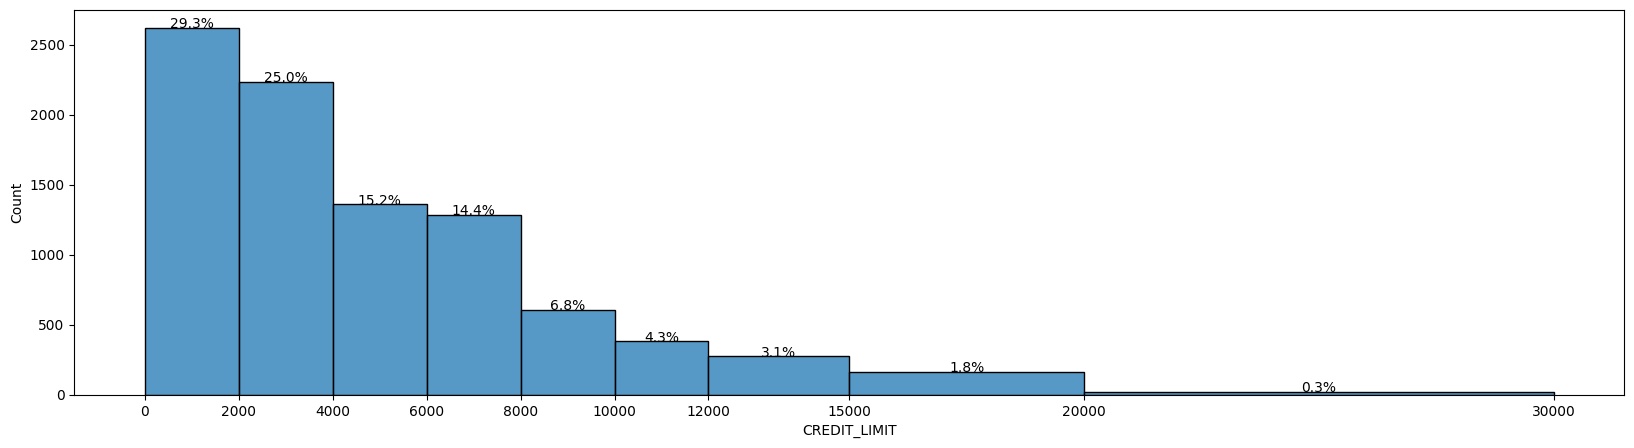

In [24]:
# Histogram plot of 'CREDIT_LIMIT' column
col = ['CREDIT_LIMIT']
bins = [0,2000,4000, 6000,8000, 10000,12000,15000,20000,30000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the figure above:
- The majority of credit card users (54.3%) have credit limits ranging from 0 to 4000. This indicates that a significant portion of users have relatively conservative credit limits.

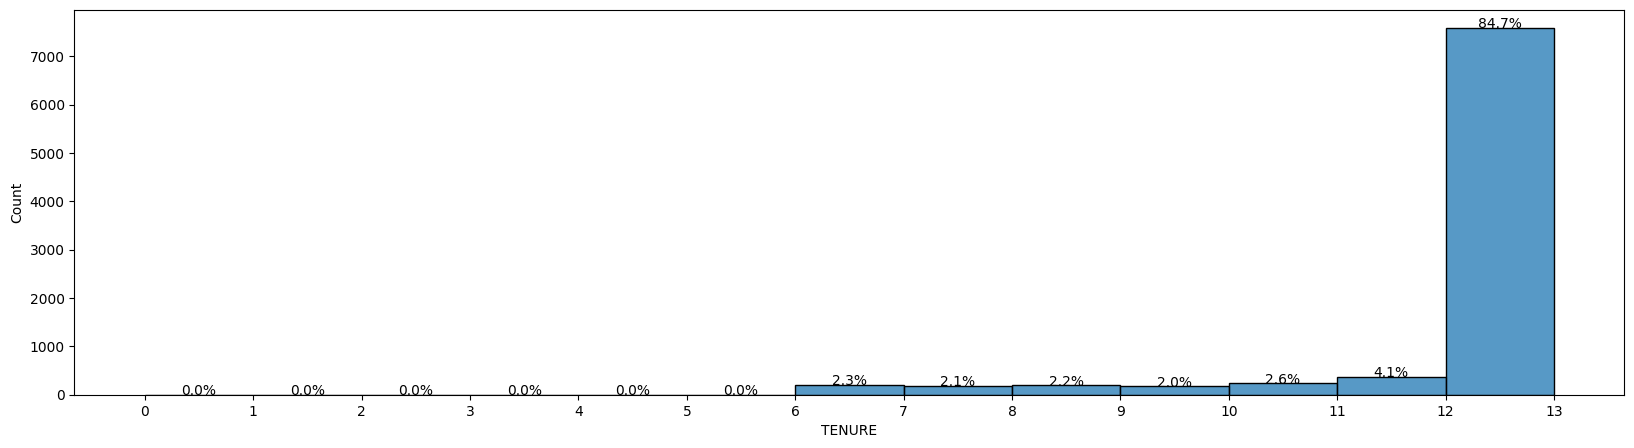

In [25]:
# Histogram plot of 'TENURE' column
col = ['TENURE']
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=df, x=col[i], bins=bins, stat=stat[i])

    total_count = len(df)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the figure above:
- The high percentage of users with a tenure of 12 to 13 months indicates a strong level of customer retention within this time frame. This suggests that many customers continue to use the same credit card for an extended period, possibly due to satisfaction with the card's features, benefits, or services.

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- 'CUST_ID' Should be set as an index for the df        <br>
2- illogical values for column 'CASH_ADVANCE_FREQUENCY'       <br>
3-  null values   <br>
4- outliers/ skewness          <br>

In [26]:
#make a copy for the original dataset
df_copy=df.copy()
df_copy.shape

(8950, 18)

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

- Our first issue is 'CUST_ID' Should be set as an index for the df 

In [27]:
# solution
# first we check if 'CUST_ID' has duplicates
has_duplicates = df_copy['CUST_ID'].duplicated().any()

if has_duplicates:
    print("The column contains duplicate values.")
else:
    print("The column does not contain duplicate values.")

The column does not contain duplicate values.


In [28]:
df_copy.set_index('CUST_ID', inplace=True)

In [29]:
# Test
df_copy

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   
...              ...                ...        ...               ...   
C19186     28.493517           1.000000     291.12              0.00   
C19187     19.183215           1.000000     300.00              0.00   
C19188     23.398673           0.833333     144.40              0.00   
C19189     13.457564           0.833333       0.00              0.00   
C19190    372.708075           0.666667    1093.25           1093.25   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                    95.40      0.000000             0.166667   
C10002                     0.00   6442.945483             0.000000   
C10003                     0.00      0.000000             1.000000   
C10004                     0.00    205.788017             0.083333   
C10005                     0.00      0.000000             0.083333   
...                         ...           ...                  ...   
C19186                   291.12      0.000000             1.000000   
C19187                   300.00      0.000000             1.000000   
C19188                   144.40      0.000000             0.833333   
C19189                     0.00     36.558778             0.000000   
C19190                     0.00    127.040008             0.666667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   
...                             ...                               ...   
C19186                     0.000000                          0.833333   
C19187                     0.000000                          0.833333   
C19188                     0.000000                          0.666667   
C19189                     0.000000                          0.000000   
C19190                     0.666667                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   
...                         ...               ...            ...   
C19186                 0.000000                 0              6   
C19187                 0.000000                 0              6   
C19188                 0.000000                 0              5   
C19189                 0.166667                 2              0   
C19190                 0.333333                 2             23   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003

In [30]:
df_copy.index.name = None
df_copy

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
C10001    40.900749           0.818182      95.40              0.00   
C10002  3202.467416           0.909091       0.00              0.00   
C10003  2495.148862           1.000000     773.17            773.17   
C10004  1666.670542           0.636364    1499.00           1499.00   
C10005   817.714335           1.000000      16.00             16.00   
...             ...                ...        ...               ...   
C19186    28.493517           1.000000     291.12              0.00   
C19187    19.183215           1.000000     300.00              0.00   
C19188    23.398673           0.833333     144.40              0.00   
C19189    13.457564           0.833333       0.00              0.00   
C19190   372.708075           0.666667    1093.25           1093.25   

        INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
C10001                   95.40      0.000000             0.166667   
C10002                    0.00   6442.945483             0.000000   
C10003                    0.00      0.000000             1.000000   
C10004                    0.00    205.788017             0.083333   
C10005                    0.00      0.000000             0.083333   
...                        ...           ...                  ...   
C19186                  291.12      0.000000             1.000000   
C19187                  300.00      0.000000             1.000000   
C19188                  144.40      0.000000             0.833333   
C19189                    0.00     36.558778             0.000000   
C19190                    0.00    127.040008             0.666667   

        ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
C10001                    0.000000                          0.083333   
C10002                    0.000000                          0.000000   
C10003                    1.000000                          0.000000   
C10004                    0.083333                          0.000000   
C10005                    0.083333                          0.000000   
...                            ...                               ...   
C19186                    0.000000                          0.833333   
C19187                    0.000000                          0.833333   
C19188                    0.000000                          0.666667   
C19189                    0.000000                          0.000000   
C19190                    0.666667                          0.000000   

        CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
C10001                0.000000                 0              2        1000.0   
C10002                0.250000                 4              0        7000.0   
C10003                0.000000                 0             12        7500.0   
C10004                0.083333                 1              1        7500.0   
C10005                0.000000                 0              1        1200.0   
...                        ...               ...            ...           ...   
C19186                0.000000                 0              6        1000.0   
C19187                0.000000                 0              6        1000.0   
C19188                0.000000                 0              5        1000.0   
C19189                0.166667                 2              0         500.0   
C19190                0.333333                 2             23        1200.0   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
C10001   201.802084        139.509787          0.000000      12  
C10002  4103.032597       1072.340217          0.222222      12  
C10003   622.066742        627.284787          0.000000      12  
C10004     0.000000               NaN          0.000000      12  
C10005   678.334763        244.791237          0.000000      12  
...             ...               ...               ...     ...  
C19186   325.594462         48

**Second issue**

- illogical values for column 'CASH_ADVANCE_FREQUENCY'

In [31]:
#solution 
# Filtering rows that have more than 1 in 'CASH_ADVANCE_FREQUENCY' column
print()
df_copy[df_copy['CASH_ADVANCE_FREQUENCY'] > 1]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
C10708  5656.069801           1.000000     362.36            362.36   
C11680  2876.009336           1.000000     152.61            152.61   
C12629  5906.184924           1.000000     141.80            141.80   
C12684  7801.511533           1.000000     231.40            231.40   
C13127  3846.742530           1.000000       0.00              0.00   
C13347  5709.486507           0.833333       0.00              0.00   
C18273  1917.895730           1.000000     285.07            285.07   
C18588  3857.562230           1.000000       0.00              0.00   

        INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
C10708                     0.0   7240.433194             0.250000   
C11680                     0.0   3719.650168             0.333333   
C12629                     0.0   1651.286918             0.125000   
C12684                     0.0   4109.465221             0.100000   
C13127                     0.0   1932.460679             0.000000   
C13347                     0.0   2794.326341             0.000000   
C18273                     0.0   6084.858872             0.363636   
C18588                     0.0   2127.213754             0.000000   

        ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
C10708                    0.250000                               0.0   
C11680                    0.333333                               0.0   
C12629                    0.125000                               0.0   
C12684                    0.100000                               0.0   
C13127                    0.000000                               0.0   
C13347                    0.000000                               0.0   
C18273                    0.363636                               0.0   
C18588                    0.000000                               0.0   

        CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
C10708                1.250000                12              2        8000.0   
C11680                1.166667                24              2        4000.0   
C12629                1.125000                12              2       10000.0   
C12684                1.100000                20              3       13500.0   
C13127                1.500000                18              0        5600.0   
C13347                1.166667                10              0        6000.0   
C18273                1.090909                28              6        3000.0   
C18588                1.142857                26              0        5000.0   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
C10708   683.421497       2036.877611               0.0       8  
C11680   248.342971        584.926336               0.0       6  
C12629   933.969974        919.289675               0.0       8  
C12684  1593.617739       1522.496755               0.0      10  
C13127   496.245836        538.346874               0.0       6  
C13347   550.513331       1299.463370               0.0       6  
C18273  5692.682993        556.449635               0.0      11  
C18588   617.508991        538.396872               0.0       7

In [32]:
print(len(df_copy[df_copy['CASH_ADVANCE_FREQUENCY'] > 1]))

8


In [33]:
df_copy.shape

(8950, 17)

In [34]:
df_copy.drop(df_copy[df_copy['CASH_ADVANCE_FREQUENCY'] > 1].index, inplace=True)
df_copy.shape

(8942, 17)

In [35]:
#test 
print(len(df_copy[df_copy['CASH_ADVANCE_FREQUENCY'] > 1]))

0


**Third issue**

- Null Values

In [36]:
df_copy.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [37]:
#solution 
df_copy.dropna(inplace=True)

In [38]:
#test 
df_copy.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [39]:
df_copy.shape

(8628, 17)

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [40]:
from sklearn import preprocessing

Before applying any preprocessing technique we need to visualize our data and we can do so using T-SNE

In [41]:
from sklearn.manifold import TSNE

def visualize_tsne(X, perplexity=30, n_iter=1000,  hue=None, title='t-SNE Visualization'):
   
    # Instantiate and fit t-SNE model
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, random_state=42, init='pca')
    X_2d = tsne.fit_transform(X)
    
    # Convert X_2d to DataFrame for seaborn
    df_2d = pd.DataFrame(X_2d, columns=['Dimension 1', 'Dimension 2'])
    
    # Plot the embedded data using Seaborn
    plt.figure(figsize=(8, 6))
    if hue is None:
        sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_2d, color='blue')
    else:
        sns.scatterplot(x='Dimension 1', y='Dimension 2', hue=hue, data=df_2d, palette='Set2')
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

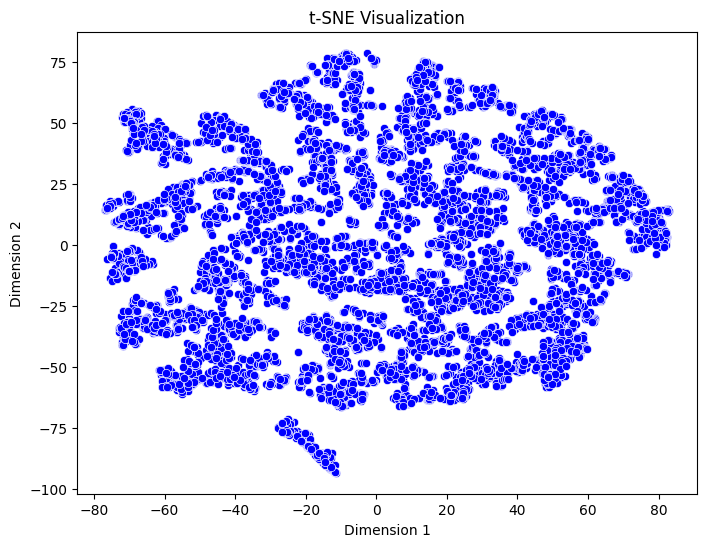

In [42]:
visualize_tsne(df_copy)

From the figure above, we can see that The data seems to form a single cohesive group, suggesting that it can be grouped into just one cluster.

***First Method*** 
- we'll try is **Robust Scaler** becuase this method is not sensitive to outliers

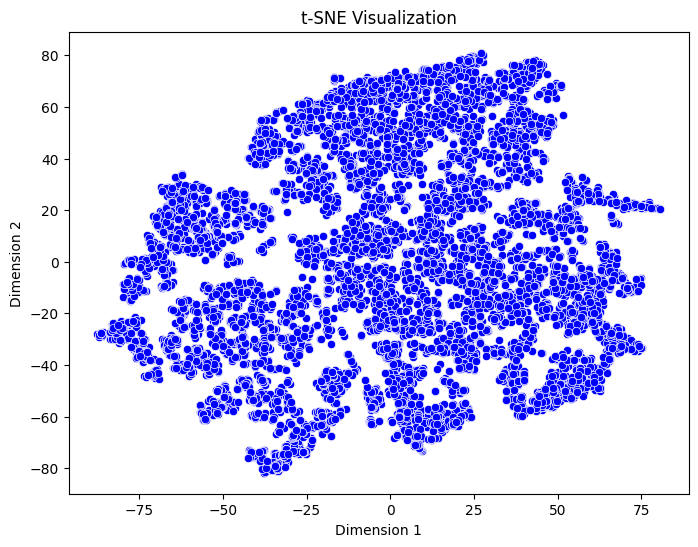

In [43]:
Robust_scaler = preprocessing.RobustScaler()
Robust_scaled_Data = Robust_scaler.fit_transform(df_copy)
visualize_tsne(Robust_scaled_Data)

From the figure above, we see that the strucutre of the data can still be clustered to one group only so, we'll try another preprocessing method

***Second Method*** 
- we'll try is **Quantile Transformer** because this method convert the distribution of data to normal distribution.

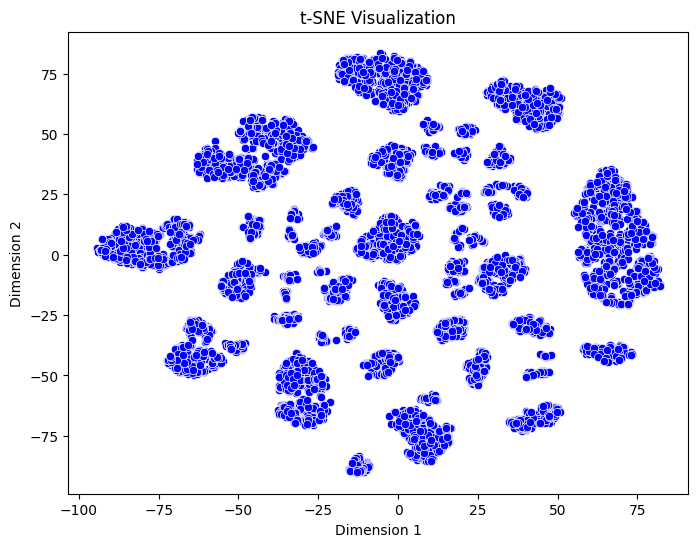

In [44]:
Quantile_Transformer = preprocessing.QuantileTransformer()
Quantile_Data = Quantile_Transformer.fit_transform(df_copy)
visualize_tsne(Quantile_Data)

From the figure above, we see that the quantile transformer changed the structure of the data and grouped it into too many clusters.

***Third Method*** 
- we'll try is **Log Trnsformer** because it is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution

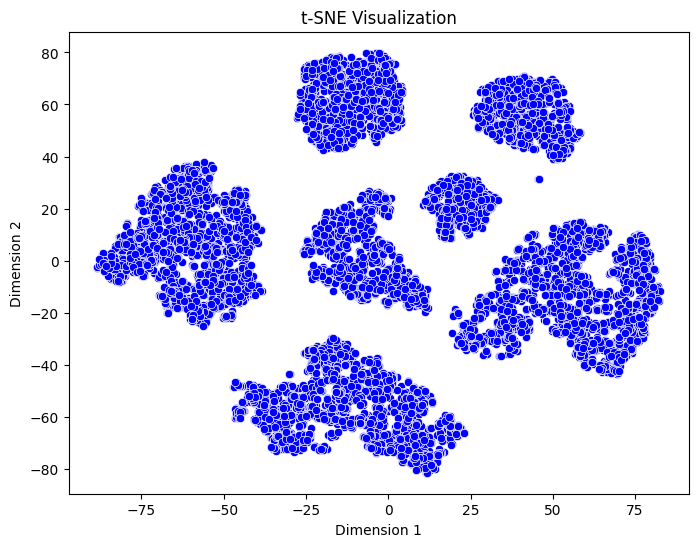

In [45]:
skewed_features = ['BALANCE', 'PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
                     'PAYMENTS', 'MINIMUM_PAYMENTS', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE' ]
normal_features = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
                      'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']
Log_Scaled_Data = np.log(df_copy[skewed_features]+0.1)
Log_Scaled_Data[normal_features] = df_copy[normal_features]

visualize_tsne(Log_Scaled_Data)

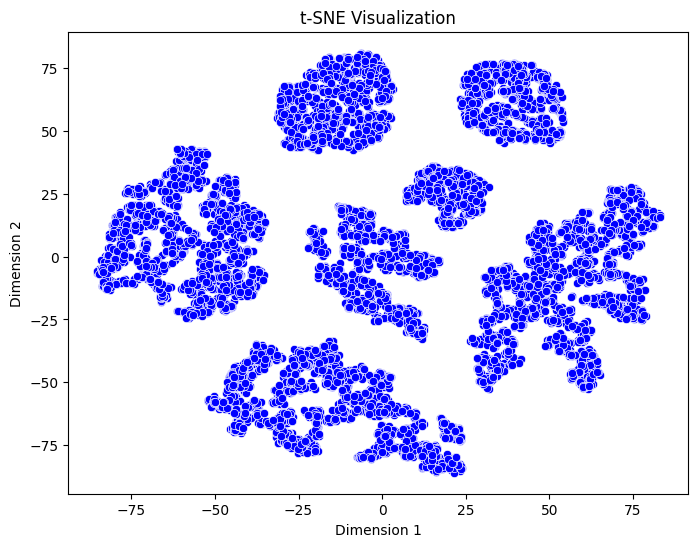

In [46]:
## Apply PCA on Log Transformed Data
from sklearn.decomposition import PCA
variance_ratio = 0.95  

pca = PCA(n_components=variance_ratio)

X_pca_log = pca.fit_transform(Log_Scaled_Data )

n_components_selected = pca.n_components_
visualize_tsne(X_pca_log)


## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

### Kmeans Without PCA

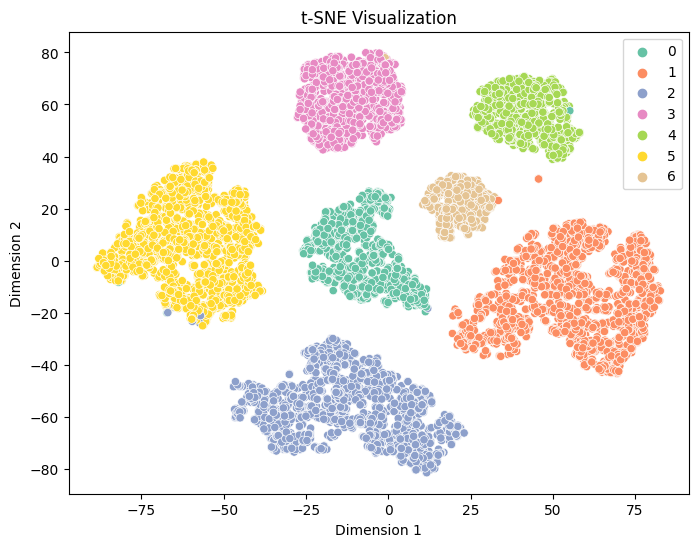

In [47]:
# From TSNE visualization of data i chose the number of clusters to be 5 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(Log_Scaled_Data)
visualize_tsne(Log_Scaled_Data,hue=kmeans_labels)


From the figure above, we can see that Kmeans groubed the data into 5 clusters but it has some errors

In [48]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(Log_Scaled_Data ,kmeans_labels)
print("Silhouette Score for Kmeans: ",silhouette_avg)

Silhouette Score for Kmeans:  0.5786393353179686


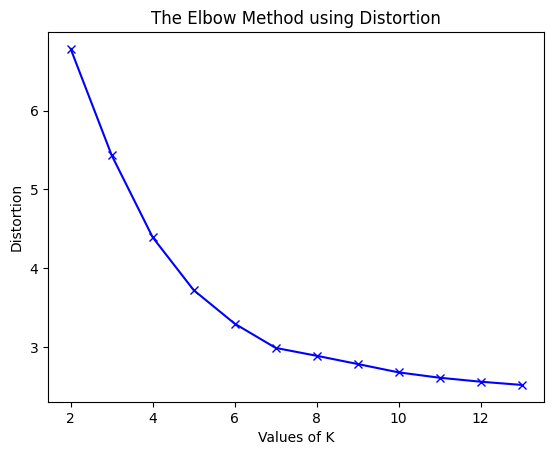

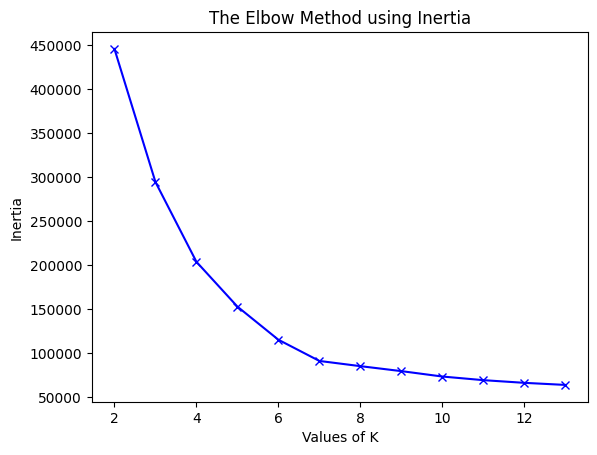

In [49]:
# Elbow method to find the best K using distortion and inertia
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 14)

for k in K:
# Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(Log_Scaled_Data)
    kmeanModel.fit(Log_Scaled_Data)

    distortions.append(sum(np.min(cdist(Log_Scaled_Data, kmeanModel.cluster_centers_,
    'euclidean'), axis=1)) / Log_Scaled_Data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(Log_Scaled_Data, kmeanModel.cluster_centers_,
    'euclidean'), axis=1)) / Log_Scaled_Data.shape[0]
    mapping2[k] = kmeanModel.inertia_
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()
plt.figure()
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

From the figures above, the minimum number of clusters that give us the most added value is K = 7


### Kmeans with PCA

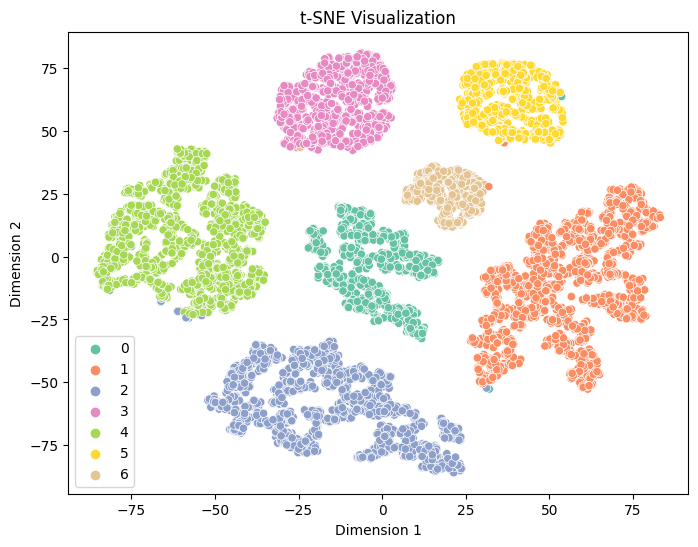

In [50]:
# using pca 
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca_log )
visualize_tsne(X_pca_log,hue=cluster_labels)

In [51]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_pca_log ,cluster_labels)
print("Silhouette Score for Kmeans: ",silhouette_avg)

Silhouette Score for Kmeans:  0.6355283752032624


We can see that using PCA on the data before passing it to Kmeans improves its performance

## 6. <a name="5">Hierarchical Clustering</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
- 1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
- 2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
- 3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [52]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy as shc

def plot_dendrogram_and_silhouette(linkage_method, distance_metric, data):

    # Dindogram
    plt.figure(figsize=(10, 5))
    plt.title(f'Hierarchical Clustering ({linkage_method.capitalize()}, {distance_metric.capitalize()})')
    dend = shc.dendrogram(shc.linkage(y=data, method=linkage_method, metric=distance_metric), orientation='top')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()

    # Calculate silhouette scores for different numbers of clusters
    silhouette_scores = []
    cluster_range = range(2, 10)  
    for n_clusters in cluster_range:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        labels = clustering.fit_predict(data)
        silhouette_score_value = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_score_value)

    # Sillhouette score plot
    plt.figure(figsize=(10, 5))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title(f'Silhouette Scores ({linkage_method.capitalize()} linkage, {distance_metric.capitalize()} distance)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(cluster_range)
    plt.grid(True)
    plt.show()

    # Determine the optimum number of clusters based on silhouette scores
    optimum_clusters = cluster_range[np.argmax(silhouette_scores)]
    print(f'Optimum number of clusters: {optimum_clusters}')
    return optimum_clusters



### Hierarchical Clustering Without PCA

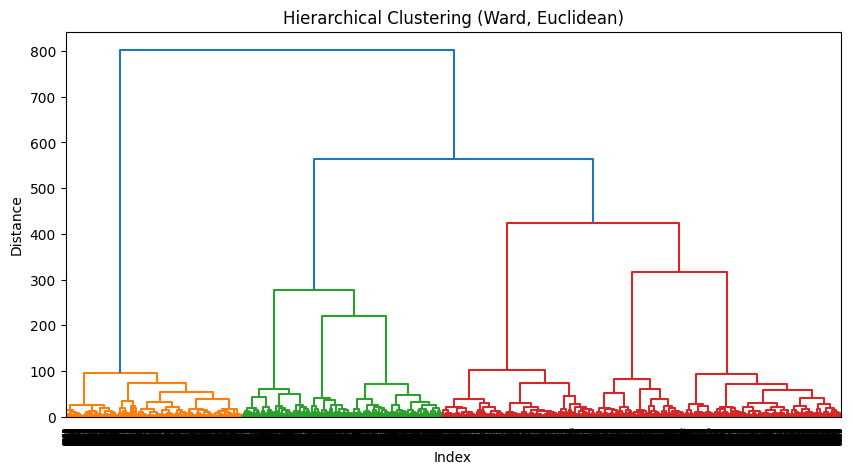

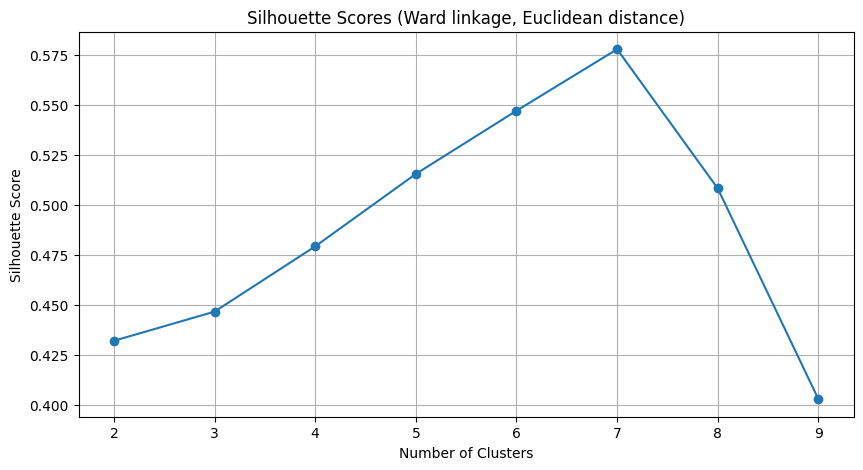

Optimum number of clusters: 7


In [53]:
optimum_clusters = plot_dendrogram_and_silhouette('ward', 'euclidean', Log_Scaled_Data)


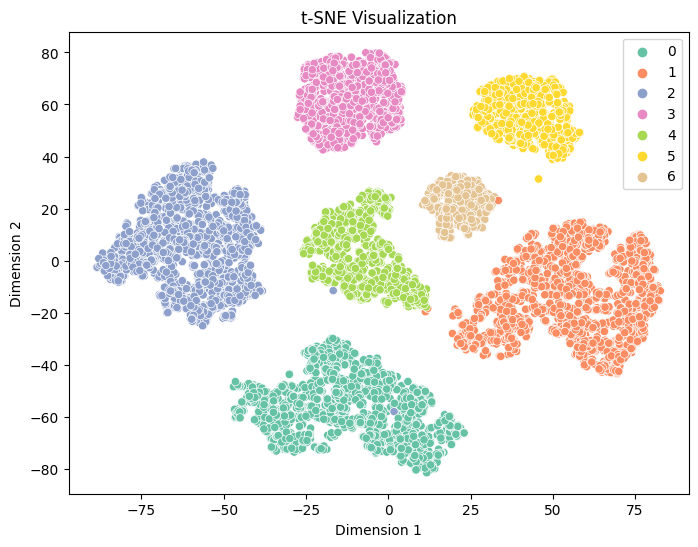

In [54]:
#training
from sklearn.cluster import AgglomerativeClustering

Hierarchy_clustering = AgglomerativeClustering(n_clusters= 7, linkage='ward', affinity='euclidean')

Hierarchy_clustering.fit(Log_Scaled_Data )

H_labels = Hierarchy_clustering.labels_

visualize_tsne(Log_Scaled_Data,hue=H_labels)



In [55]:
silhouette_avg = silhouette_score(Log_Scaled_Data ,H_labels)
print("Silhouette Score for Hierarchical: ",silhouette_avg)

Silhouette Score for Hierarchical:  0.5777253797597152


### Hierarchical Clustering with PCA

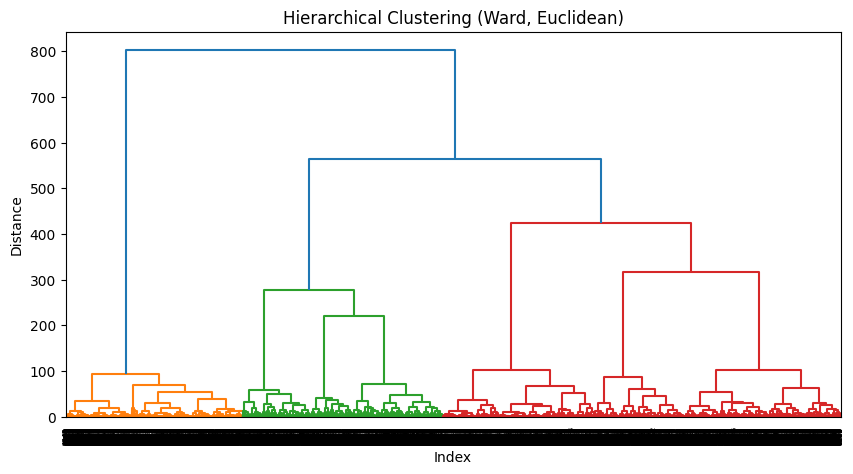

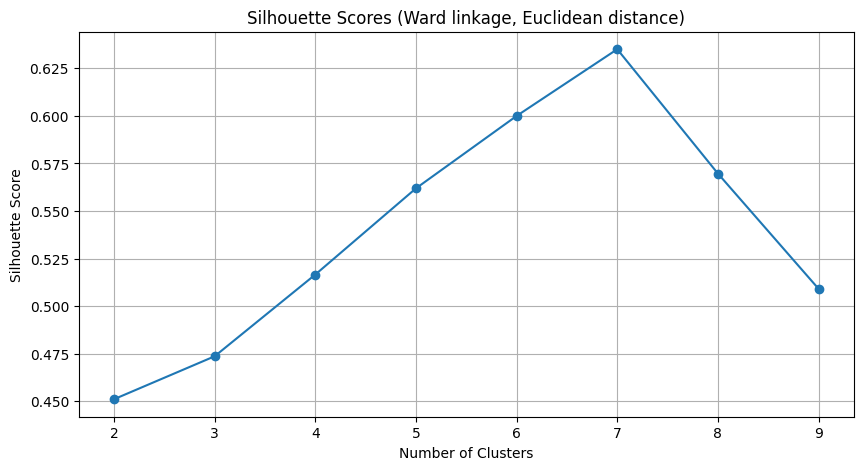

Optimum number of clusters: 7


In [56]:
optimum_clusters = plot_dendrogram_and_silhouette('ward', 'euclidean', X_pca_log )

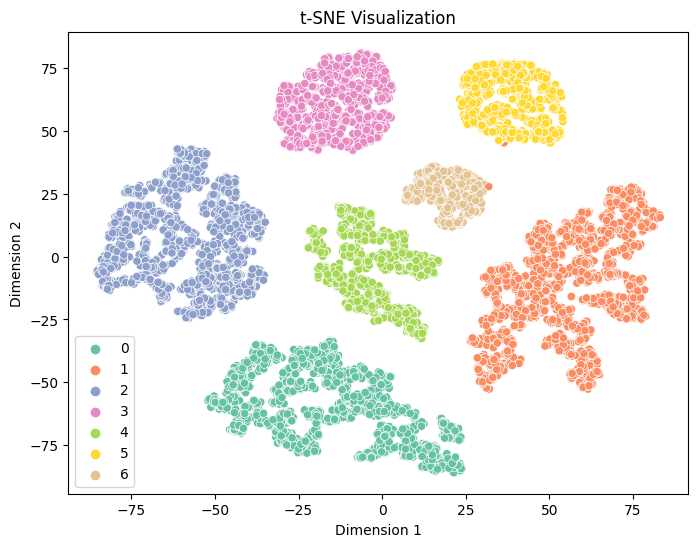

In [57]:
Hierarchy_clustering = AgglomerativeClustering(n_clusters= 7, linkage='ward', affinity='euclidean')

Hierarchy_clustering.fit(X_pca_log )

H_labels_pca = Hierarchy_clustering.labels_

visualize_tsne(X_pca_log,hue=H_labels_pca)

In [58]:
silhouette_avg = silhouette_score(X_pca_log ,H_labels_pca)
print("Silhouette Score for Hierarchical(PCA): ",silhouette_avg)

Silhouette Score for Hierarchical(PCA):  0.6350304252958907


## 7. <a name="5">DBSCAN</a>
(<a href="#0">Go to top</a>)


### DBSCAN without PCA

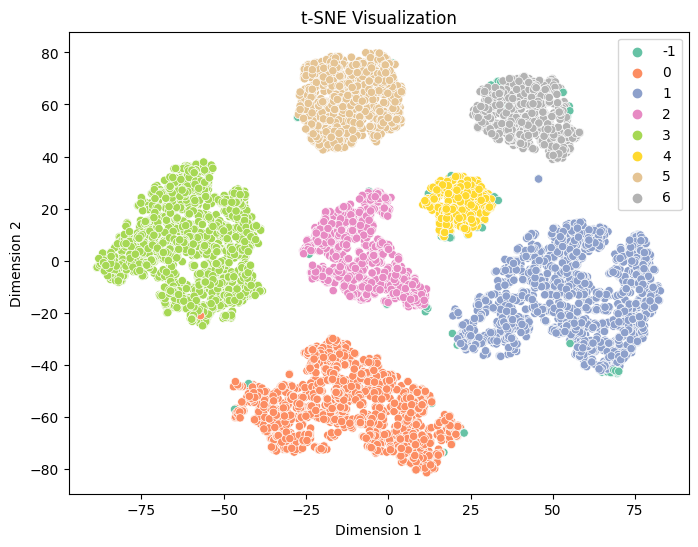

In [59]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.5, min_samples=115)

dbscan.fit(Log_Scaled_Data )
dbscan_labels = dbscan.labels_
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)
visualize_tsne(Log_Scaled_Data,hue=dbscan_labels)

In [60]:
silhouette_avg = silhouette_score(Log_Scaled_Data ,dbscan_labels)
print("Silhouette Score for DBSCAN: ",silhouette_avg)

Silhouette Score for DBSCAN:  0.5752390567492986


### DBSCAN with PCA

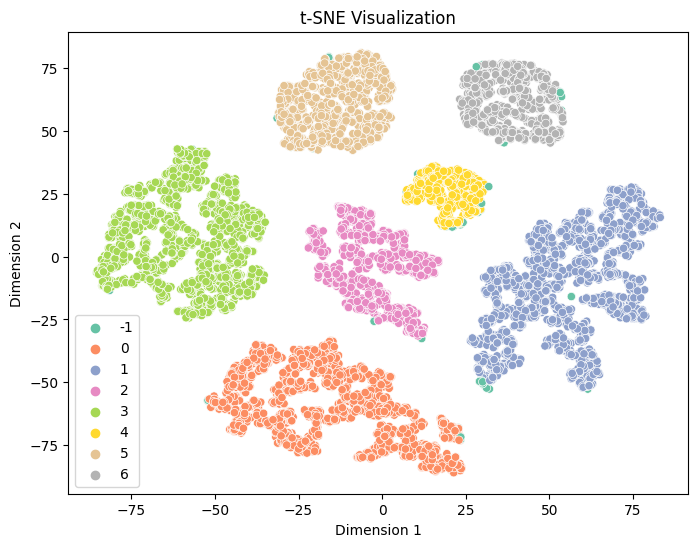

In [61]:
dbscan_pca = DBSCAN(eps=2.7, min_samples=115)

dbscan_pca.fit(X_pca_log )
dbscan_labels_pca = dbscan_pca.labels_
n_clusters_ = len(set(dbscan_labels_pca)) - (1 if -1 in dbscan_labels_pca else 0)
n_noise_ = list(dbscan_labels_pca).count(-1)
visualize_tsne(X_pca_log,hue=dbscan_labels_pca)

In [62]:
silhouette_avg = silhouette_score(X_pca_log ,dbscan_labels_pca)
print("Silhouette Score for DBSCAN(PCA): ",silhouette_avg)

Silhouette Score for DBSCAN(PCA):  0.632246185854359


## 8. <a name="8">Gaussian Mixture Model</a>
(<a href="#1">Go to top</a>)

### GMM without PCA 

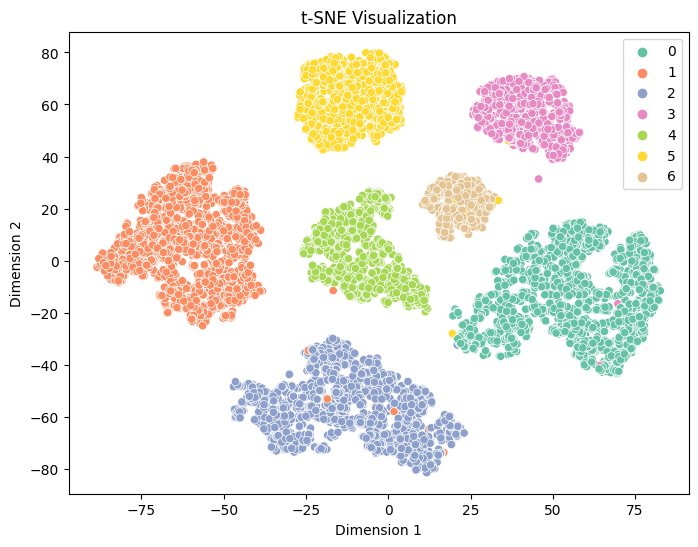

In [63]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7)
gmm.fit(Log_Scaled_Data)
gmm_labels = gmm.predict(Log_Scaled_Data)
visualize_tsne(Log_Scaled_Data,hue=gmm_labels)

In [64]:
silhouette_avg = silhouette_score(Log_Scaled_Data ,gmm_labels)
print("Silhouette Score for GMM: ",silhouette_avg)

Silhouette Score for GMM:  0.5718629202839536


### GMM with PCA

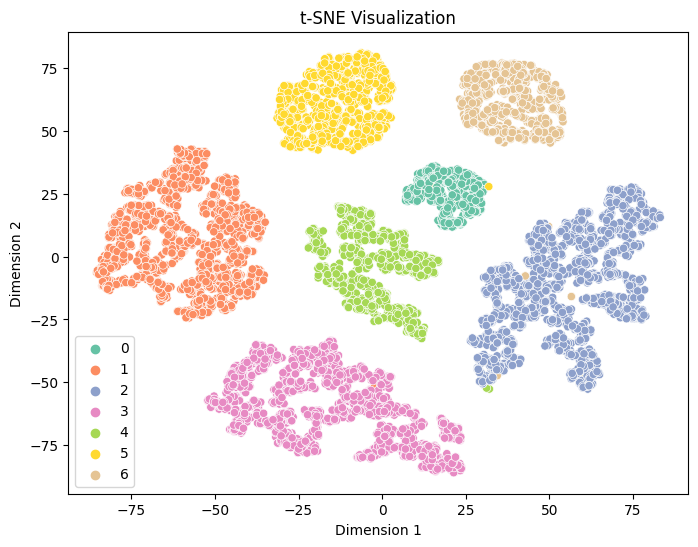

In [65]:
gmm_pca = GaussianMixture(n_components=7)
gmm_pca.fit(X_pca_log)
gmm_labels_pca = gmm_pca.predict(X_pca_log)
visualize_tsne(X_pca_log,hue=gmm_labels_pca)

In [66]:
silhouette_avg = silhouette_score(X_pca_log ,gmm_labels_pca)
print("Silhouette Score for GMM(PCA): ",silhouette_avg)

Silhouette Score for GMM(PCA):  0.632693618281855


### After Trying Multiple Algorithms (Kmeans, Hierarchical Clustering, DBSCAN, GMM ) both with PCA and without 

### Since both K-means and Hierarchical clustering performed best with PCA-reduced data using silhouette score, we'll proceed with Hierarchical Clustering.

In [67]:
## Merging the cluster labels with the data frame to visualize
df_copy['Cluster_Label'] = H_labels_pca
df_copy


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
C10001    40.900749           0.818182      95.40              0.00   
C10002  3202.467416           0.909091       0.00              0.00   
C10003  2495.148862           1.000000     773.17            773.17   
C10005   817.714335           1.000000      16.00             16.00   
C10006  1809.828751           1.000000    1333.28              0.00   
...             ...                ...        ...               ...   
C19184     5.871712           0.500000      20.90             20.90   
C19186    28.493517           1.000000     291.12              0.00   
C19188    23.398673           0.833333     144.40              0.00   
C19189    13.457564           0.833333       0.00              0.00   
C19190   372.708075           0.666667    1093.25           1093.25   

        INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
C10001                   95.40      0.000000             0.166667   
C10002                    0.00   6442.945483             0.000000   
C10003                    0.00      0.000000             1.000000   
C10005                    0.00      0.000000             0.083333   
C10006                 1333.28      0.000000             0.666667   
...                        ...           ...                  ...   
C19184                    0.00      0.000000             0.166667   
C19186                  291.12      0.000000             1.000000   
C19188                  144.40      0.000000             0.833333   
C19189                    0.00     36.558778             0.000000   
C19190                    0.00    127.040008             0.666667   

        ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
C10001                    0.000000                          0.083333   
C10002                    0.000000                          0.000000   
C10003                    1.000000                          0.000000   
C10005                    0.083333                          0.000000   
C10006                    0.000000                          0.583333   
...                            ...                               ...   
C19184                    0.166667                          0.000000   
C19186                    0.000000                          0.833333   
C19188                    0.000000                          0.666667   
C19189                    0.000000                          0.000000   
C19190                    0.666667                          0.000000   

        CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
C10001                0.000000                 0              2        1000.0   
C10002                0.250000                 4              0        7000.0   
C10003                0.000000                 0             12        7500.0   
C10005                0.000000                 0              1        1200.0   
C10006                0.000000                 0              8        1800.0   
...                        ...               ...            ...           ...   
C19184                0.000000                 0              1         500.0   
C19186                0.000000                 0              6        1000.0   
C19188                0.000000                 0              5        1000.0   
C19189                0.166667                 2              0         500.0   
C19190                0.333333                 2             23        1200.0   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_Label  
C10001   201.802084        139.509787          0.000000      12              0  
C10002  4103.032597       1072.340217          0.222222      12              1  
C10003   622.066742        627.284787          0.000000      12              4  
C10005   678.334763        244.791237          0.000000      12              4  
C10006  1400.057770       2407.246035          0.000000      12              0  
...   

In [68]:
cluster_0 = df_copy[df_copy['Cluster_Label'] == 0]
cluster_1 = df_copy[df_copy['Cluster_Label'] == 1]
cluster_2 = df_copy[df_copy['Cluster_Label'] == 2]
cluster_3 = df_copy[df_copy['Cluster_Label'] == 3]
cluster_4 = df_copy[df_copy['Cluster_Label'] == 4]
cluster_5 = df_copy[df_copy['Cluster_Label'] == 5]
cluster_6 = df_copy[df_copy['Cluster_Label'] == 6]

## 9. <a name="8">Cluster Analysis (Business Insights)</a>
(<a href="#1">Go to top</a>)

#### Cluster 0

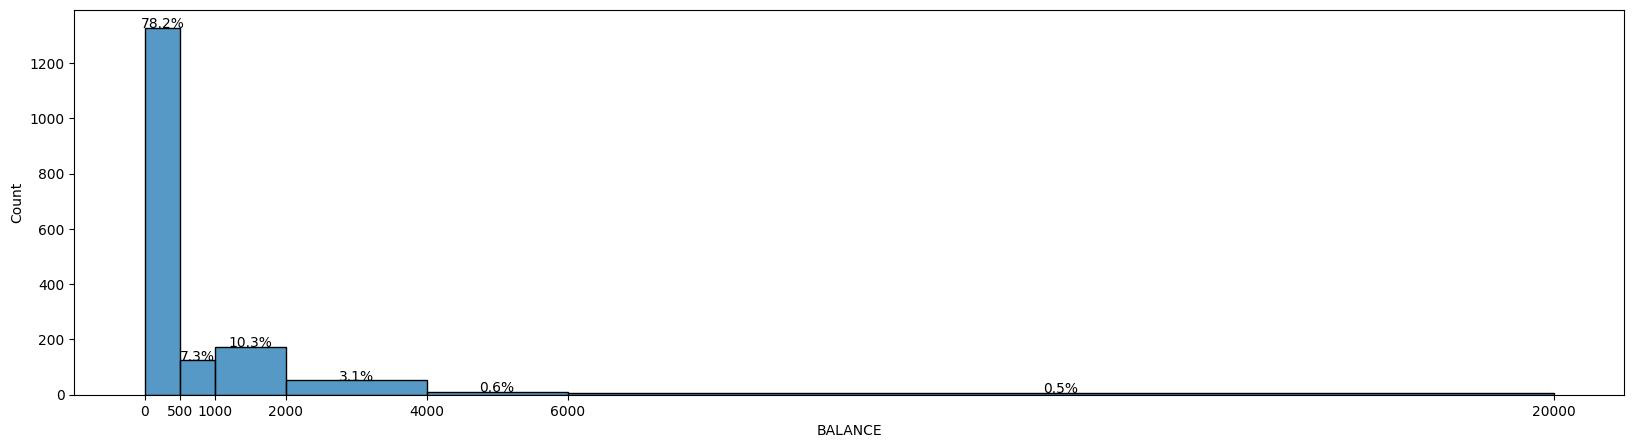

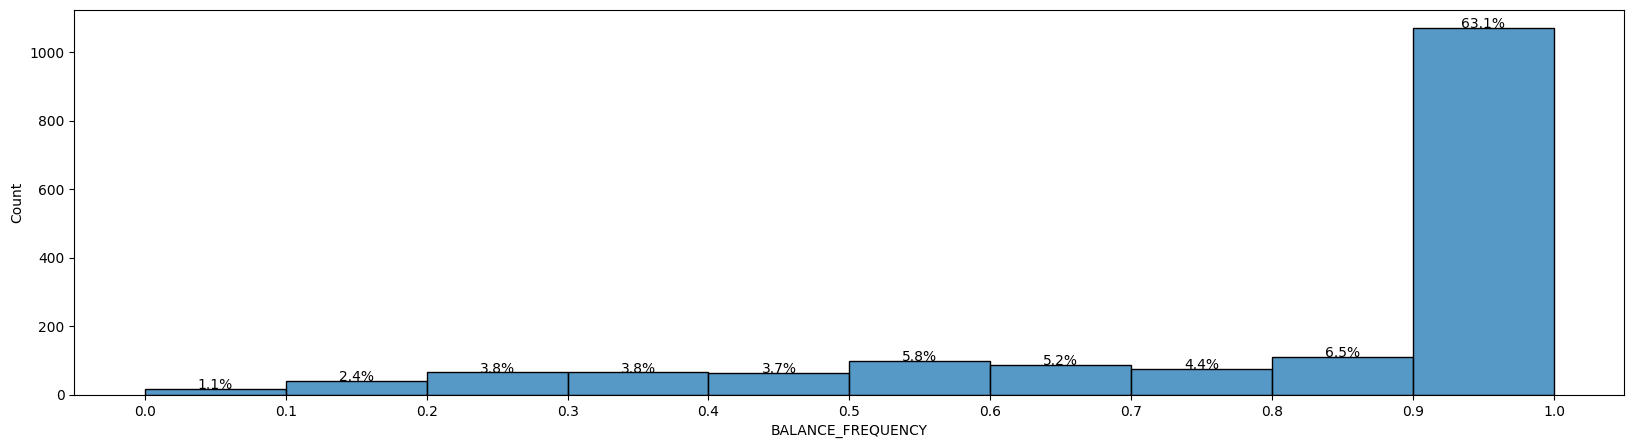

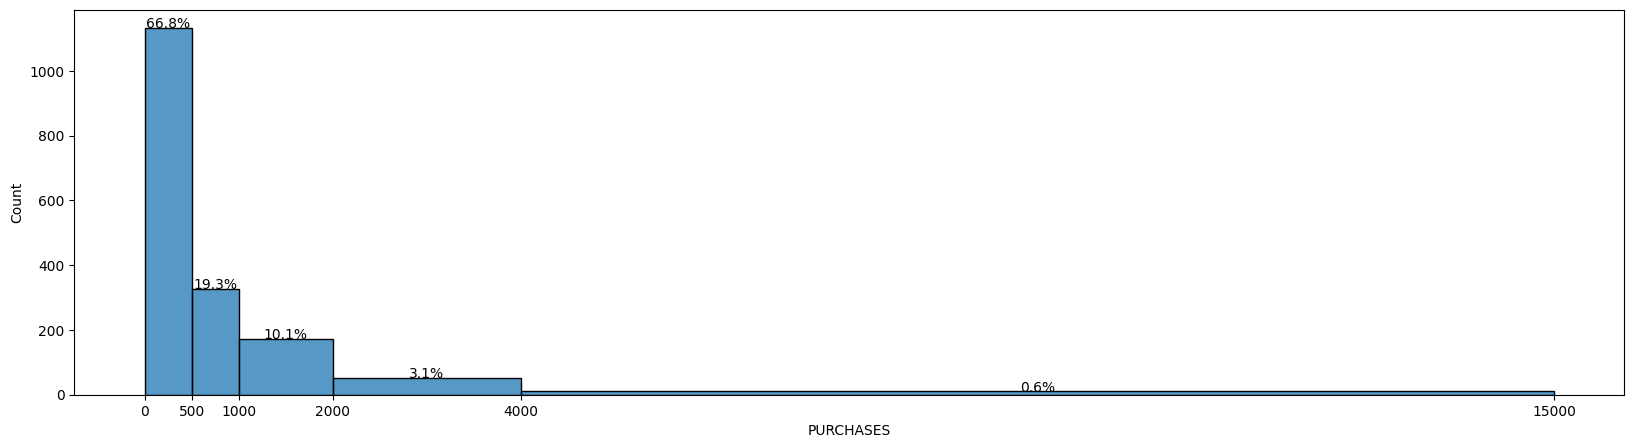

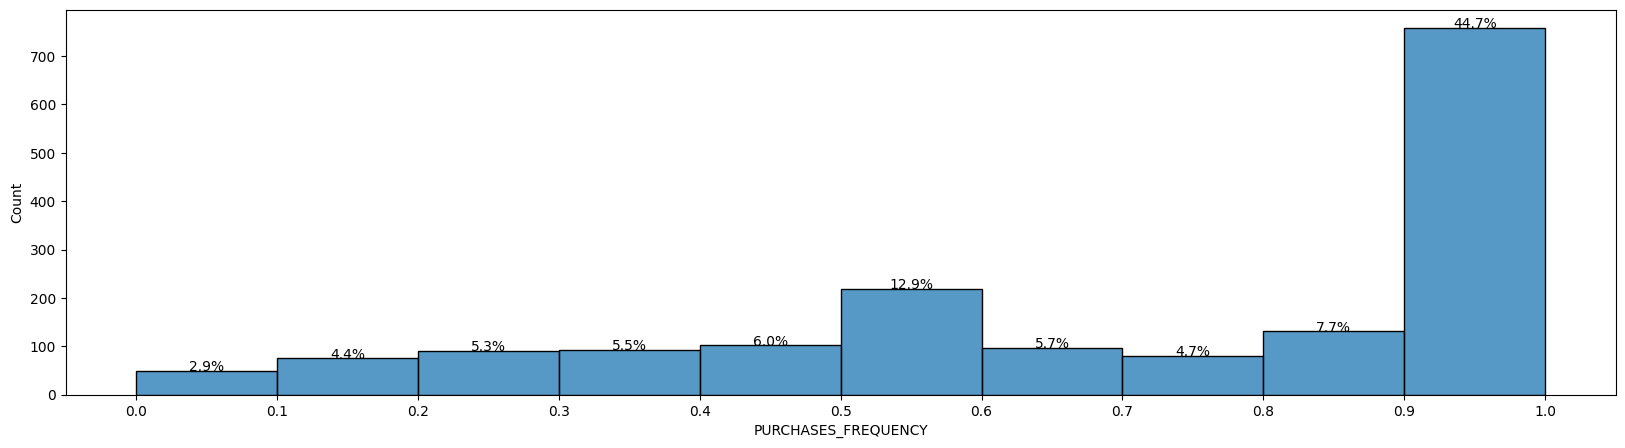

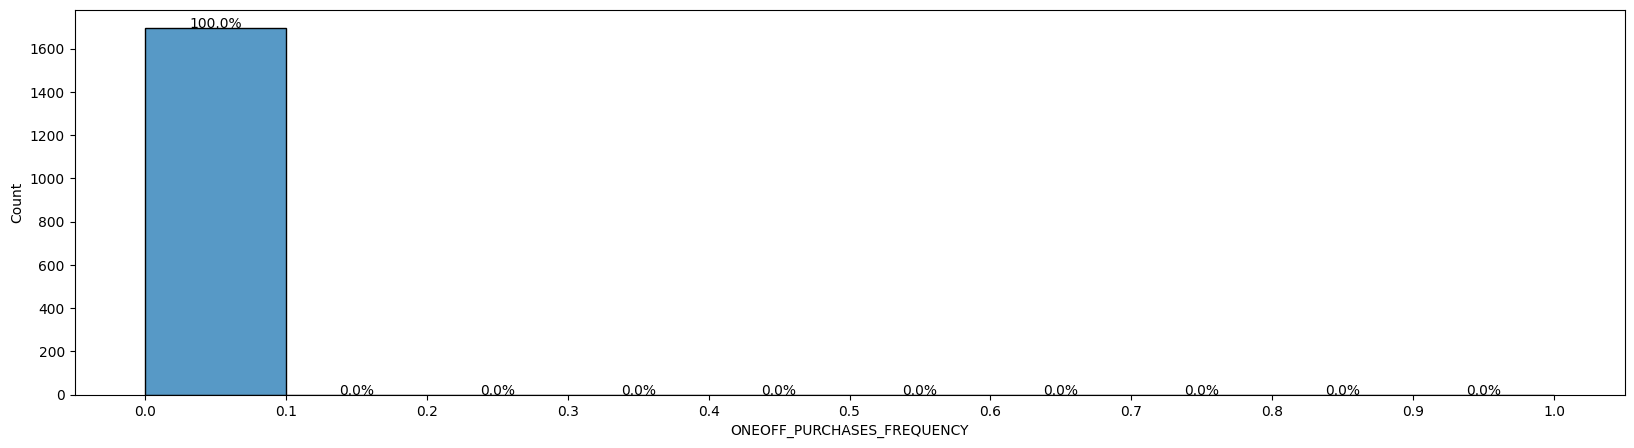

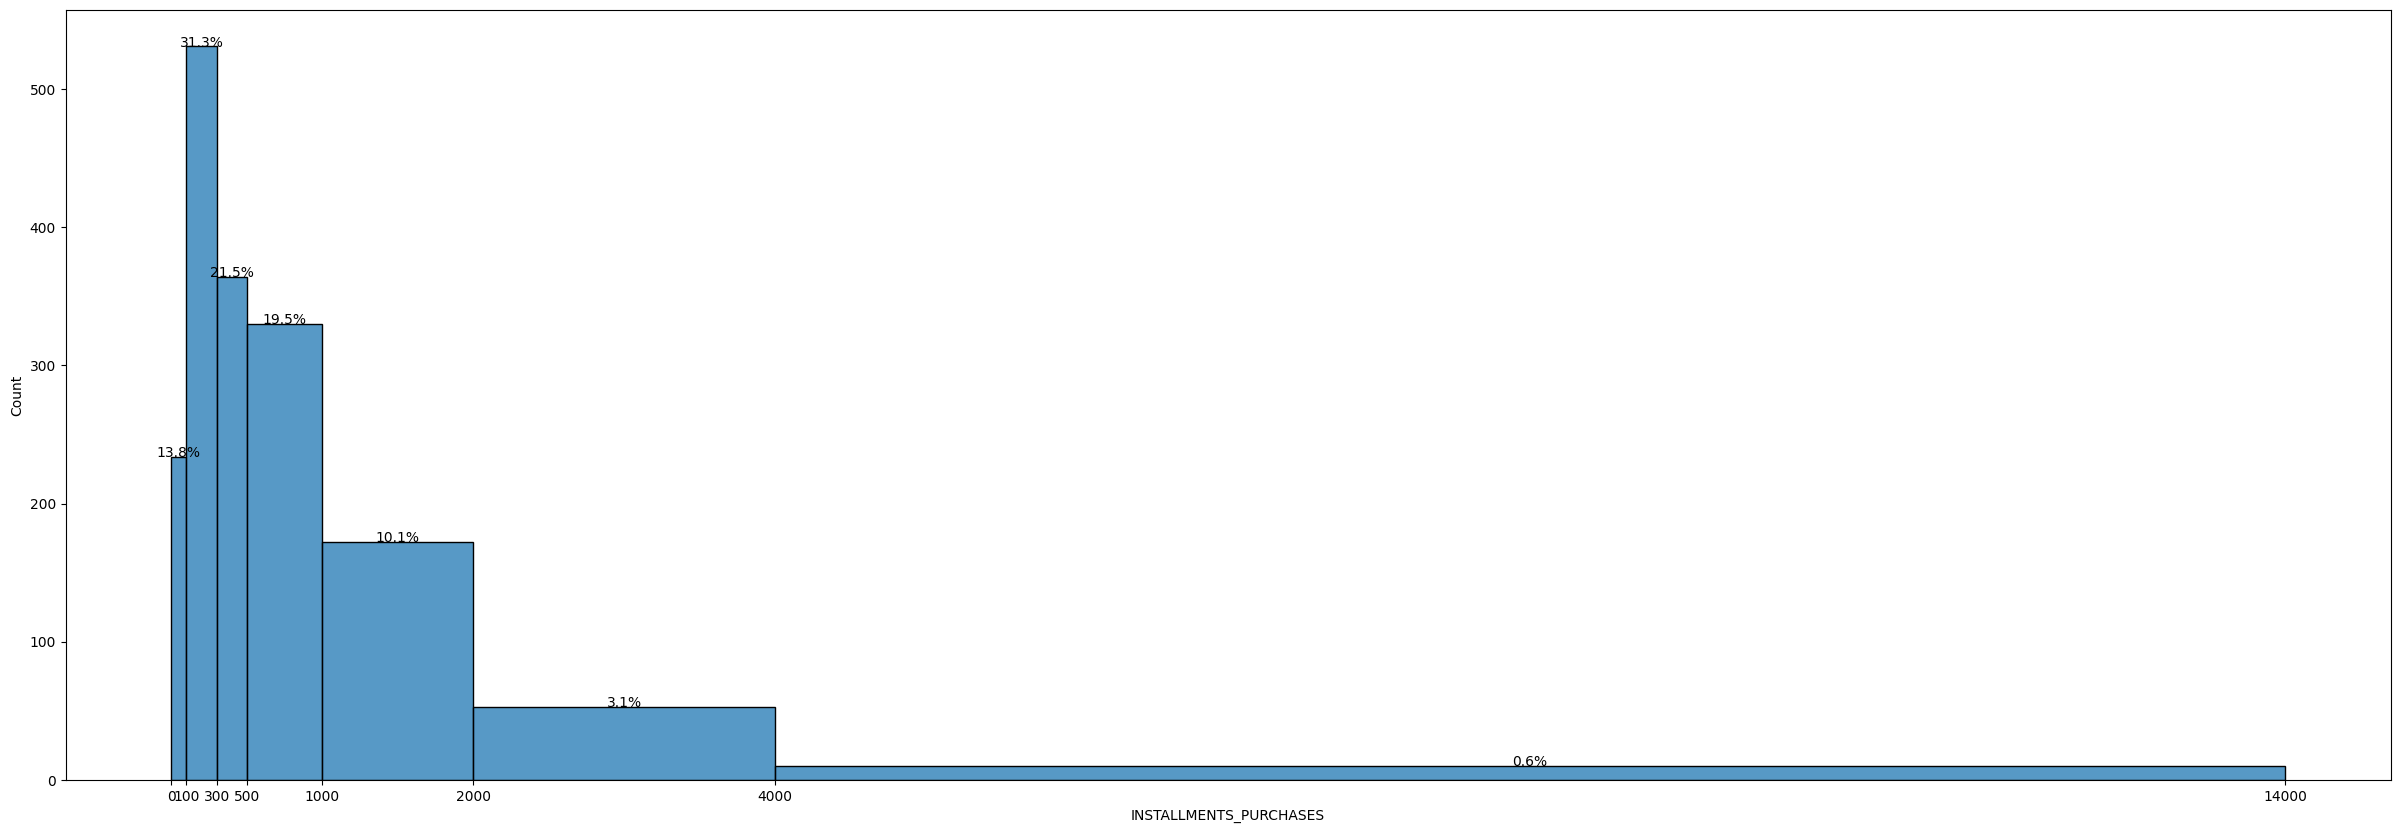

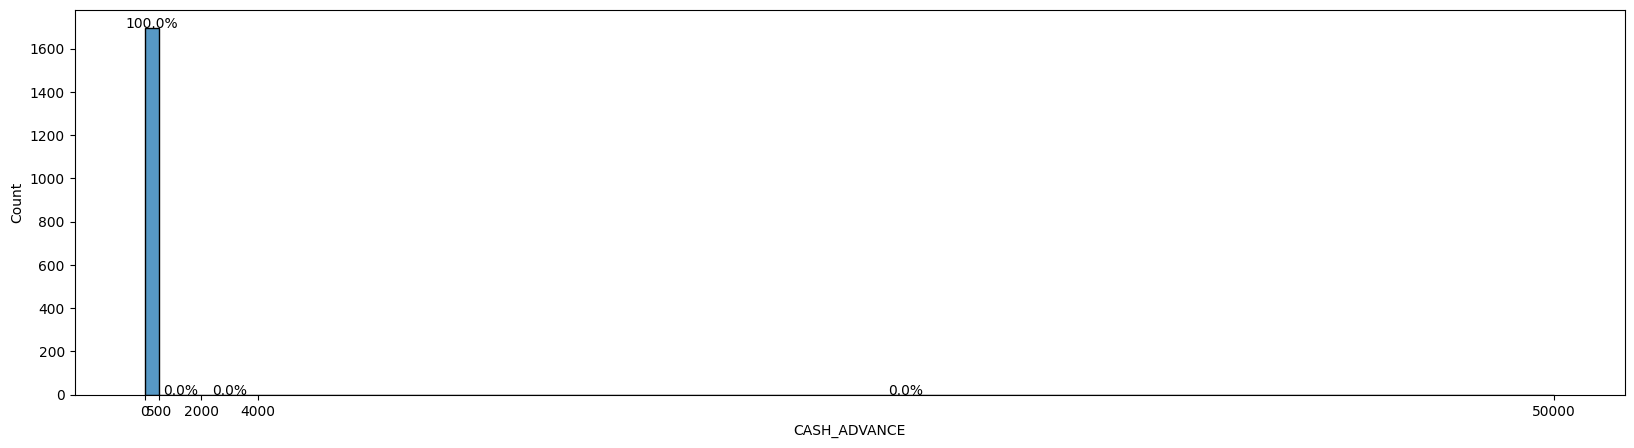

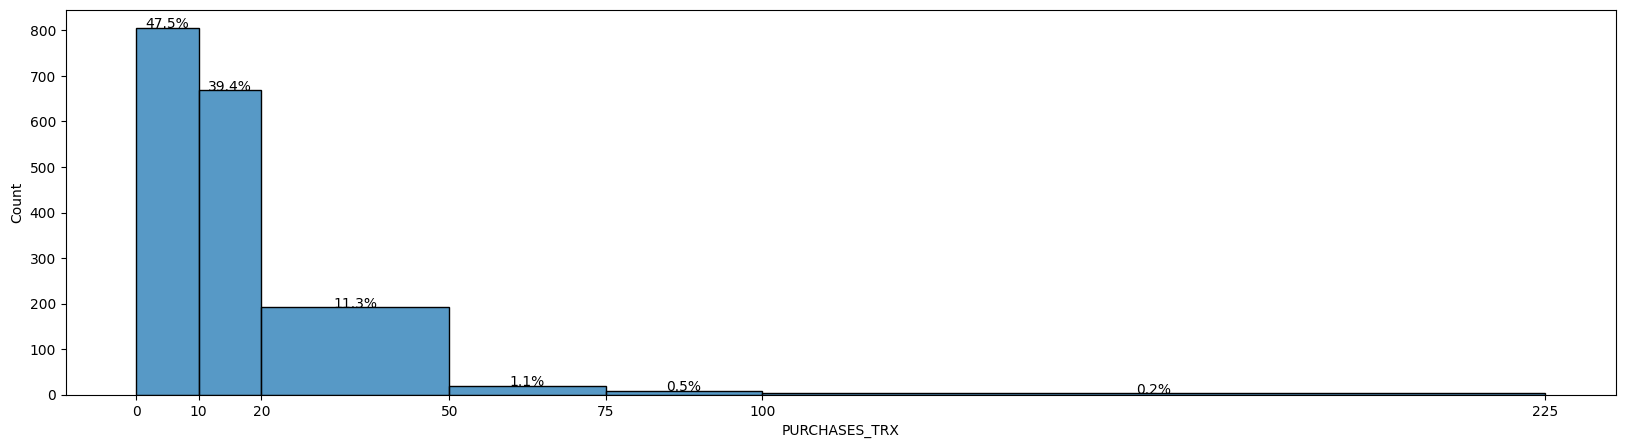

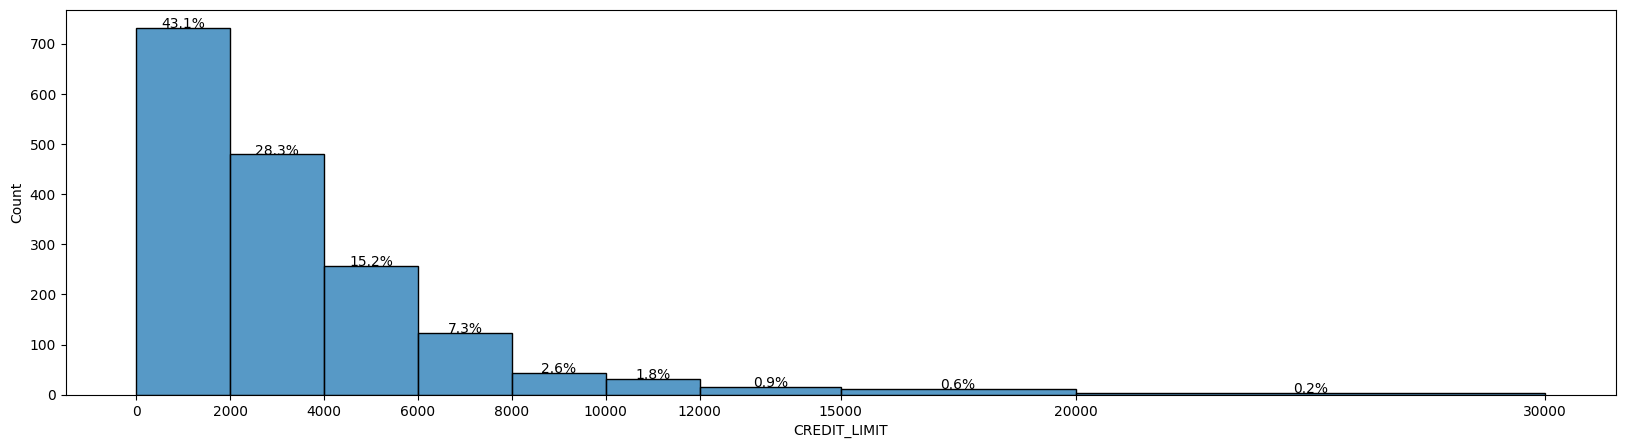

In [69]:
# Histogram plot of Balance column
col = ['BALANCE']
bins = [0, 500, 1000, 2000,4000, 6000, 20000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_0, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_0)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of BALANCE_FREQUENCY column
col = ['BALANCE_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_0, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_0)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of PURCHASES column

col = ['PURCHASES']
bins = [0, 500,1000, 2000, 4000,15000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_0, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_0)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_FREQUENCY' column
col = ['PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_0, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_0)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of 'ONEOFF_PURCHASES_FREQUENCY' column
col = ['ONEOFF_PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_0, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_0)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of INSTALLMENTS_PURCHASES column

col = ['INSTALLMENTS_PURCHASES']
bins = [0, 100, 300, 500, 1000, 2000, 4000, 14000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(30, 10))
    ax = sns.histplot(data=cluster_0, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_0)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of CASH_ADVANCE column

col = ['CASH_ADVANCE']
bins = [0, 500, 2000, 4000,50000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_0, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_0)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_TRX' column
col = ['PURCHASES_TRX']
bins = [0,10,20,50,75,100,225]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_0, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_0)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'CREDIT_LIMIT' column
col = ['CREDIT_LIMIT']
bins = [0,2000,4000, 6000,8000, 10000,12000,15000,20000,30000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_0, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_0)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the figures above, customers in this segment exhibit low balances and credit card limits, alongside minimal spending habits, primarily concentrating on essential purchases.

#### Cluster 1

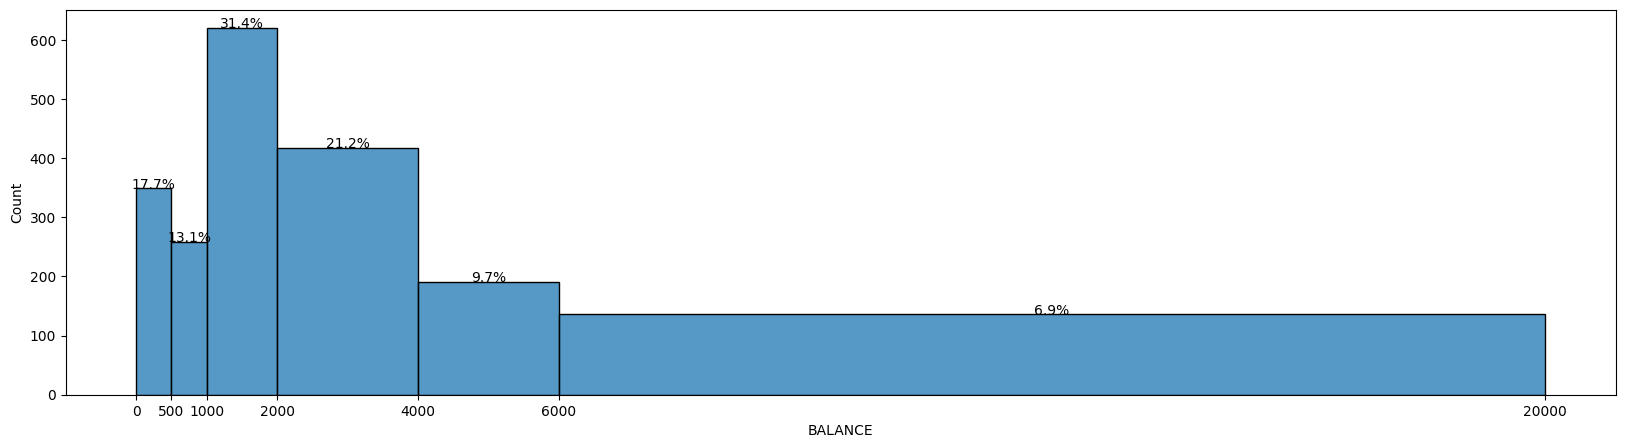

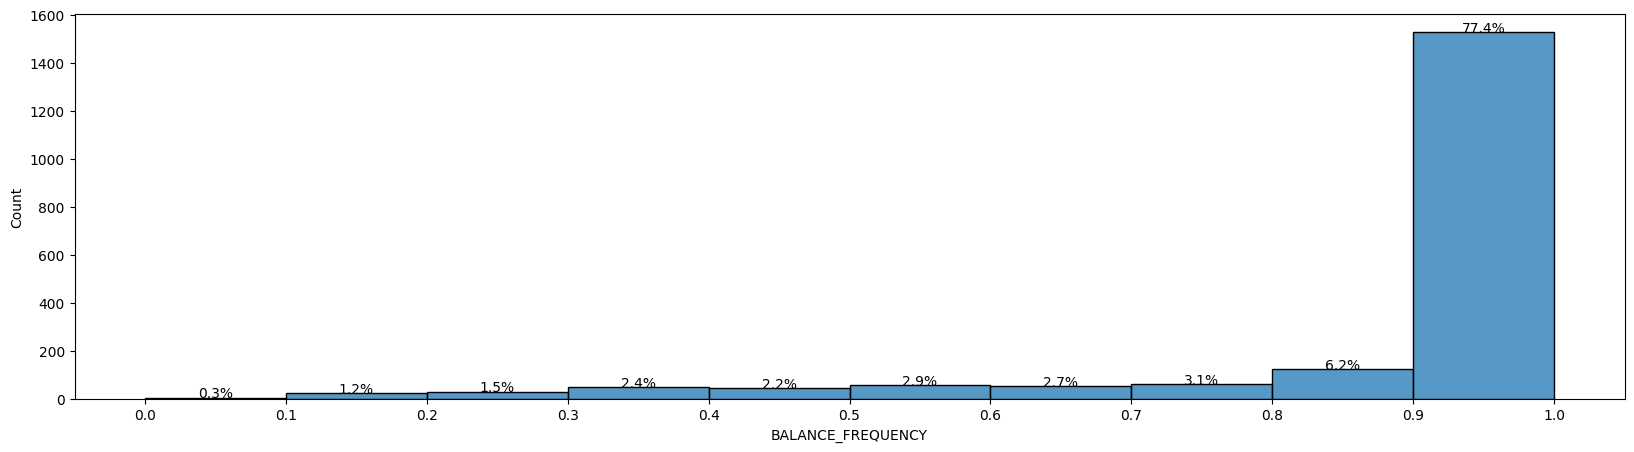

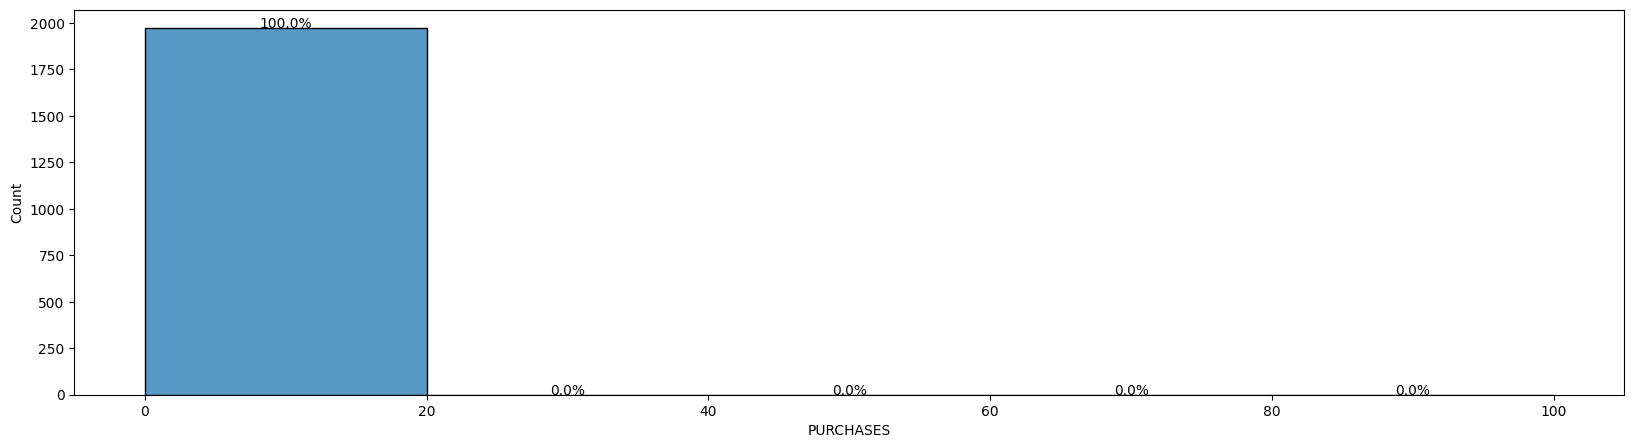

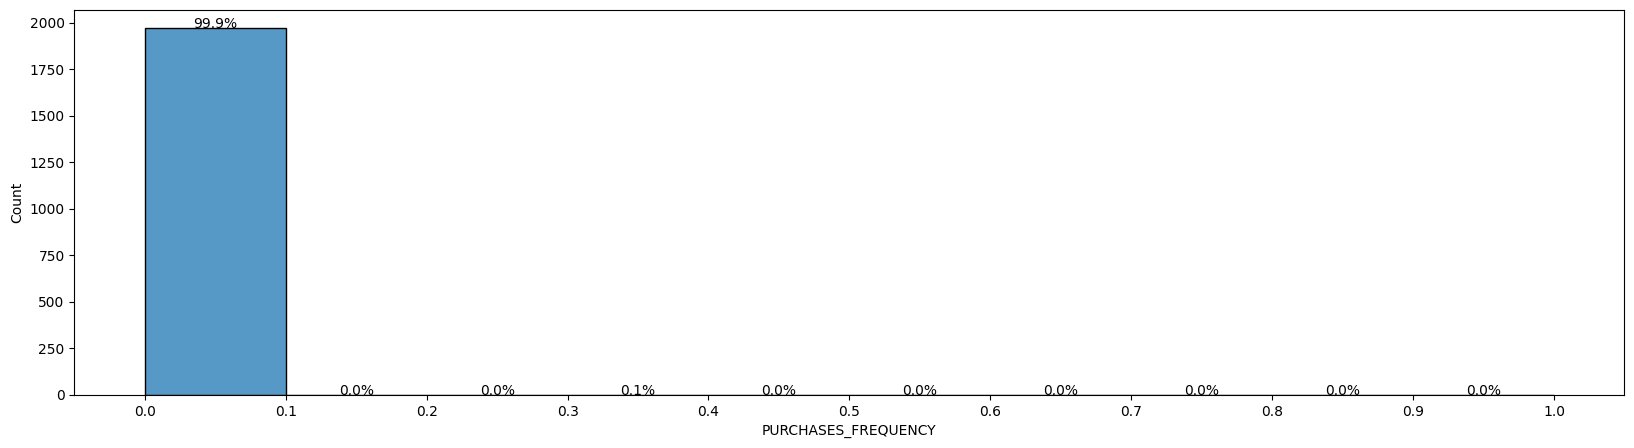

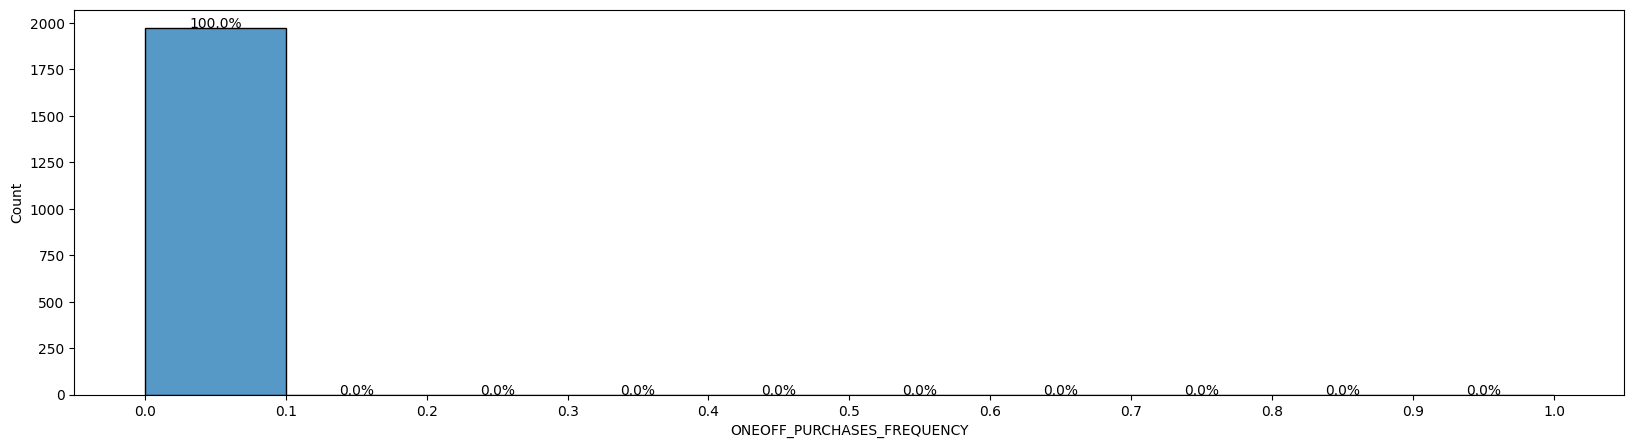

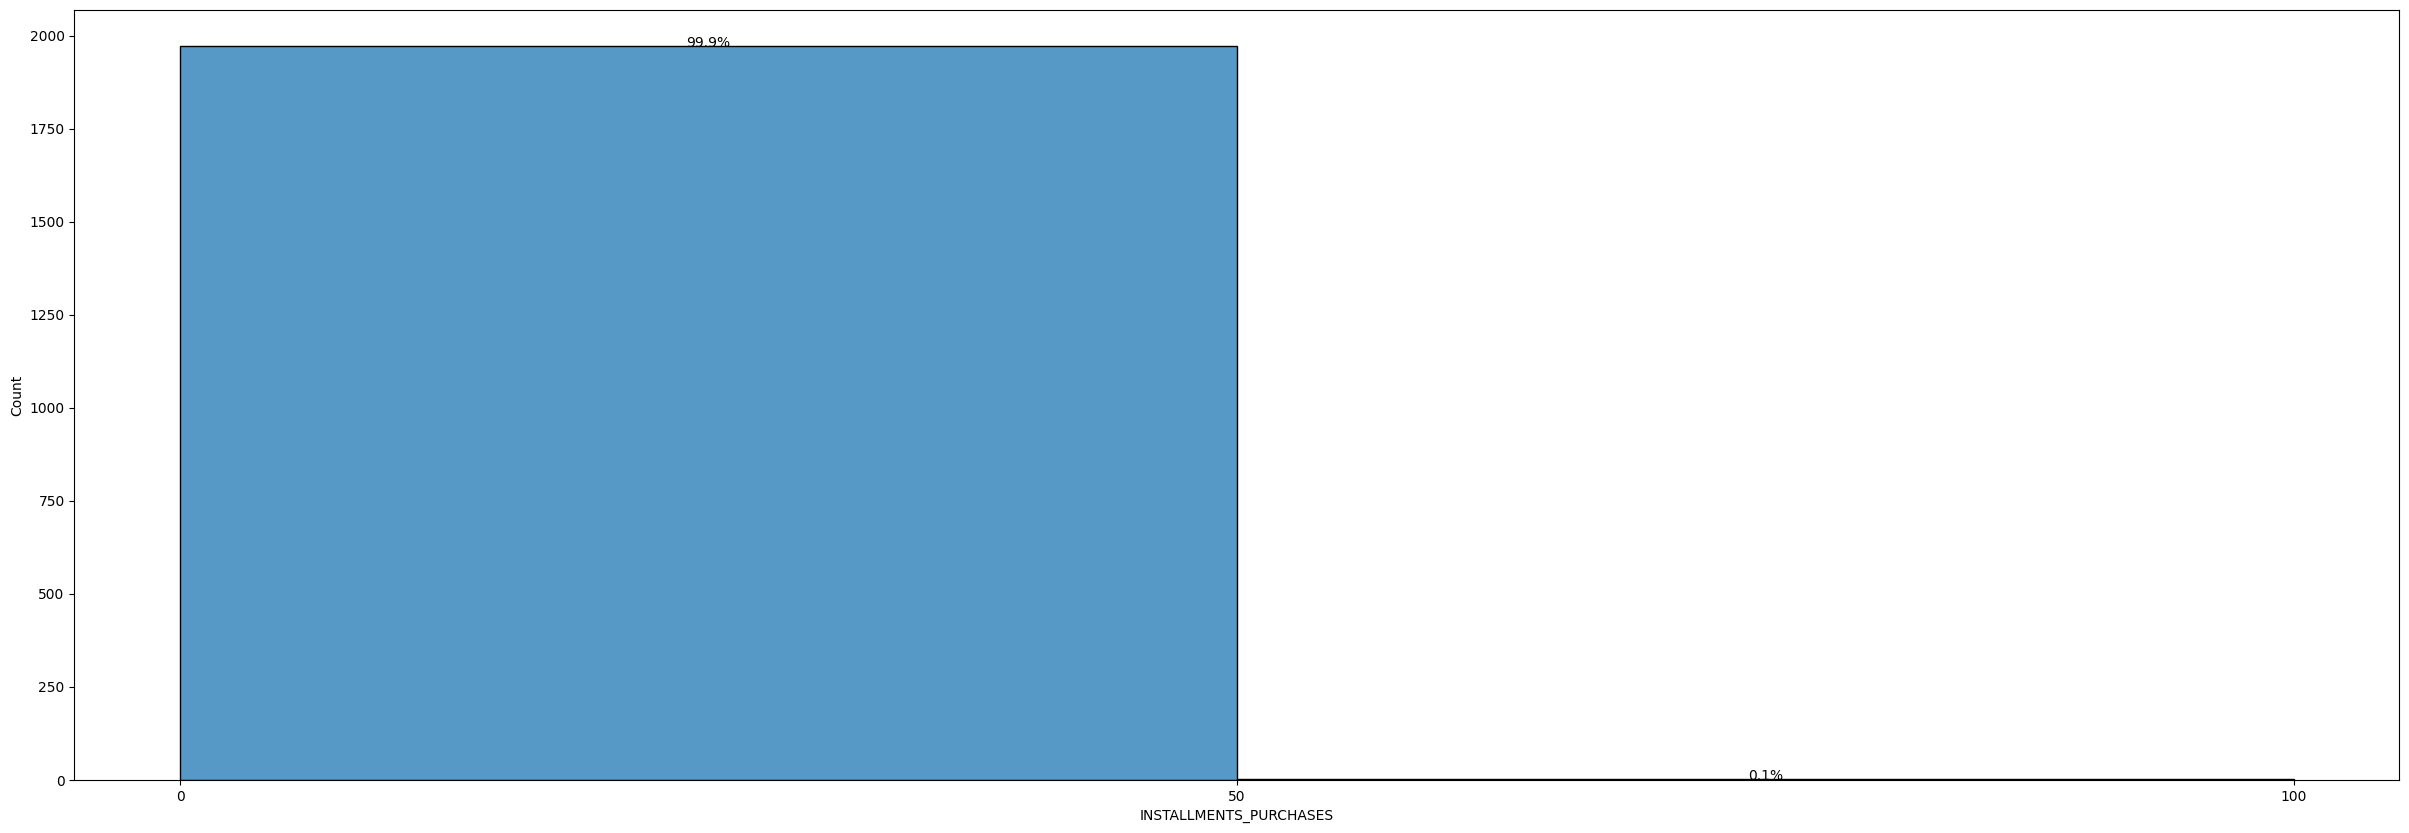

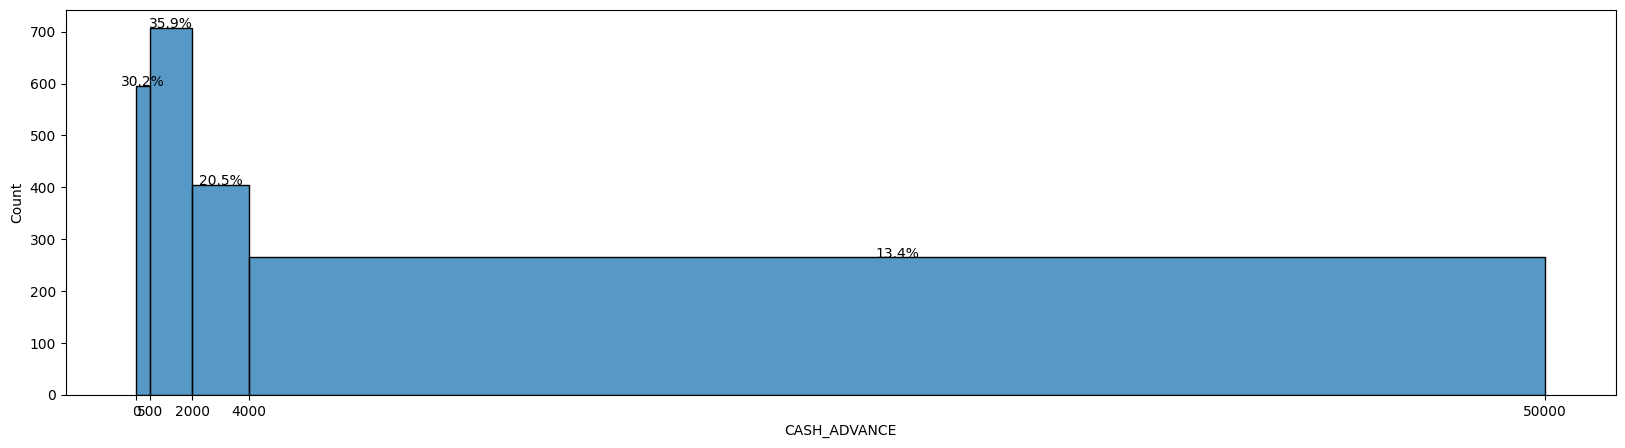

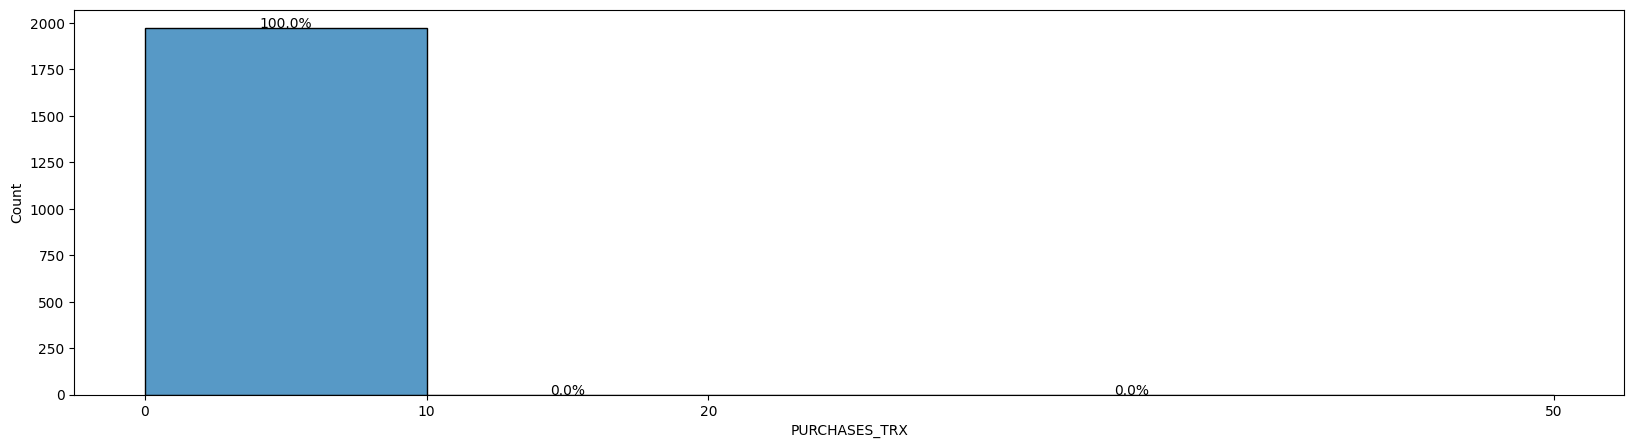

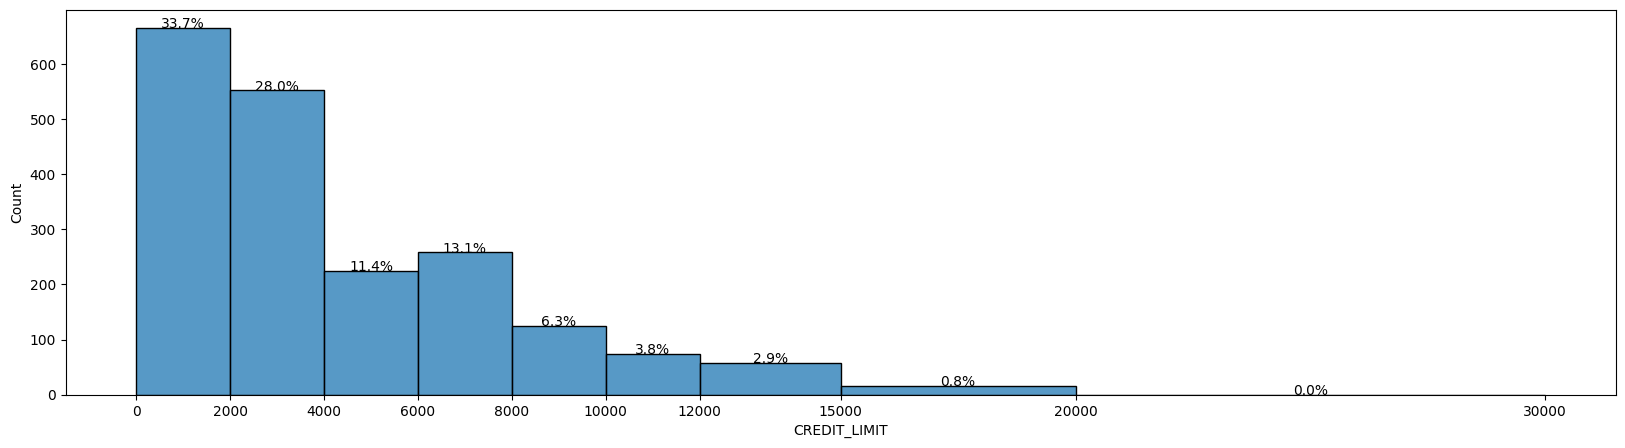

In [70]:
# Histogram plot of Balance column
col = ['BALANCE']
bins = [0, 500, 1000, 2000,4000, 6000, 20000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_1, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_1)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of BALANCE_FREQUENCY column
col = ['BALANCE_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_1, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_1)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of PURCHASES column

col = ['PURCHASES']
bins = [0,20,40,60,80,100]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_1, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_1)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_FREQUENCY' column
col = ['PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_1, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_1)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of 'ONEOFF_PURCHASES_FREQUENCY' column
col = ['ONEOFF_PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_1, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_1)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of INSTALLMENTS_PURCHASES column

col = ['INSTALLMENTS_PURCHASES']
bins = [0,50,100]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(30, 10))
    ax = sns.histplot(data=cluster_1, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_1)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of CASH_ADVANCE column

col = ['CASH_ADVANCE']
bins = [0, 500, 2000, 4000,50000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_1, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_1)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_TRX' column
col = ['PURCHASES_TRX']
bins = [0,10,20,50]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_1, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_1)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'CREDIT_LIMIT' column
col = ['CREDIT_LIMIT']
bins = [0,2000,4000, 6000,8000, 10000,12000,15000,20000,30000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_1, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_1)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the Figures above, This segment serves customers who emphasize stringent budgeting methods. They offer resources and advice on financial management to support these individuals in effectively managing their finances. Despite having higher balances compared to cluster 0, customers in this group seldom engage in purchasing activities, indicating a preference for restrained spending behaviors

#### Cluster 2

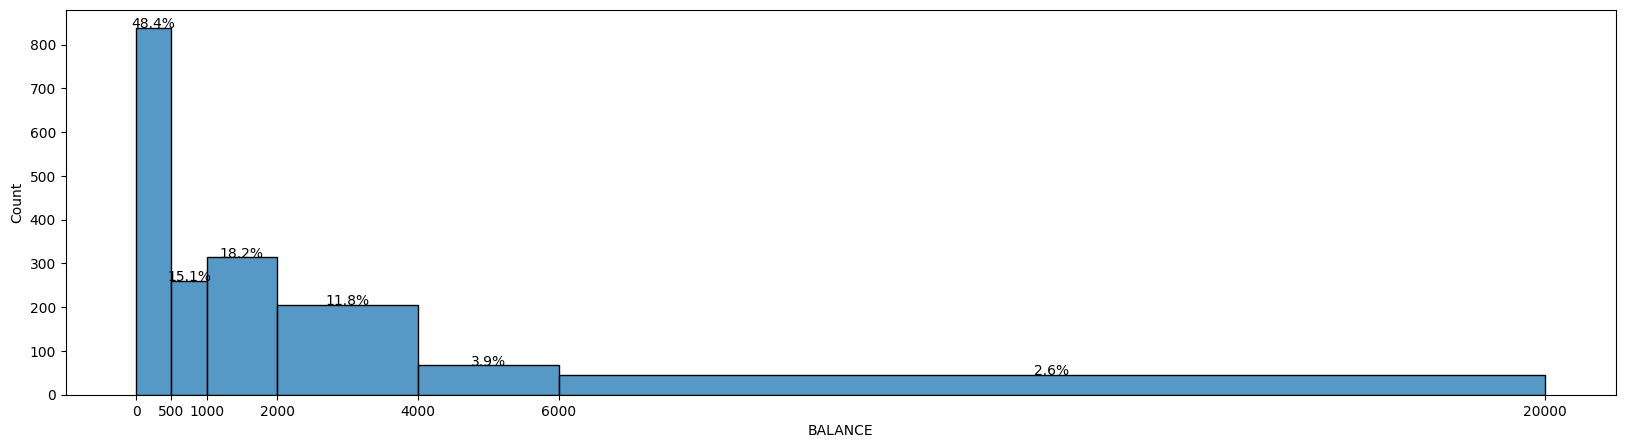

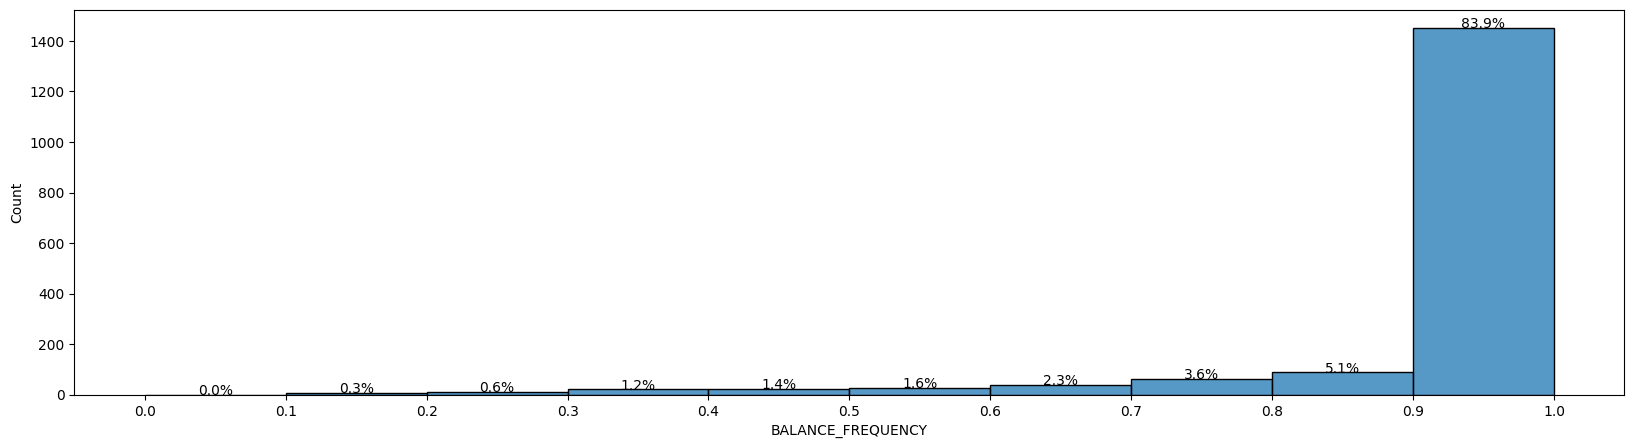

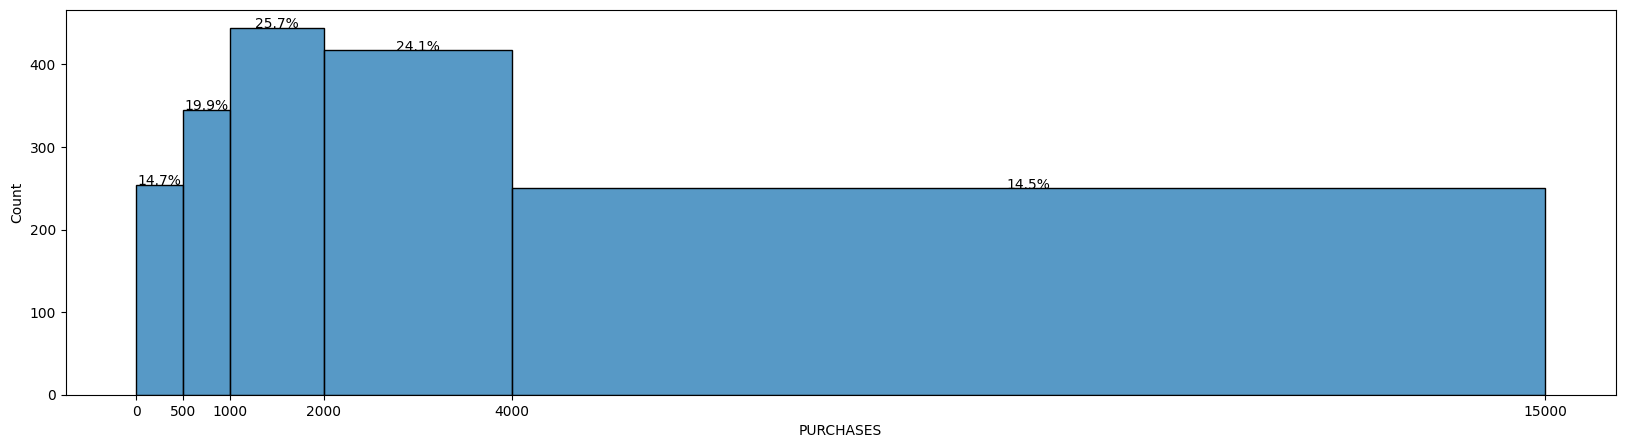

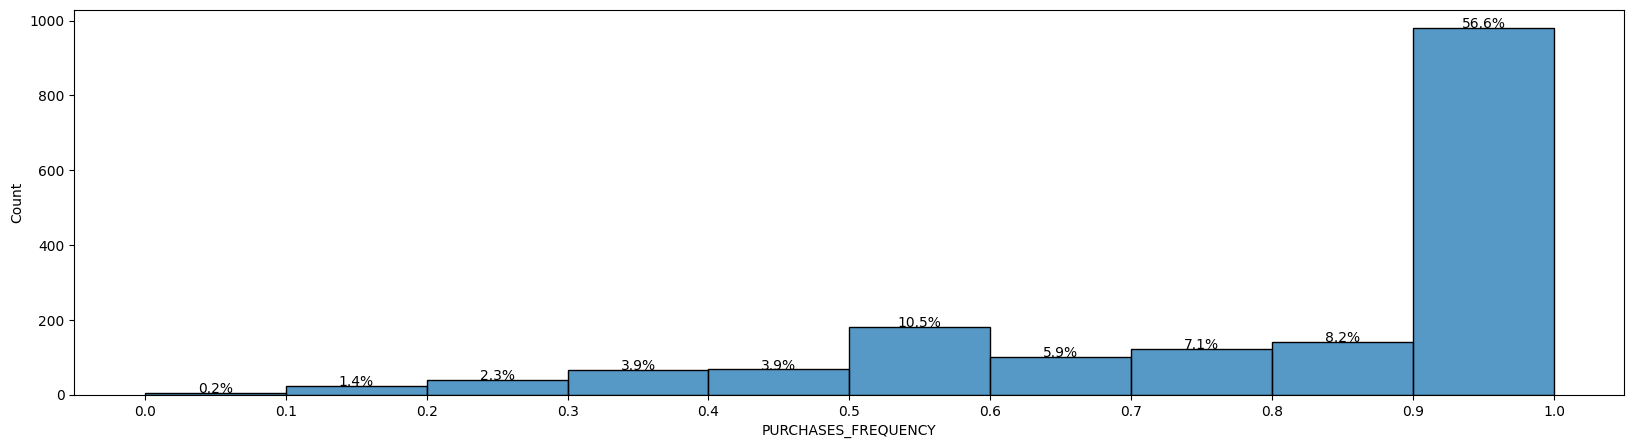

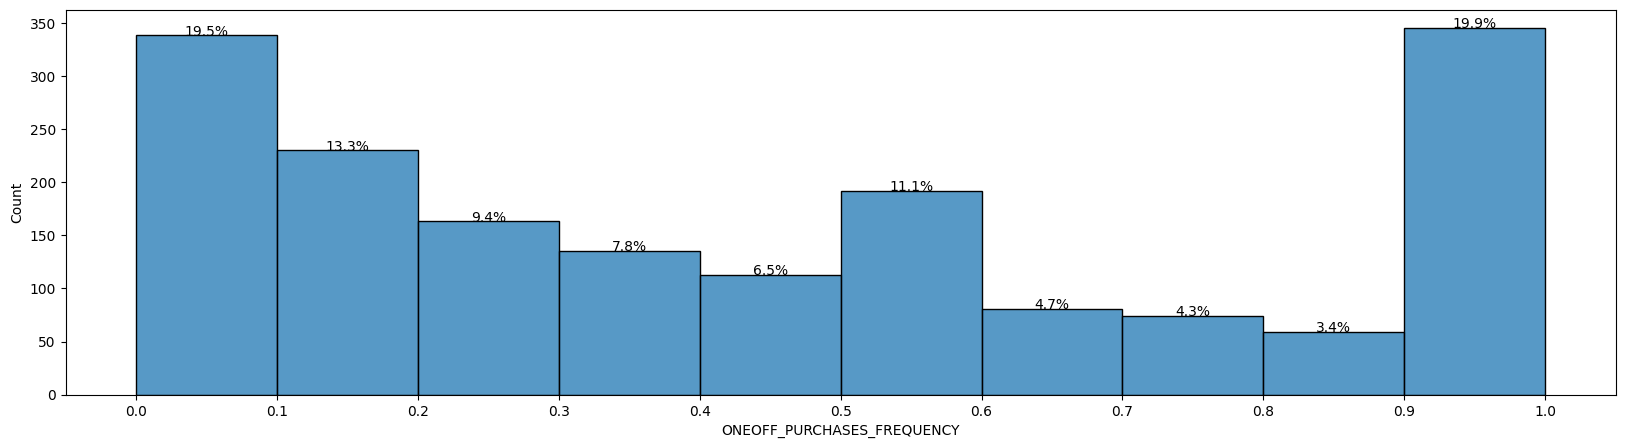

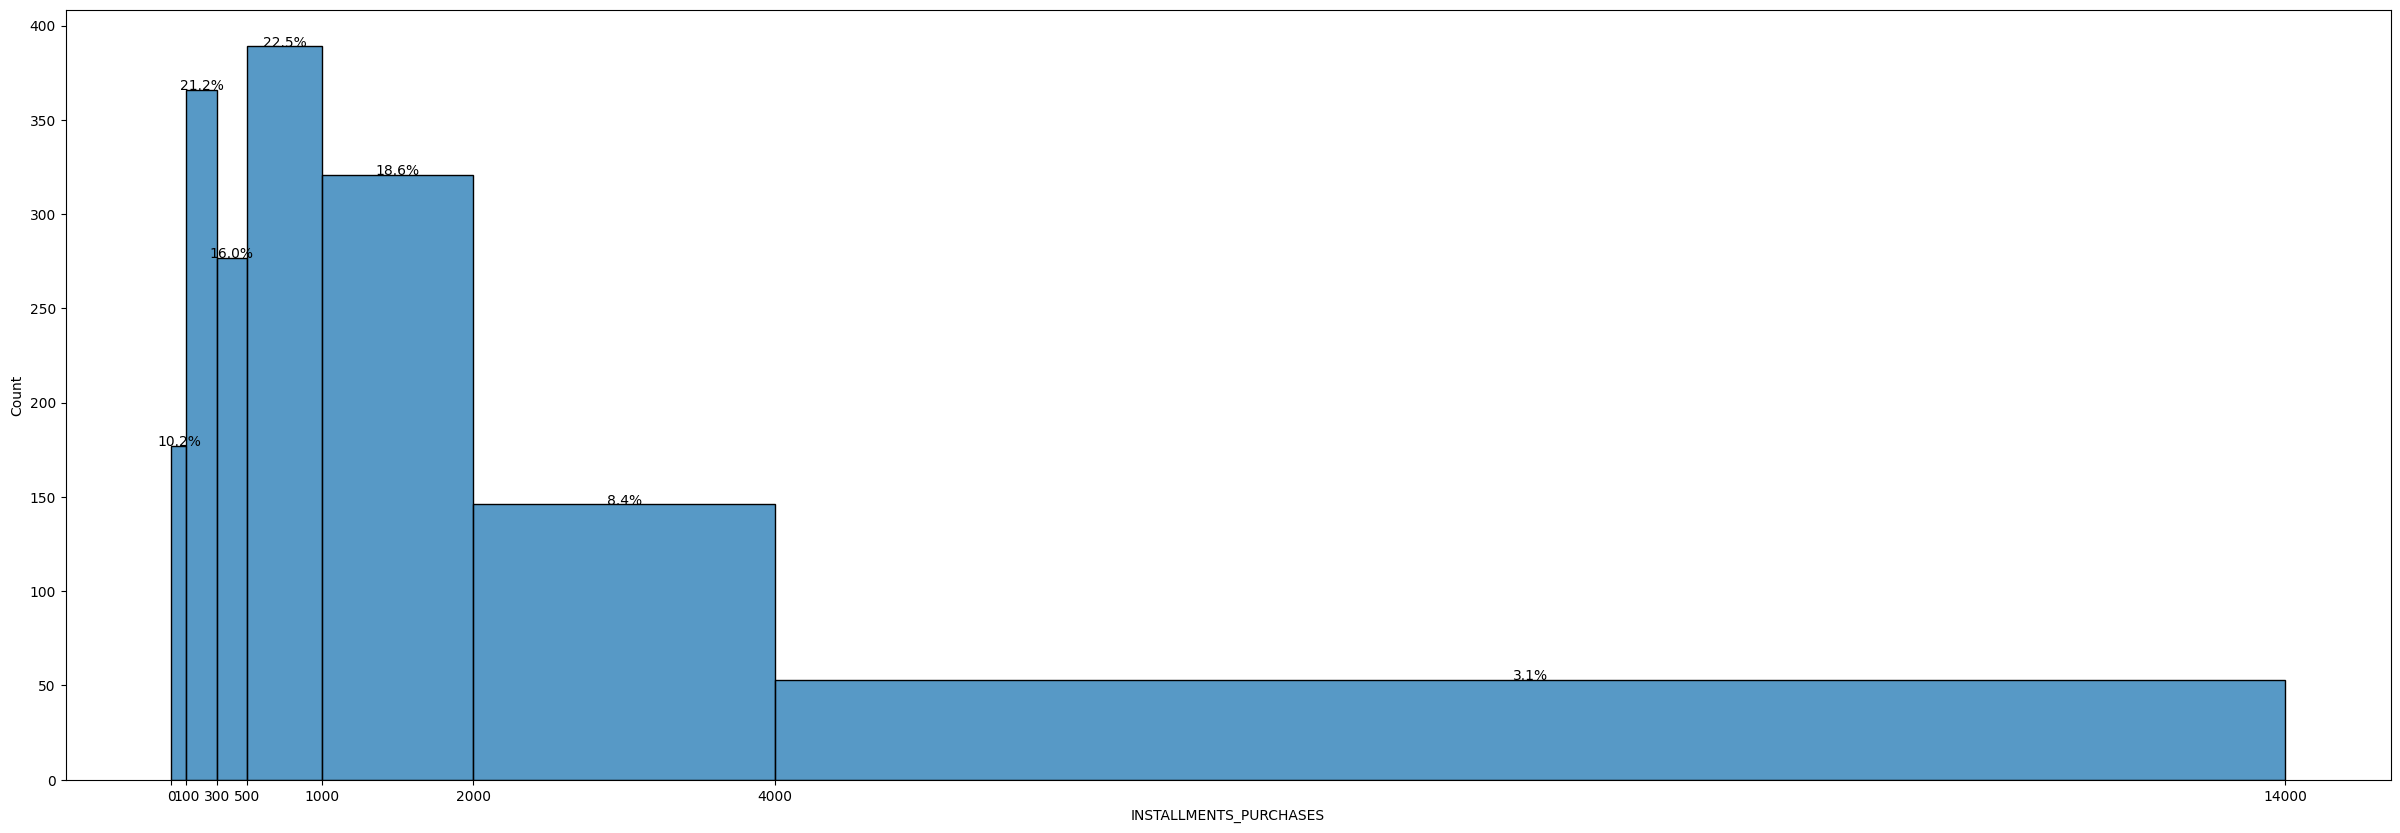

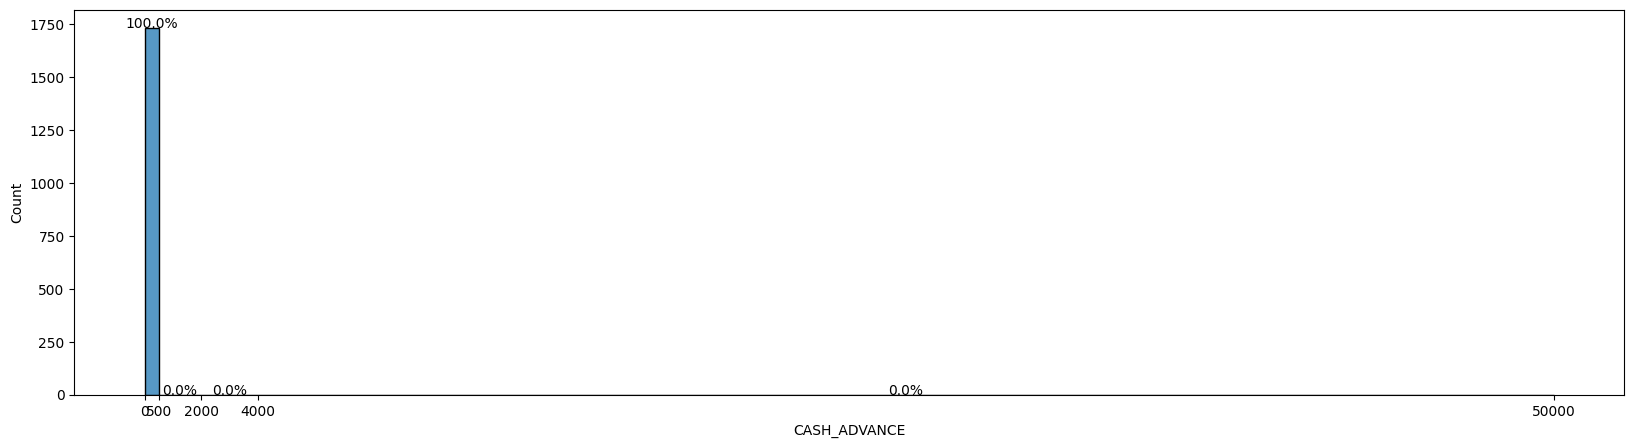

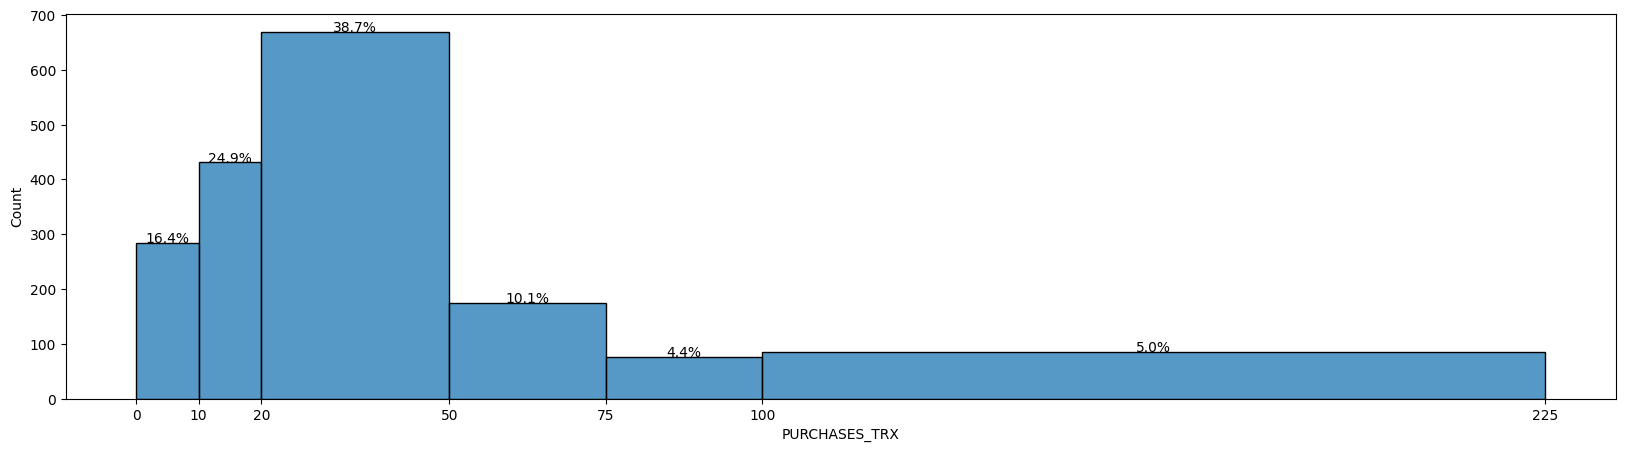

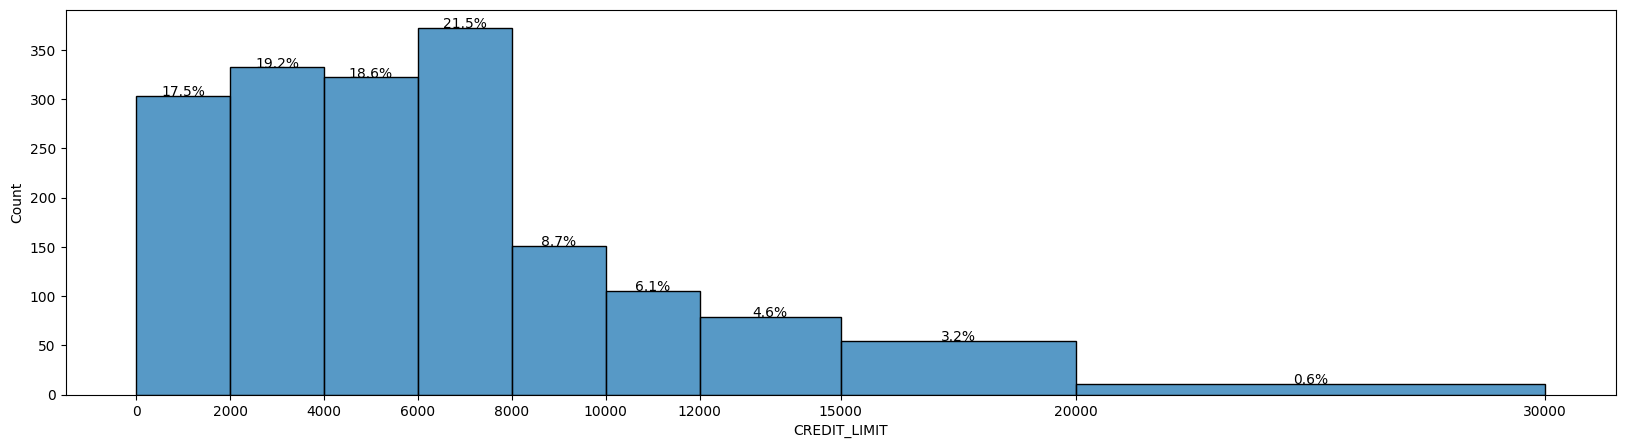

In [71]:
# Histogram plot of Balance column
col = ['BALANCE']
bins = [0, 500, 1000, 2000,4000, 6000, 20000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_2, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_2)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of BALANCE_FREQUENCY column
col = ['BALANCE_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_2, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_2)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of PURCHASES column

col = ['PURCHASES']
bins = [0, 500,1000, 2000, 4000,15000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_2, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_2)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_FREQUENCY' column
col = ['PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_2, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_2)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of 'ONEOFF_PURCHASES_FREQUENCY' column
col = ['ONEOFF_PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_2, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_2)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of INSTALLMENTS_PURCHASES column

col = ['INSTALLMENTS_PURCHASES']
bins = [0, 100, 300, 500, 1000, 2000, 4000, 14000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(30, 10))
    ax = sns.histplot(data=cluster_2, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_2)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of CASH_ADVANCE column

col = ['CASH_ADVANCE']
bins = [0, 500, 2000, 4000,50000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_2, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_2)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_TRX' column
col = ['PURCHASES_TRX']
bins = [0,10,20,50,75,100,225]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_2, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_2)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'CREDIT_LIMIT' column
col = ['CREDIT_LIMIT']
bins = [0,2000,4000, 6000,8000, 10000,12000,15000,20000,30000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_2, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_2)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the Figures above, customers in this segment show diverse purchasing behaviors, frequently making high-value transactions. This indicates an active customer base that regularly buys a variety of products or services, often in significant quantities. These customers likely represent a lucrative market segment with substantial spending power, highlighting the potential for targeted marketing strategies and specialized product offerings to maximize sales opportunities.

#### Cluster 3

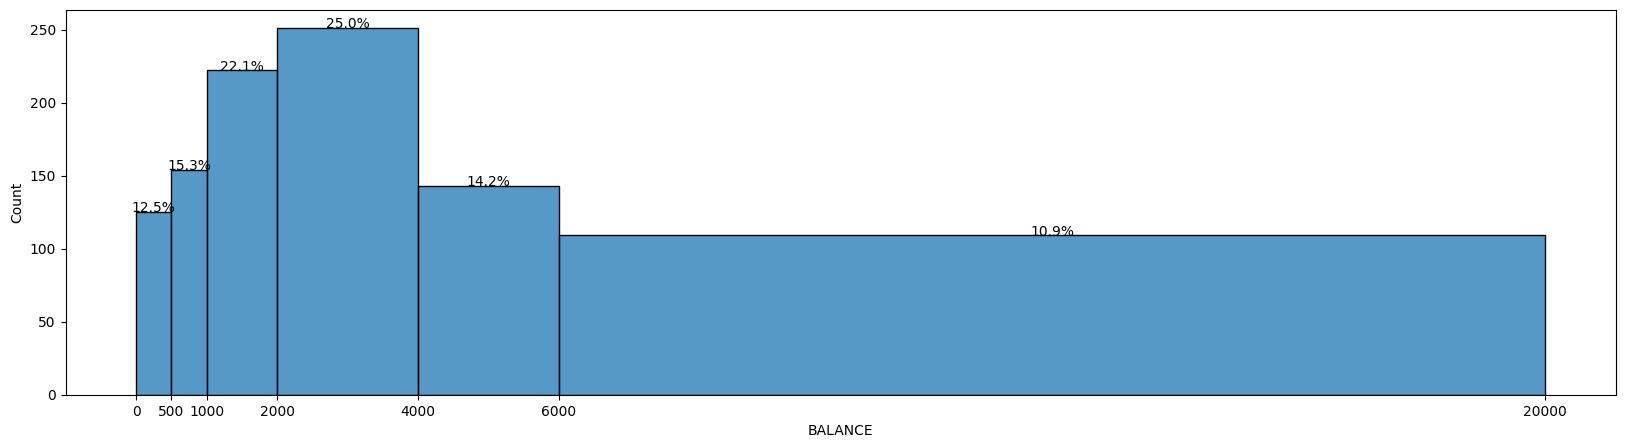

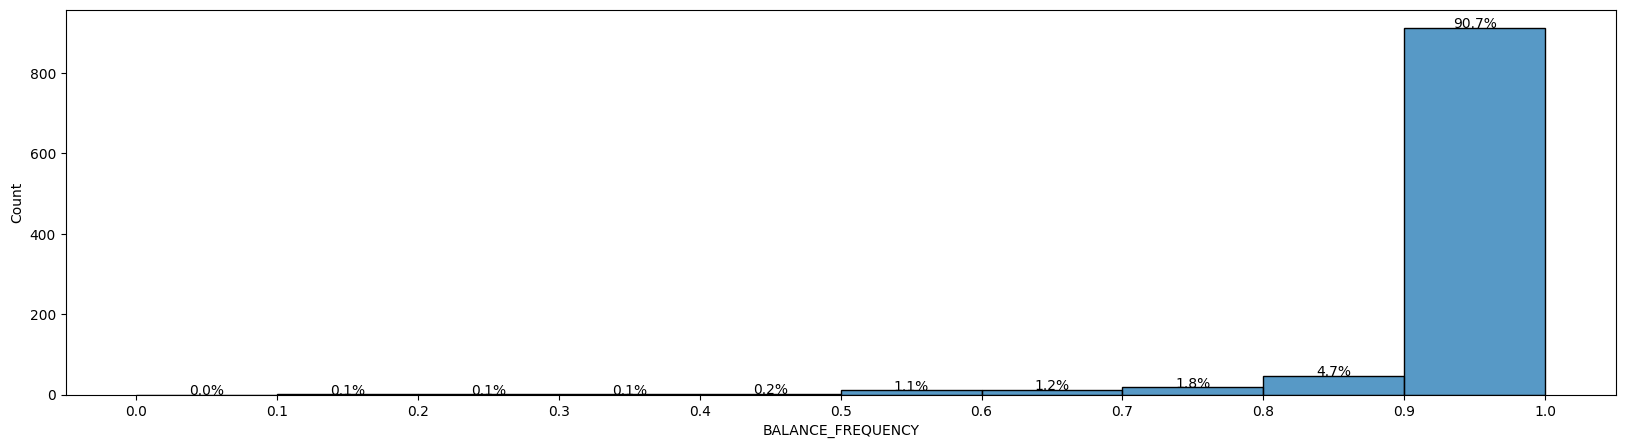

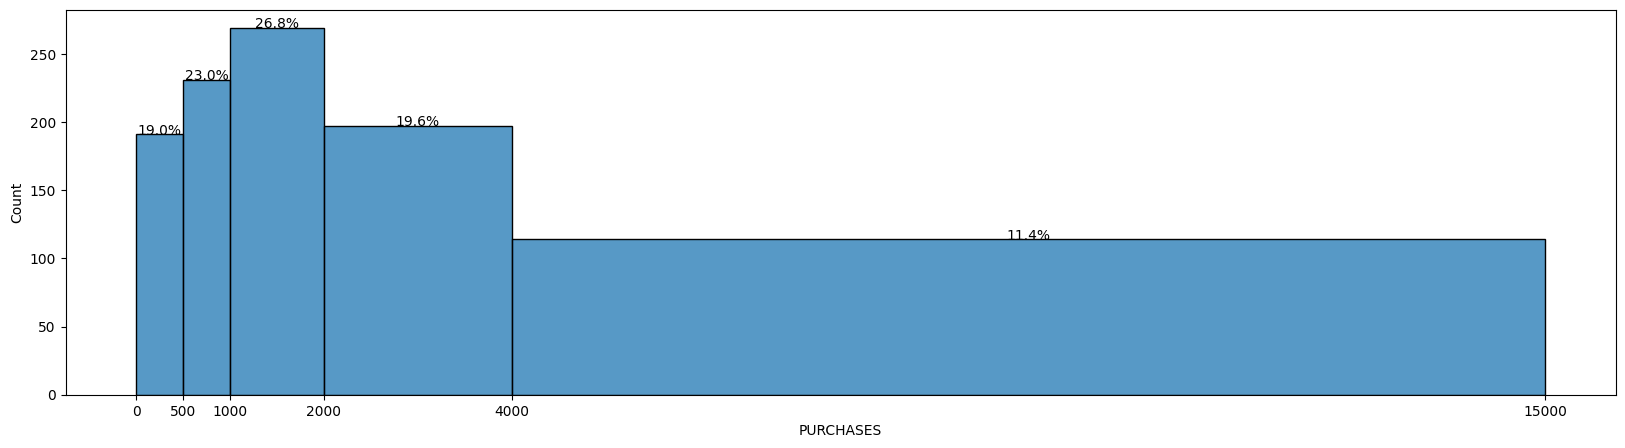

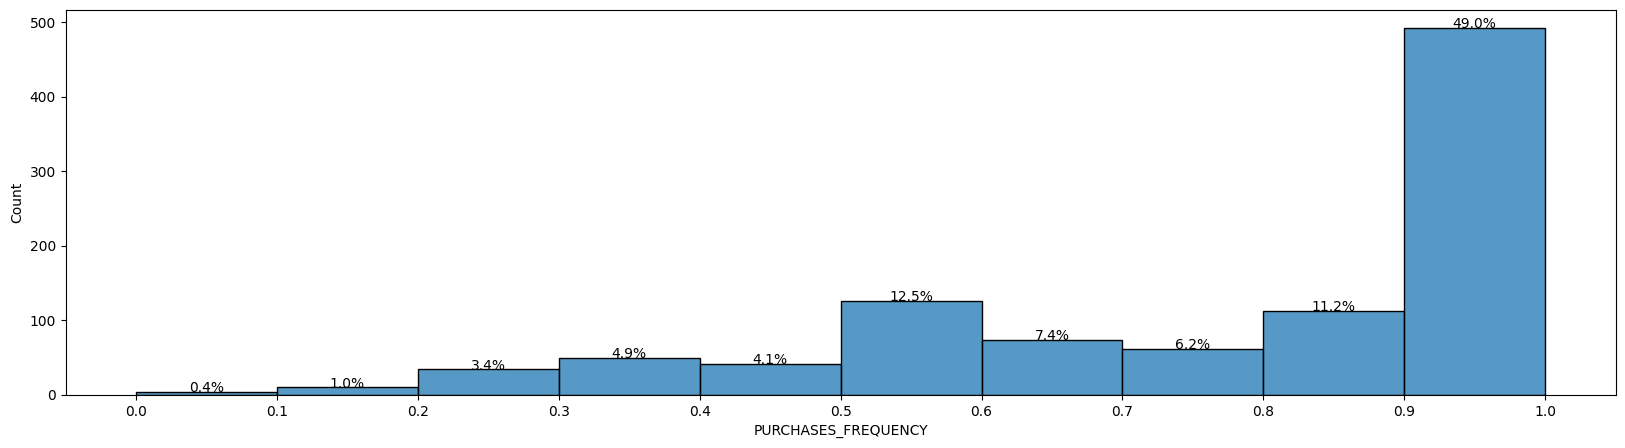

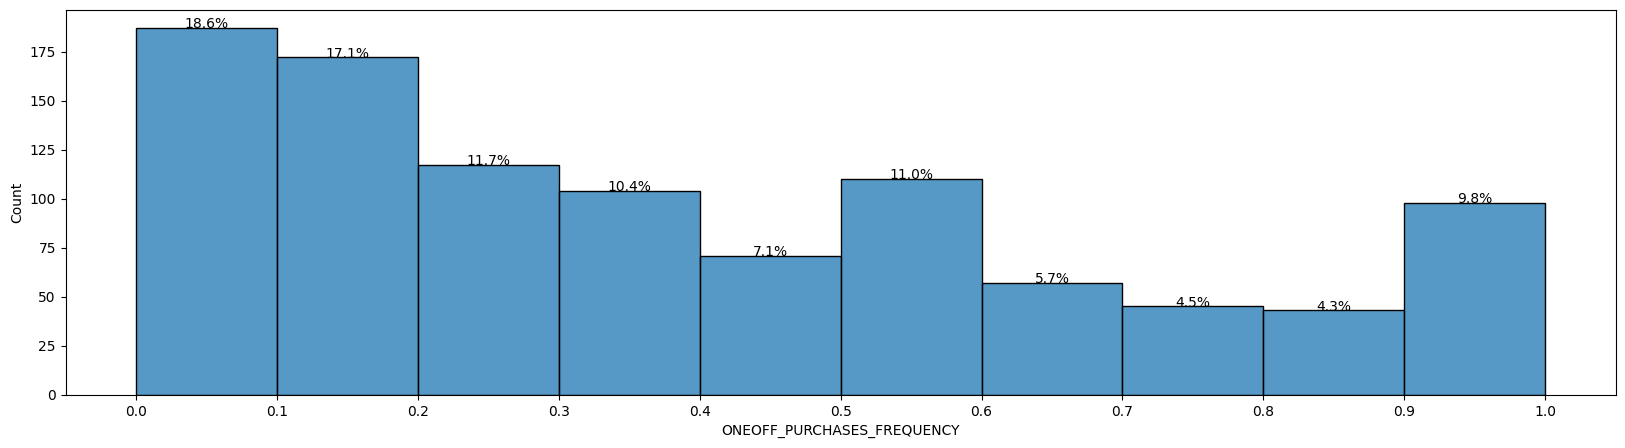

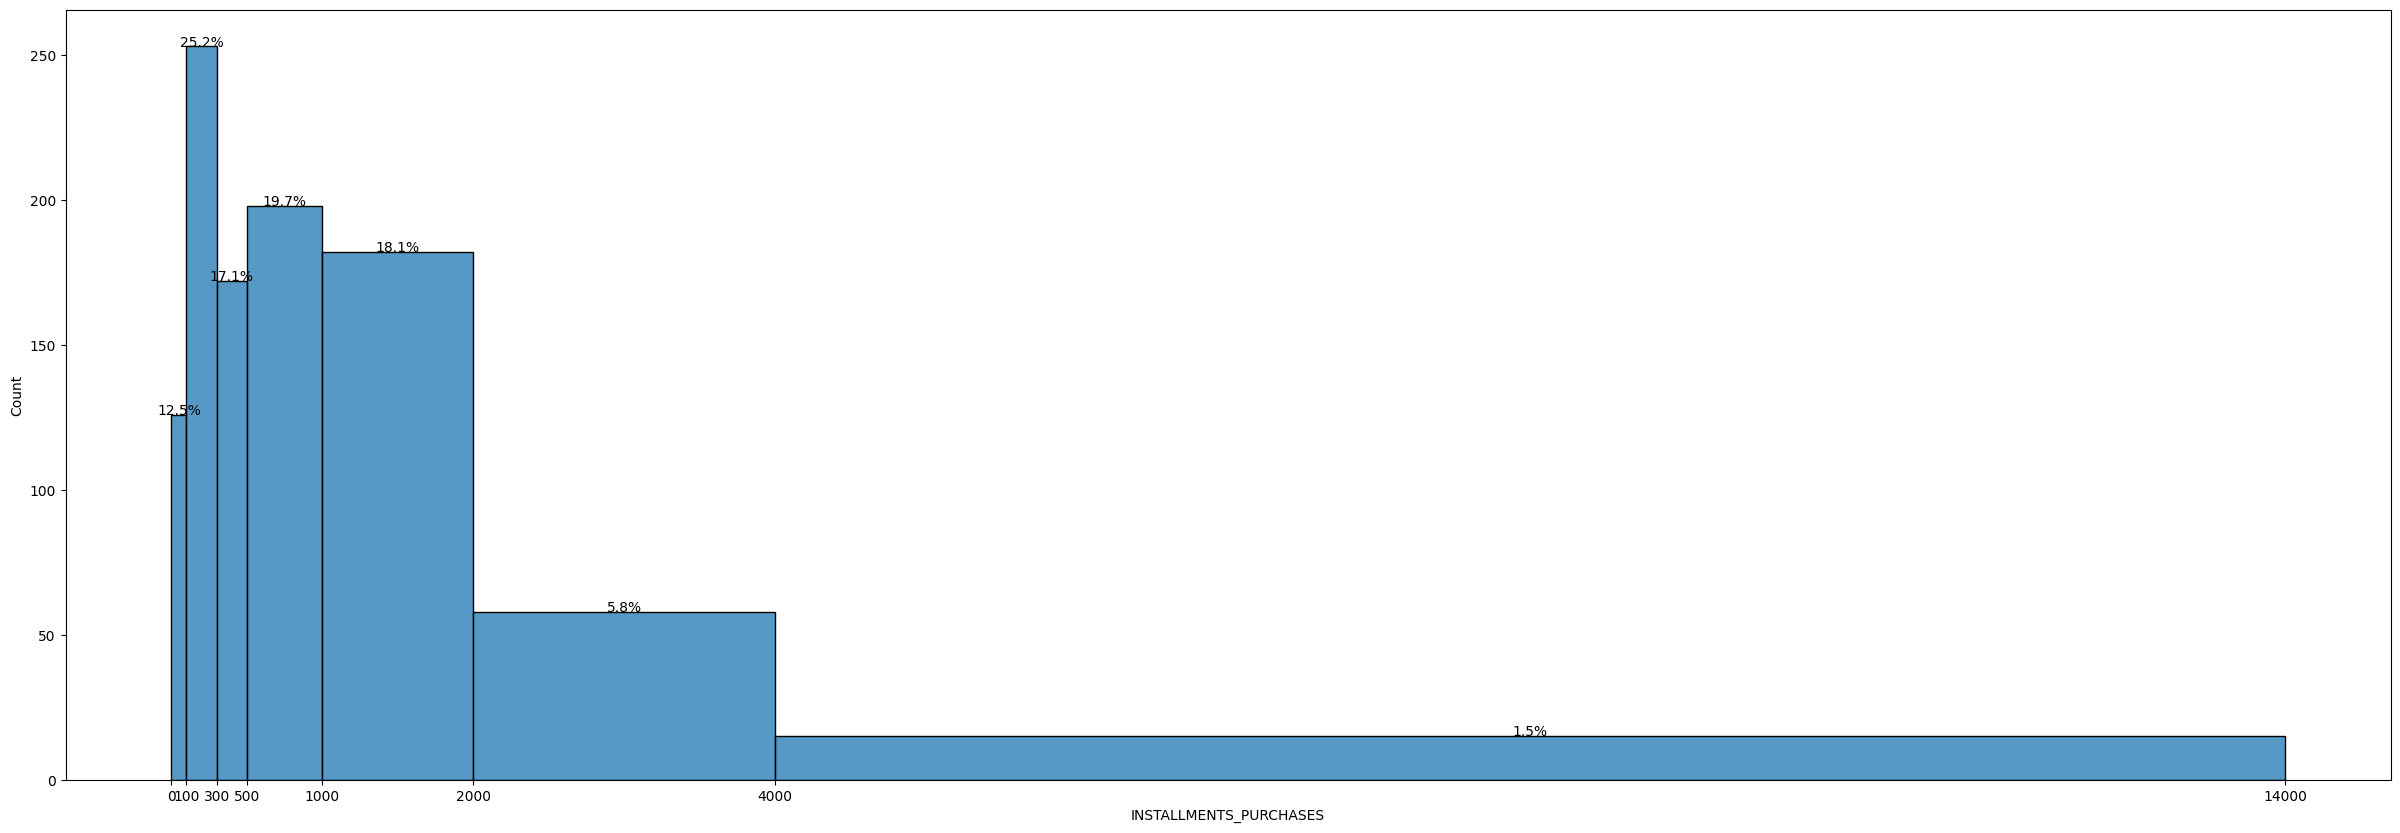

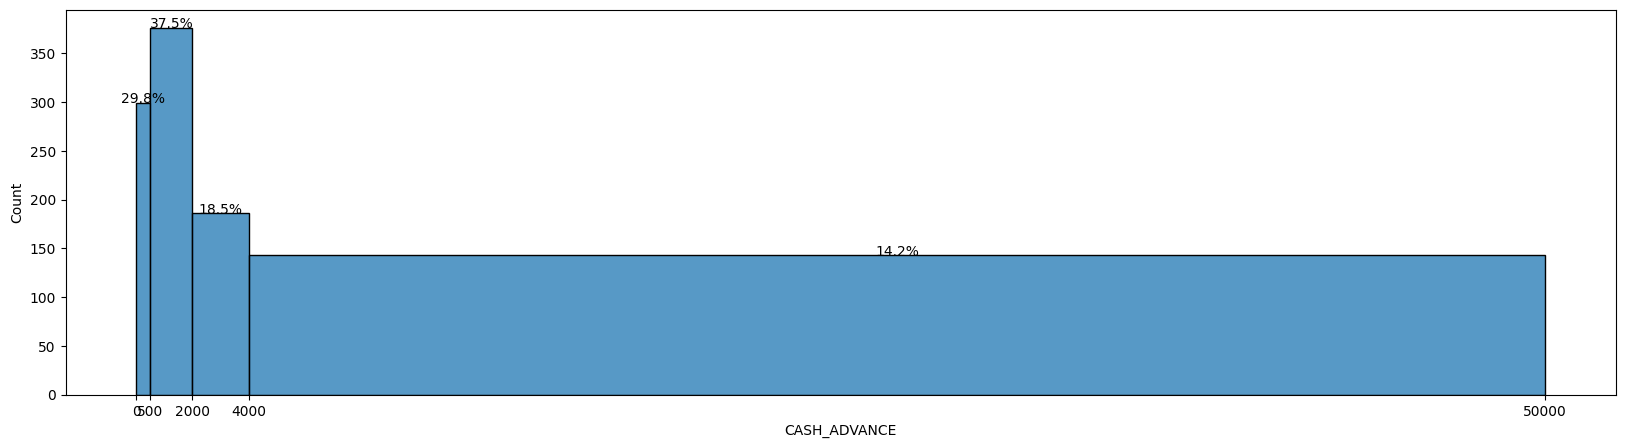

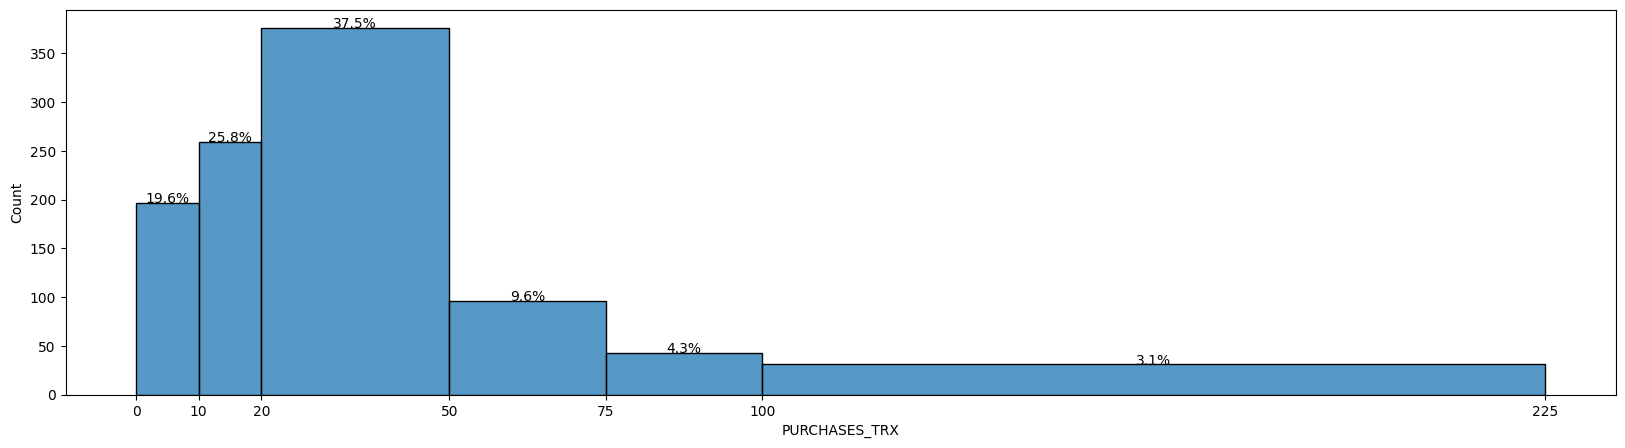

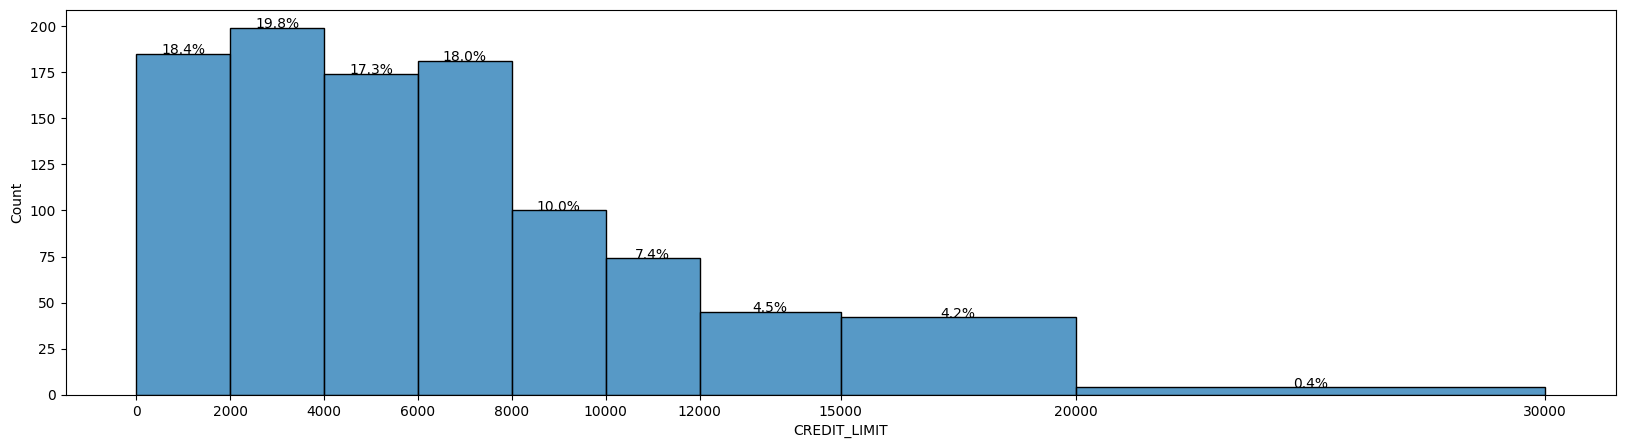

In [72]:
# Histogram plot of Balance column
col = ['BALANCE']
bins = [0, 500, 1000, 2000,4000, 6000, 20000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_3, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_3)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of BALANCE_FREQUENCY column
col = ['BALANCE_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_3, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_3)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of PURCHASES column

col = ['PURCHASES']
bins = [0, 500,1000, 2000, 4000,15000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_3, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_3)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_FREQUENCY' column
col = ['PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_3, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_3)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of 'ONEOFF_PURCHASES_FREQUENCY' column
col = ['ONEOFF_PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_3, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_3)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of INSTALLMENTS_PURCHASES column

col = ['INSTALLMENTS_PURCHASES']
bins = [0, 100, 300, 500, 1000, 2000, 4000, 14000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(30, 10))
    ax = sns.histplot(data=cluster_3, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_3)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of CASH_ADVANCE column

col = ['CASH_ADVANCE']
bins = [0, 500, 2000, 4000,50000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_3, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_3)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_TRX' column
col = ['PURCHASES_TRX']
bins = [0,10,20,50,75,100,225]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_3, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_3)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'CREDIT_LIMIT' column
col = ['CREDIT_LIMIT']
bins = [0,2000,4000, 6000,8000, 10000,12000,15000,20000,30000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_3, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_3)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the Figures above, customers in this segment boast remarkably high credit limits and engage in a considerable number of purchase transactions. The majority of these customers demonstrate a consistent pattern of frequent and substantial spending, often making high-value purchases. Furthermore, they maintain exceptionally high balances in their accounts. This segment caters exclusively to top-tier customers with the highest balances, providing them with luxury services and tailored experiences to suit their distinctive preferences

#### Cluster 4

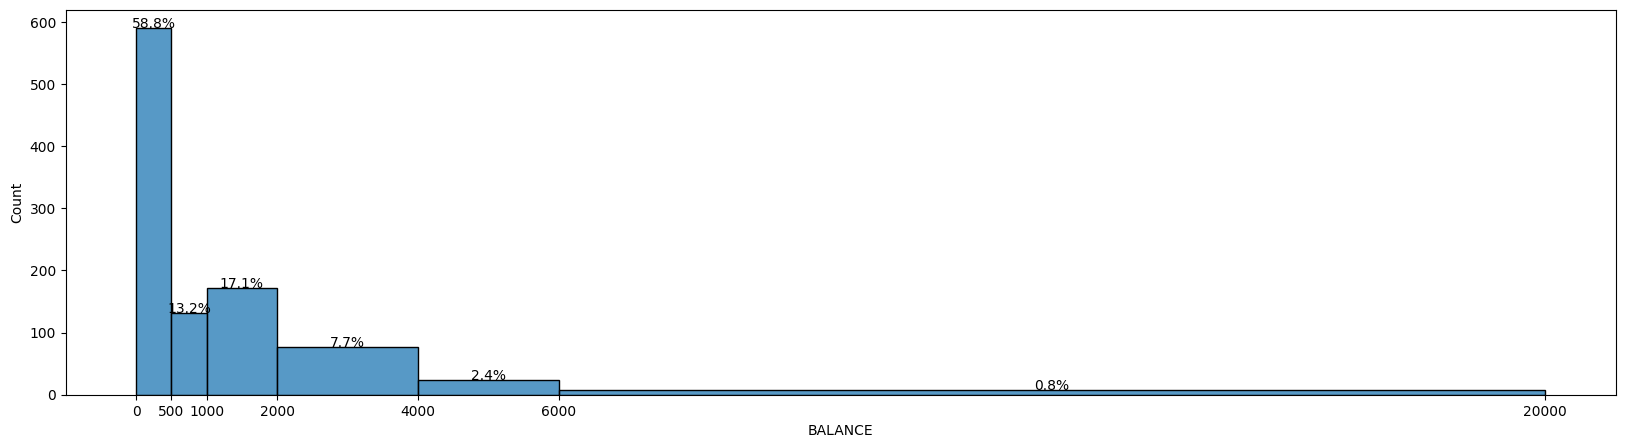

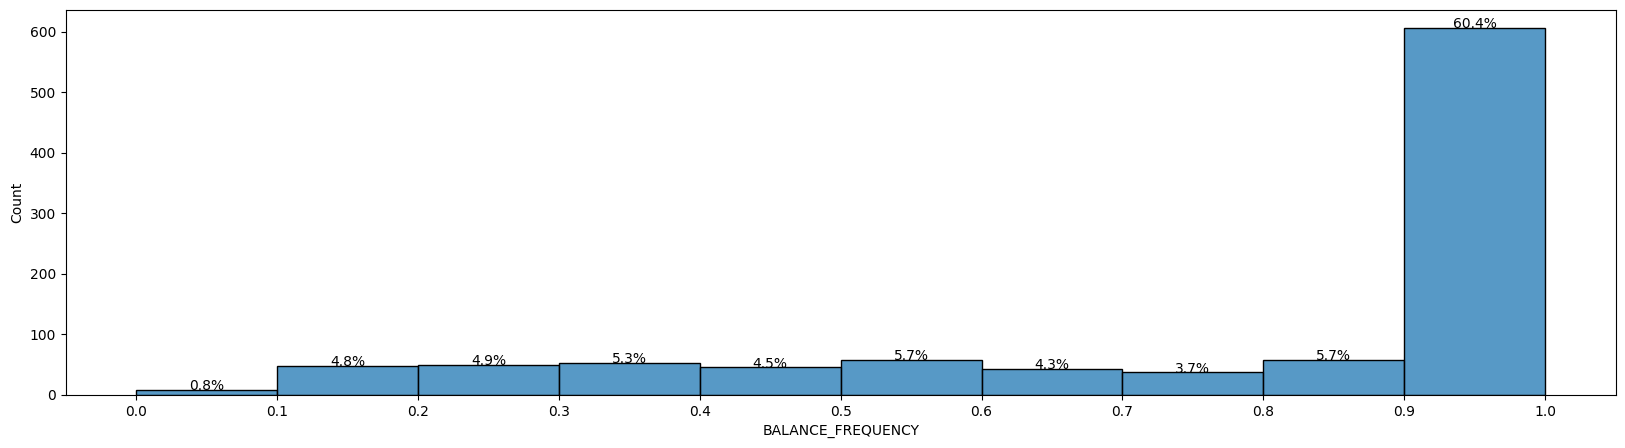

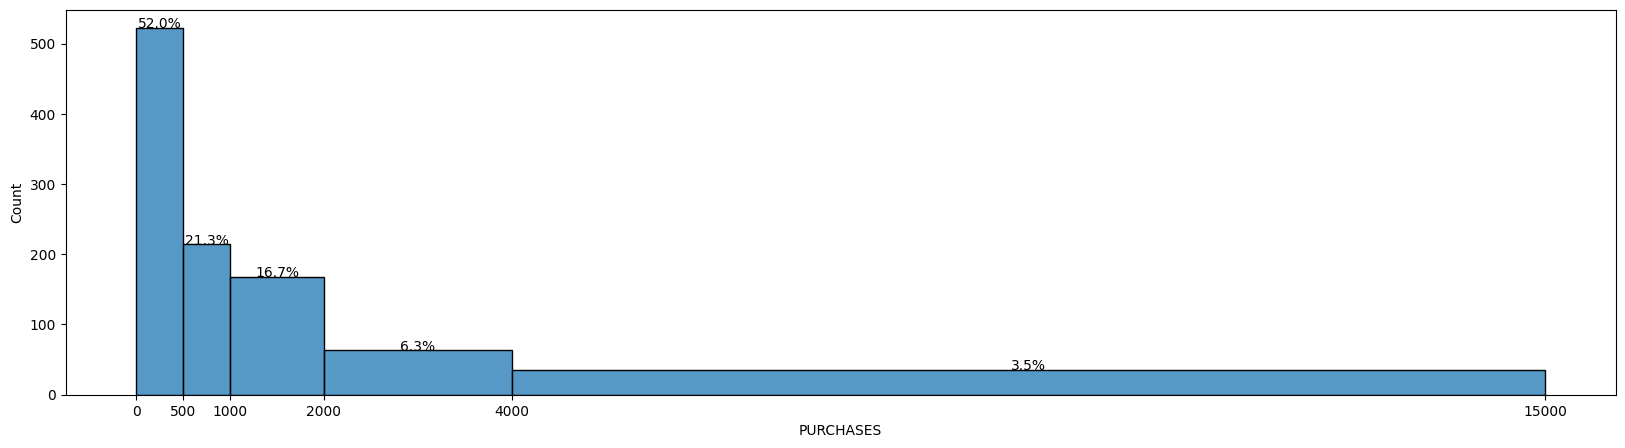

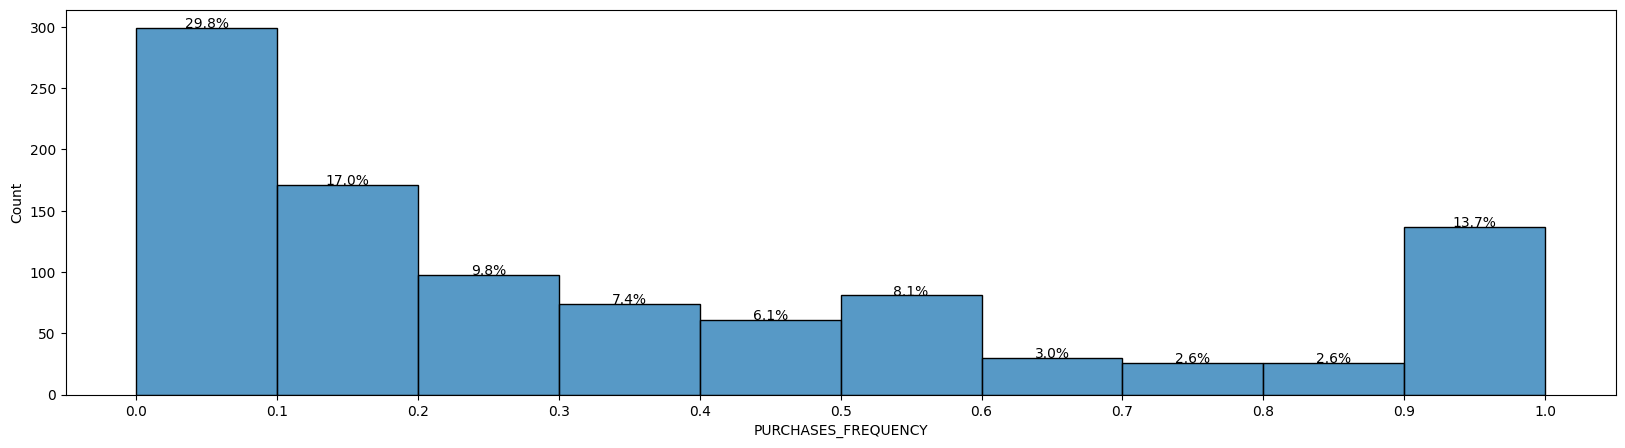

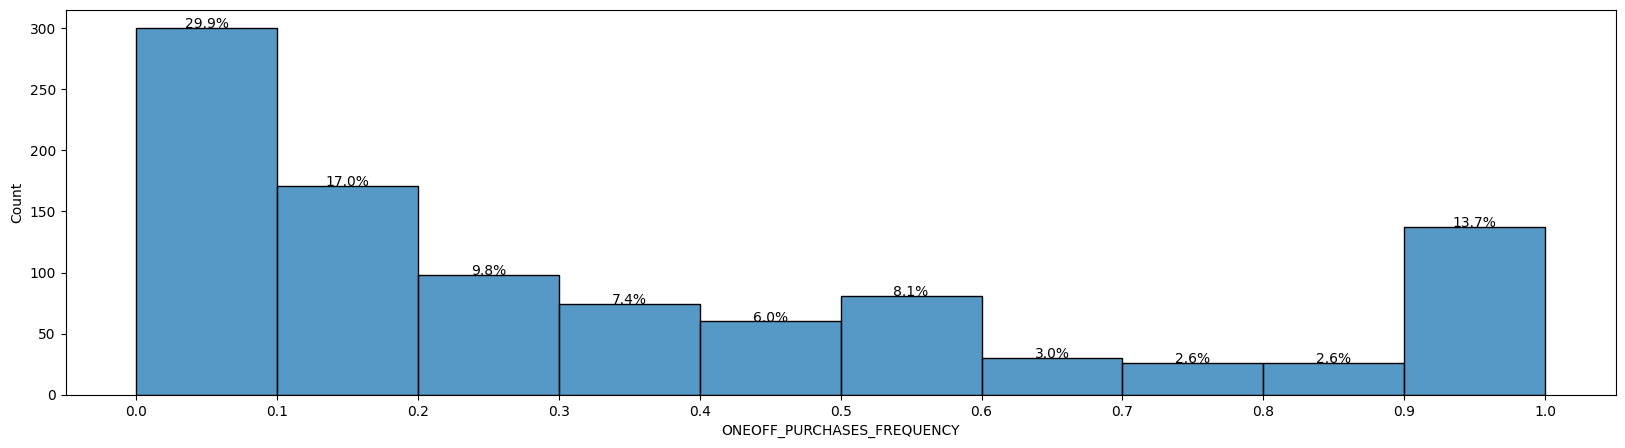

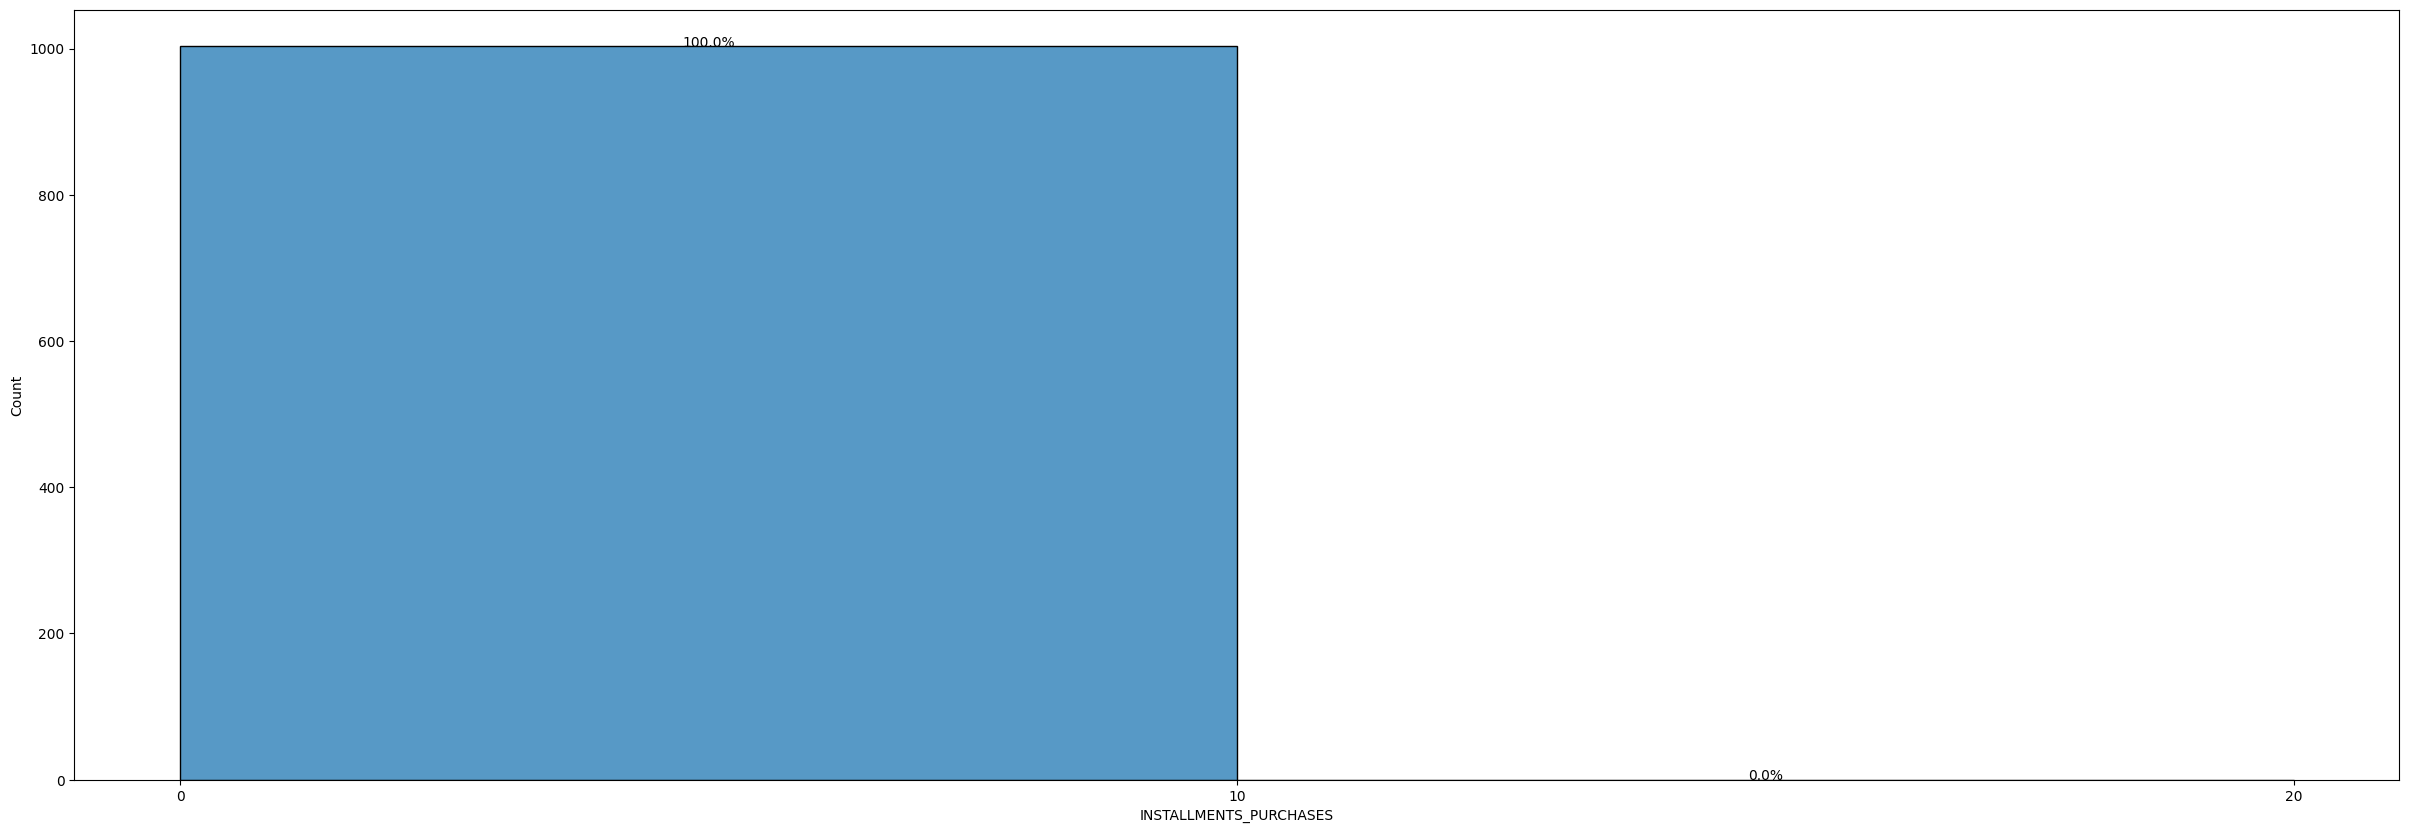

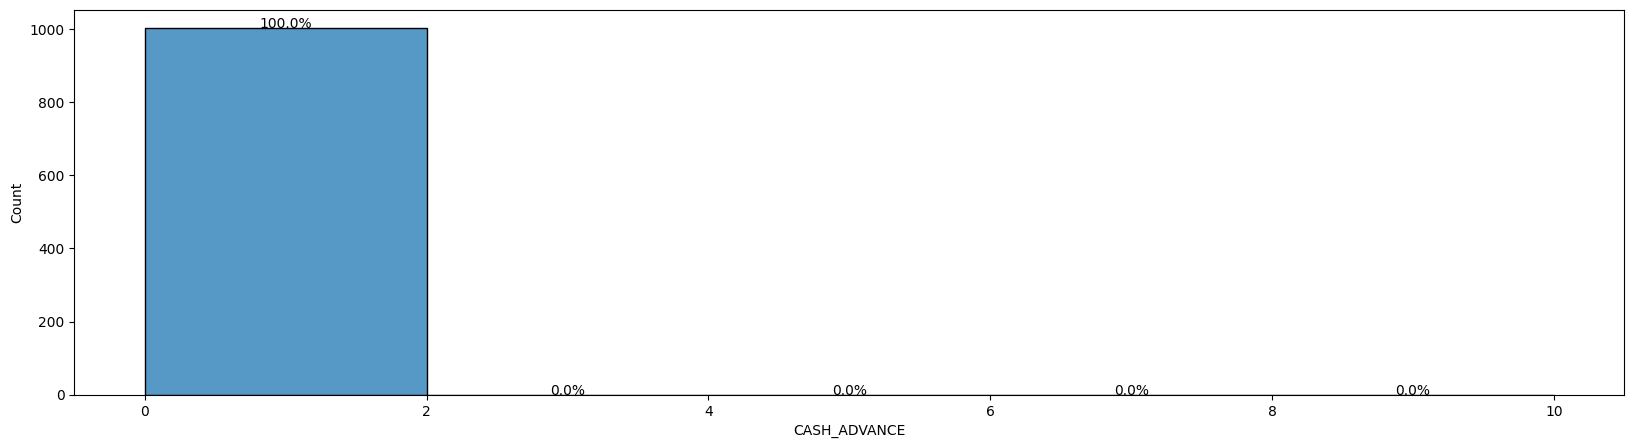

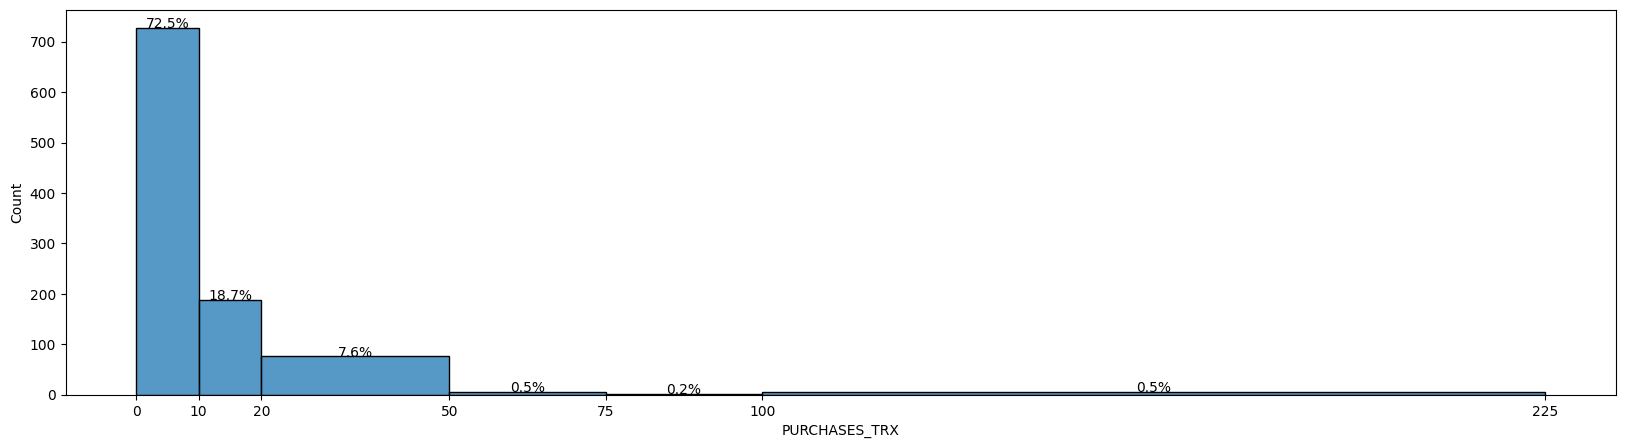

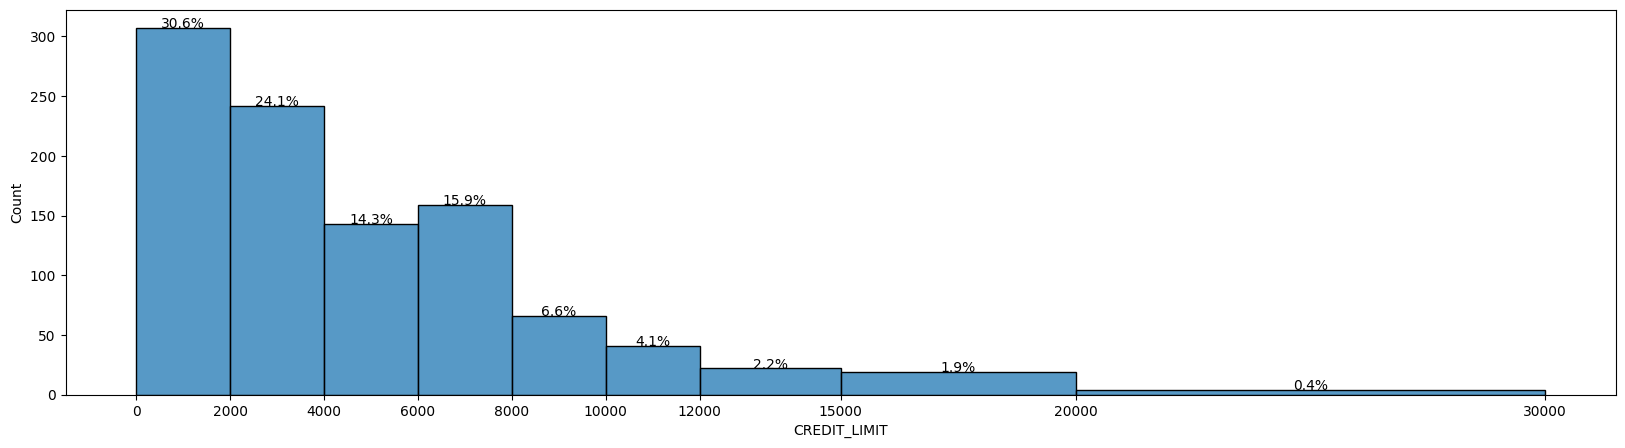

In [78]:
# Histogram plot of Balance column
col = ['BALANCE']
bins = [0, 500, 1000, 2000,4000, 6000, 20000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_4, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_4)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of BALANCE_FREQUENCY column
col = ['BALANCE_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_4, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_4)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of PURCHASES column

col = ['PURCHASES']
bins = [0, 500,1000, 2000, 4000,15000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_4, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_4)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_FREQUENCY' column
col = ['PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_4, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_4)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of 'ONEOFF_PURCHASES_FREQUENCY' column
col = ['ONEOFF_PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_4, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_4)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of INSTALLMENTS_PURCHASES column

col = ['INSTALLMENTS_PURCHASES']
bins = [0,10,20]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(30, 10))
    ax = sns.histplot(data=cluster_4, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_4)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of CASH_ADVANCE column

col = ['CASH_ADVANCE']
bins = [0,2,4,6,8,10]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_4, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_4)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_TRX' column
col = ['PURCHASES_TRX']
bins = [0,10,20,50,75,100,225]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_4, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_4)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'CREDIT_LIMIT' column
col = ['CREDIT_LIMIT']
bins = [0,2000,4000, 6000,8000, 10000,12000,15000,20000,30000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_4, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_4)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

This segment focuses on customers who steer clear of specific types of purchases, providing inventive savings approaches and individualized recommendations.







#### Cluster 5

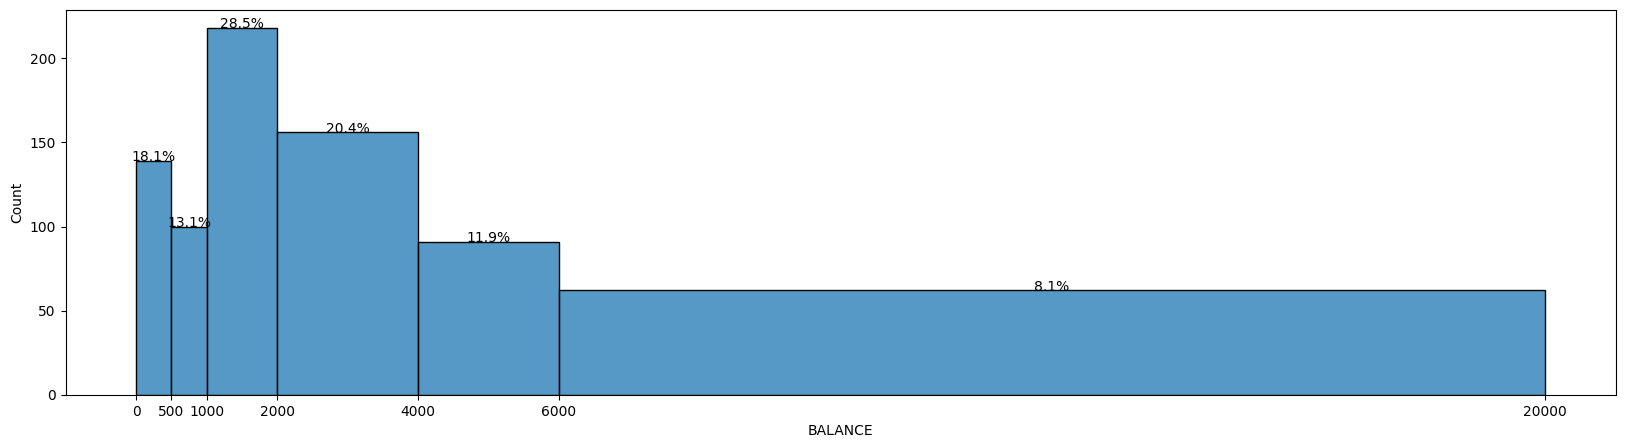

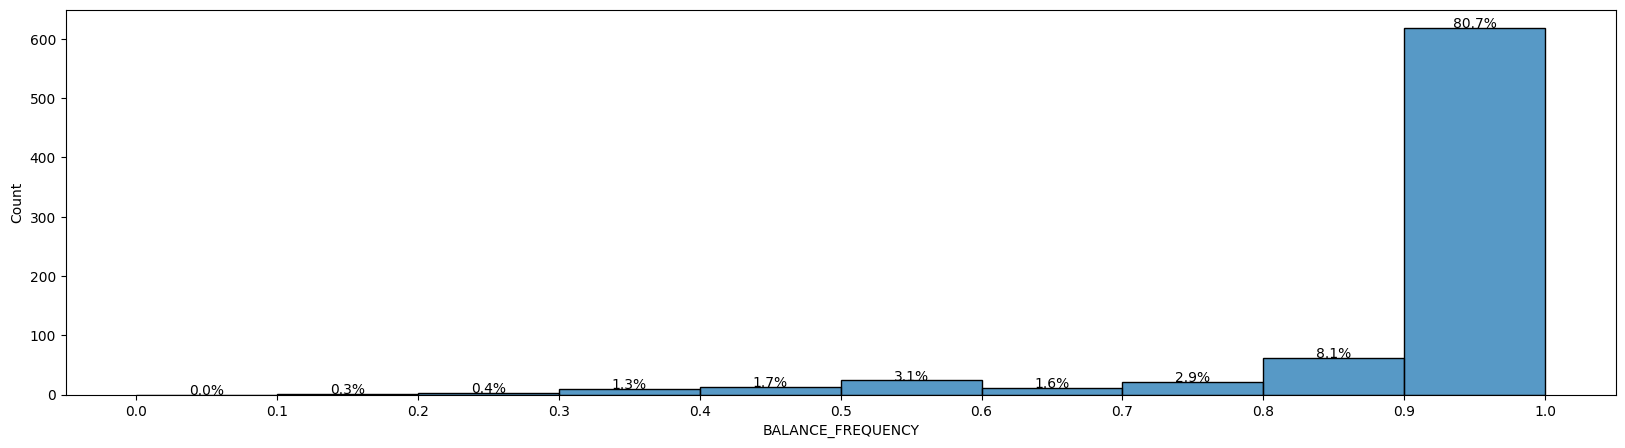

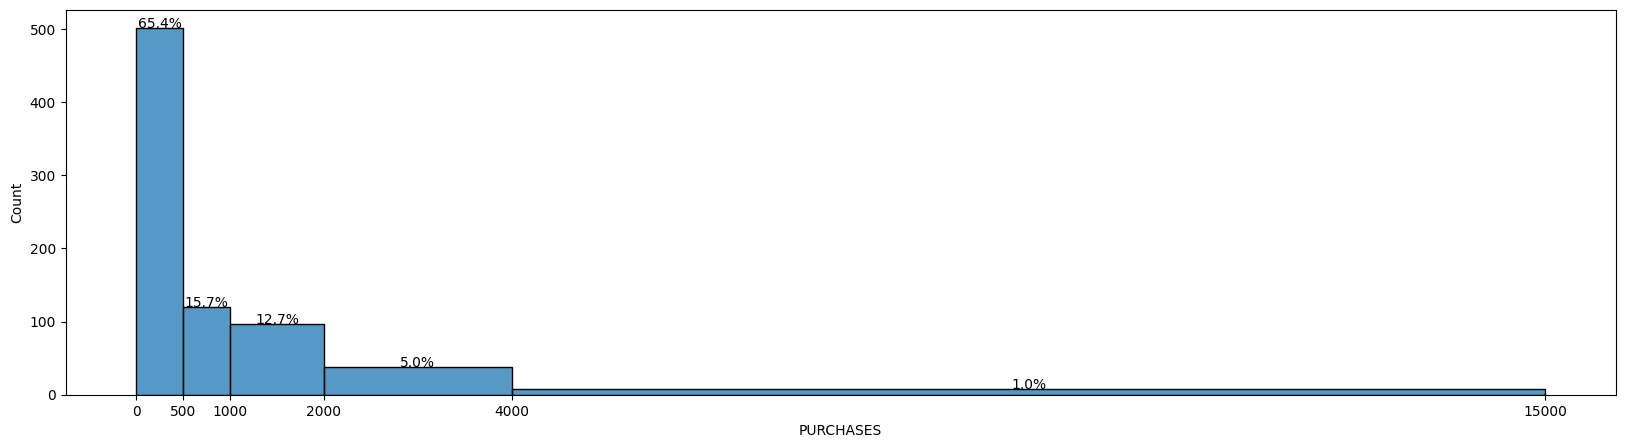

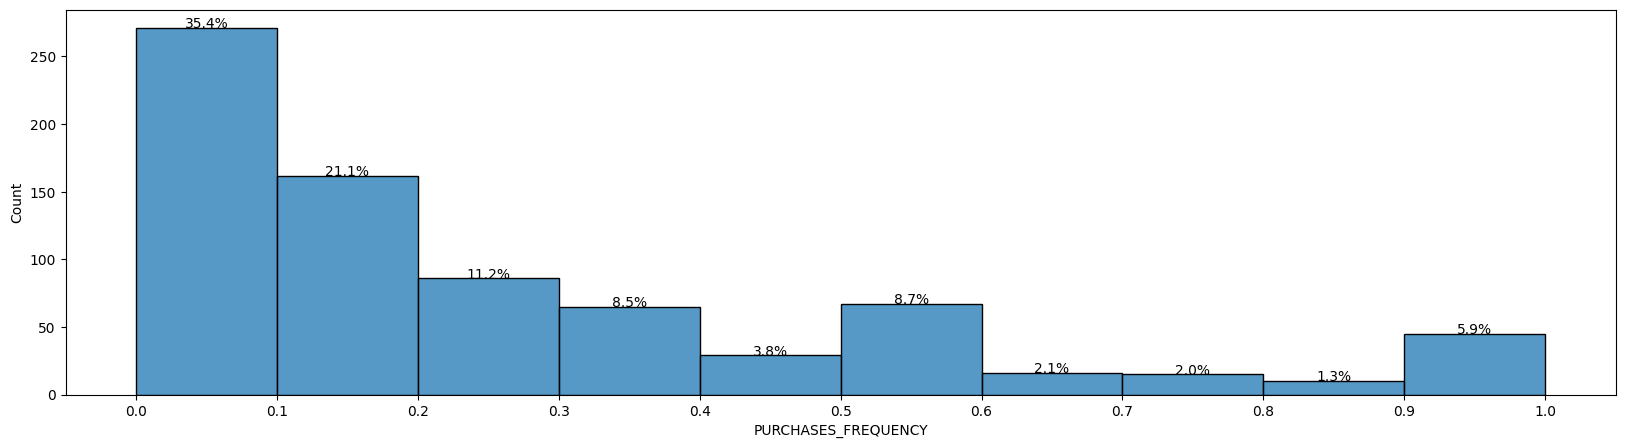

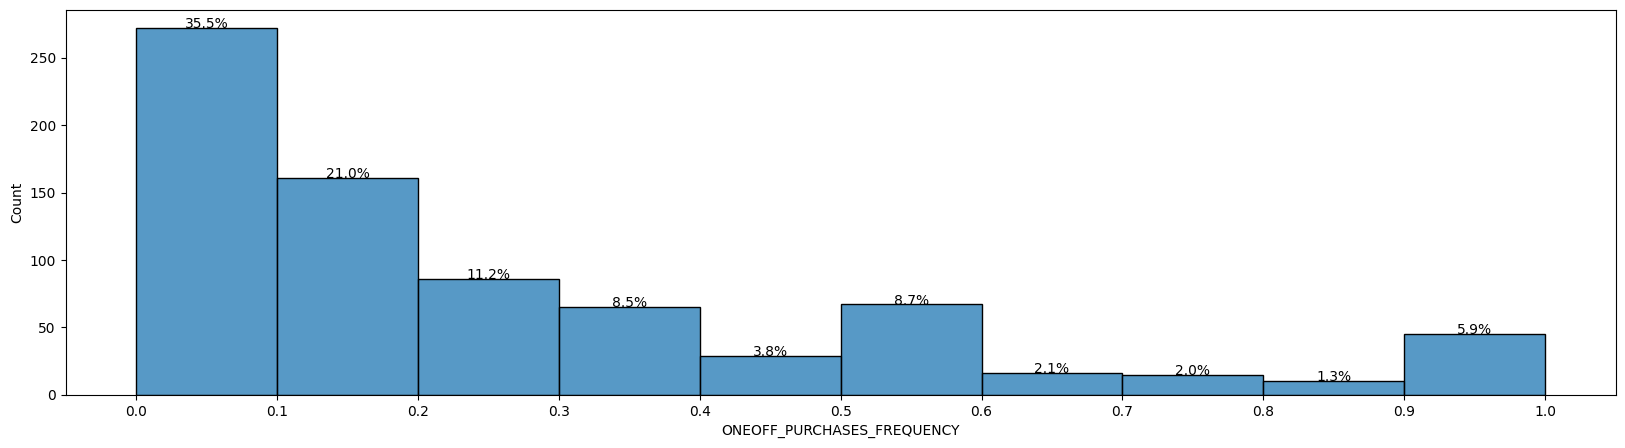

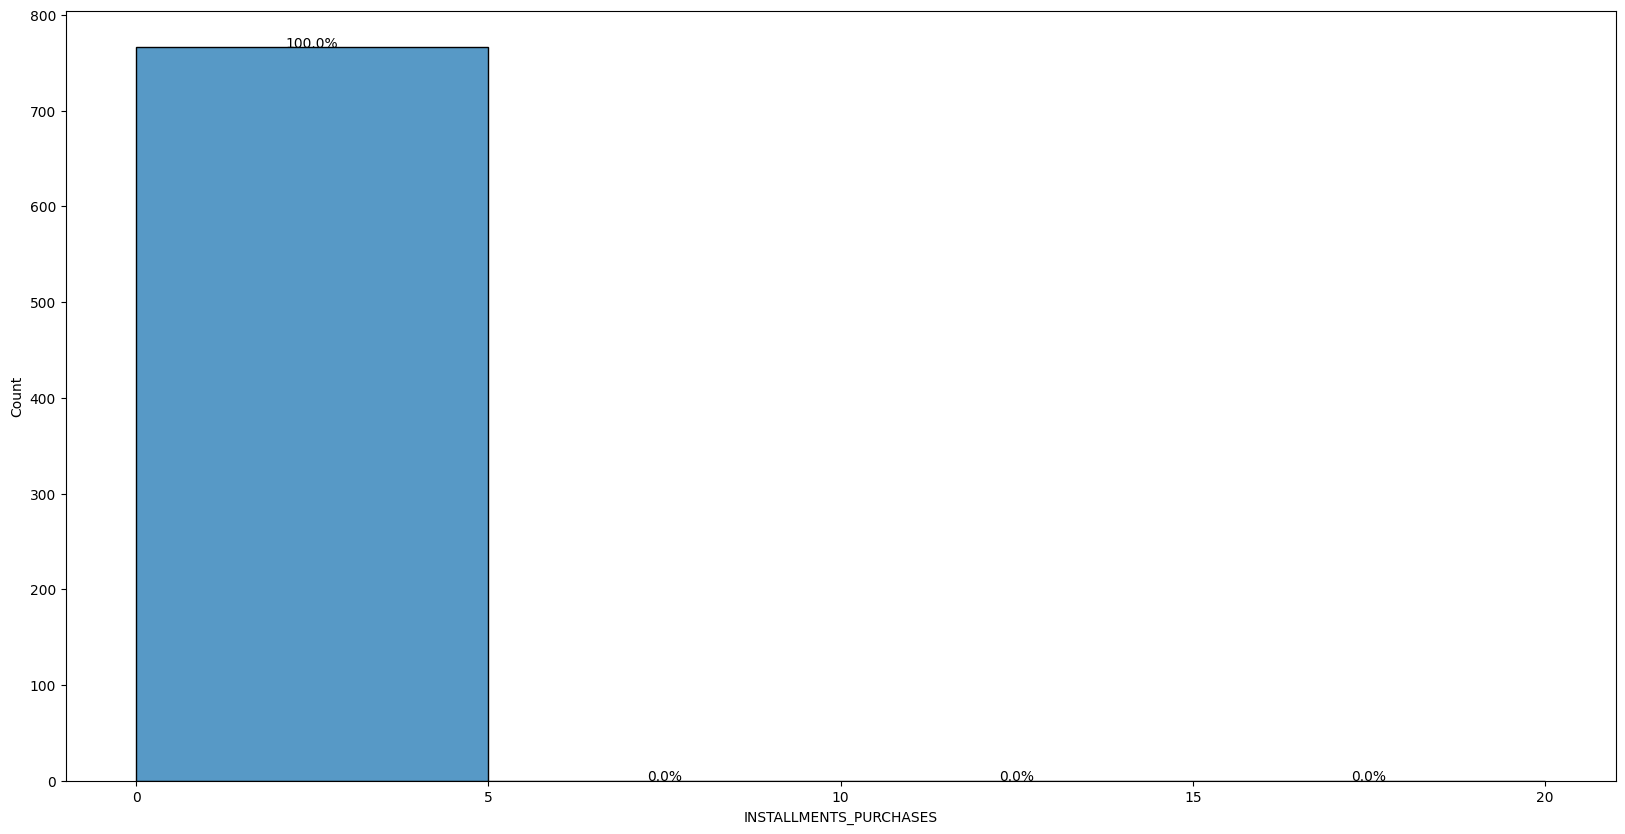

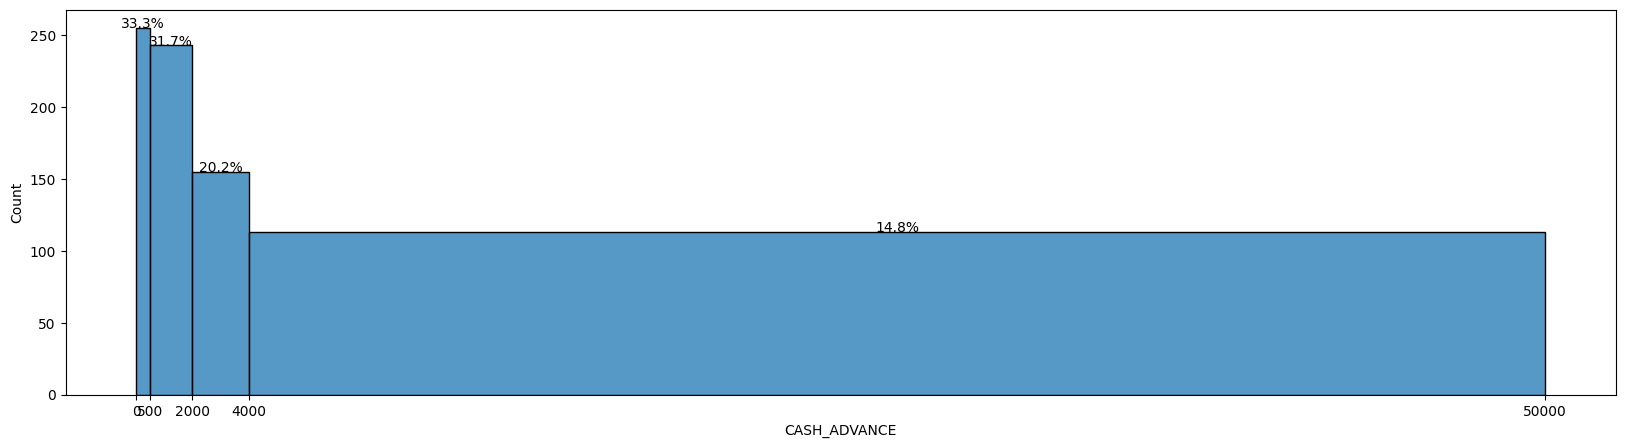

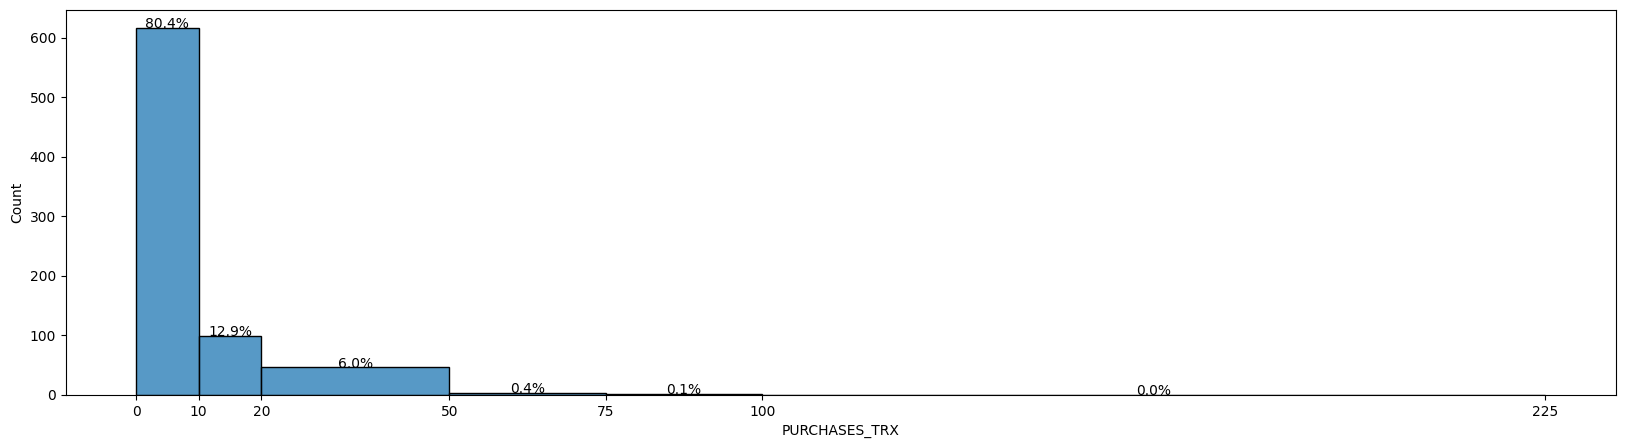

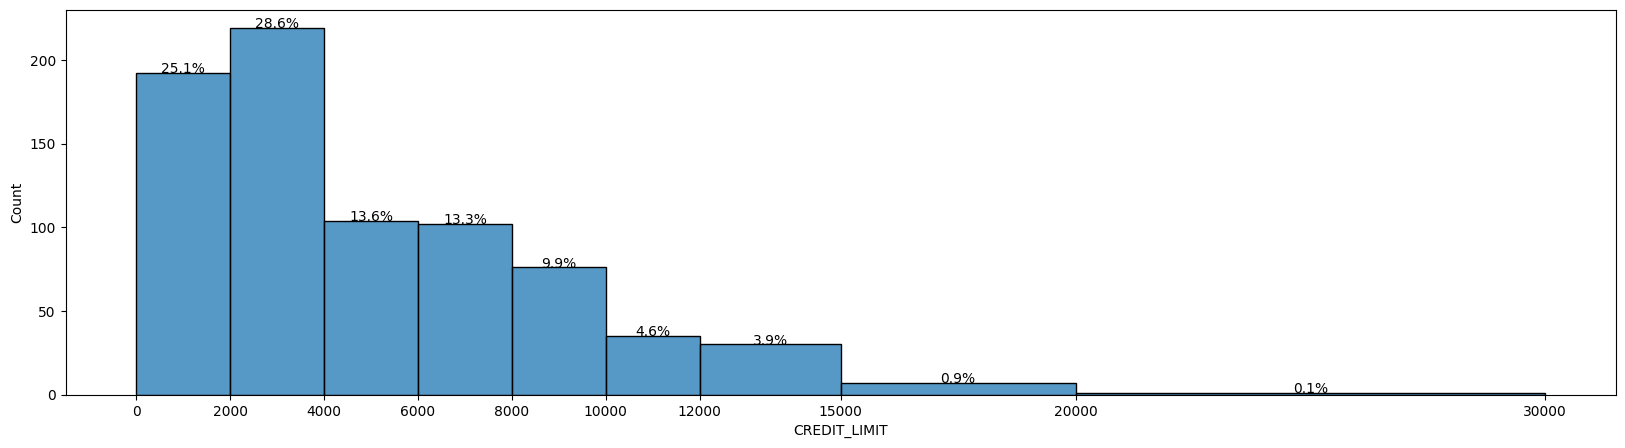

In [76]:
# Histogram plot of Balance column
col = ['BALANCE']
bins = [0, 500, 1000, 2000,4000, 6000, 20000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_5, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_5)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of BALANCE_FREQUENCY column
col = ['BALANCE_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_5, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_5)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of PURCHASES column

col = ['PURCHASES']
bins = [0, 500,1000, 2000, 4000,15000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_5, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_5)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_FREQUENCY' column
col = ['PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_5, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_5)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of 'ONEOFF_PURCHASES_FREQUENCY' column
col = ['ONEOFF_PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_5, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_5)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of INSTALLMENTS_PURCHASES column

col = ['INSTALLMENTS_PURCHASES']
bins = [0,5,10,15,20]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 10))
    ax = sns.histplot(data=cluster_5, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_5)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of CASH_ADVANCE column

col = ['CASH_ADVANCE']
bins = [0, 500, 2000, 4000,50000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_5, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_5)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_TRX' column
col = ['PURCHASES_TRX']
bins = [0,10,20,50,75,100,225]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_5, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_5)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'CREDIT_LIMIT' column
col = ['CREDIT_LIMIT']
bins = [0,2000,4000, 6000,8000, 10000,12000,15000,20000,30000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_5, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_5)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the figure above, this segment is characterized by efficient utilization of cash advance methods. It emphasizes facilitating effortless purchases without installment plans, offering simplified payment choices and swift transactions.


#### Cluster 6

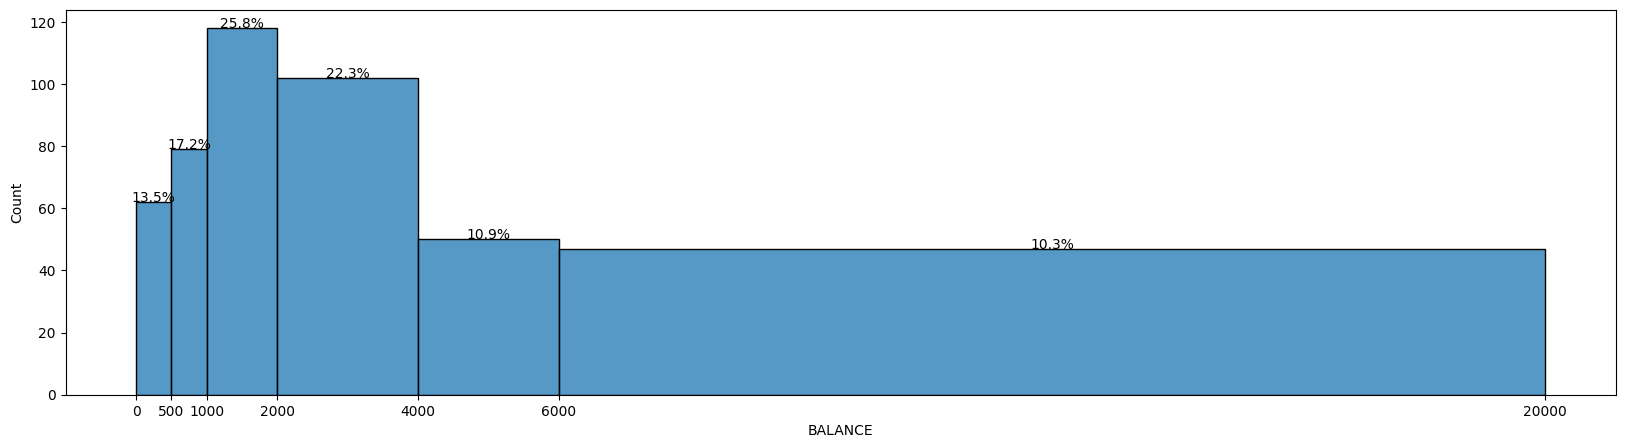

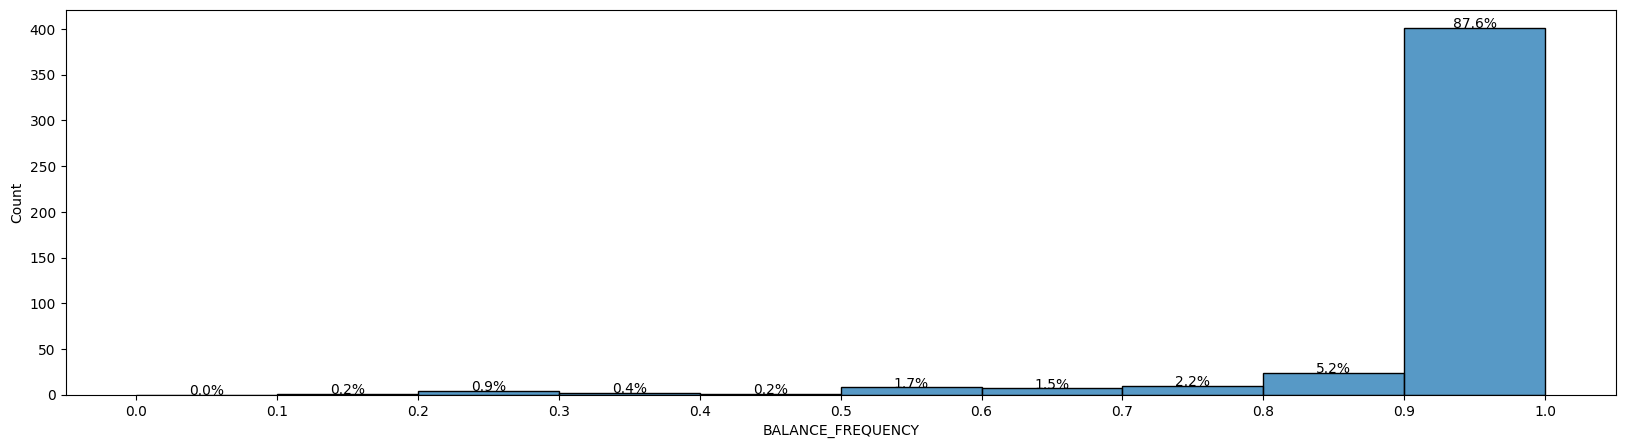

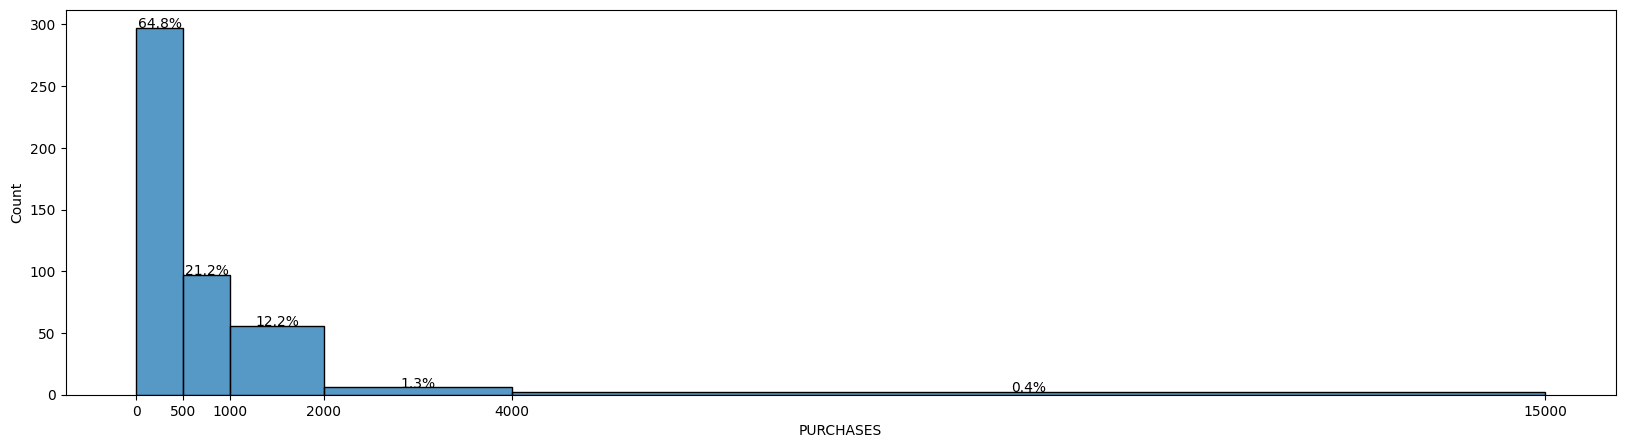

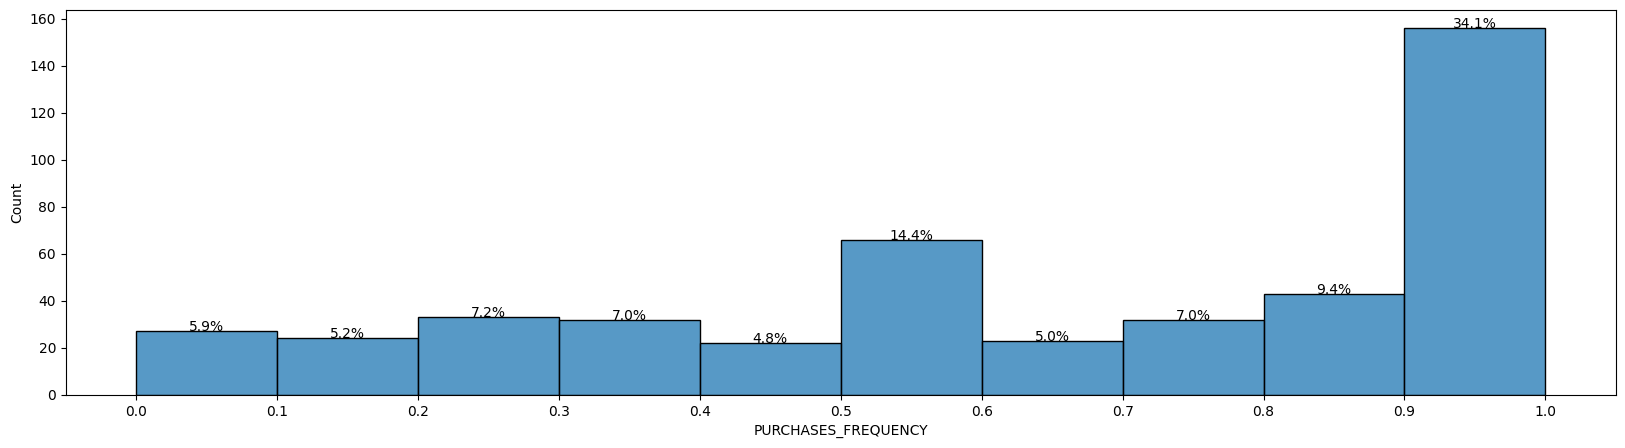

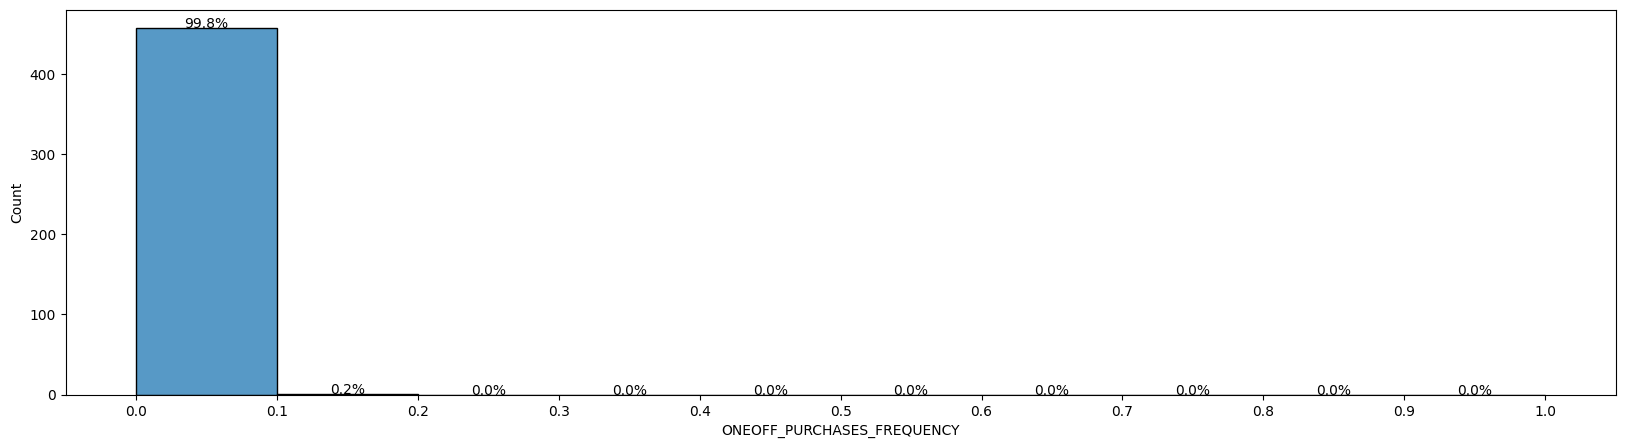

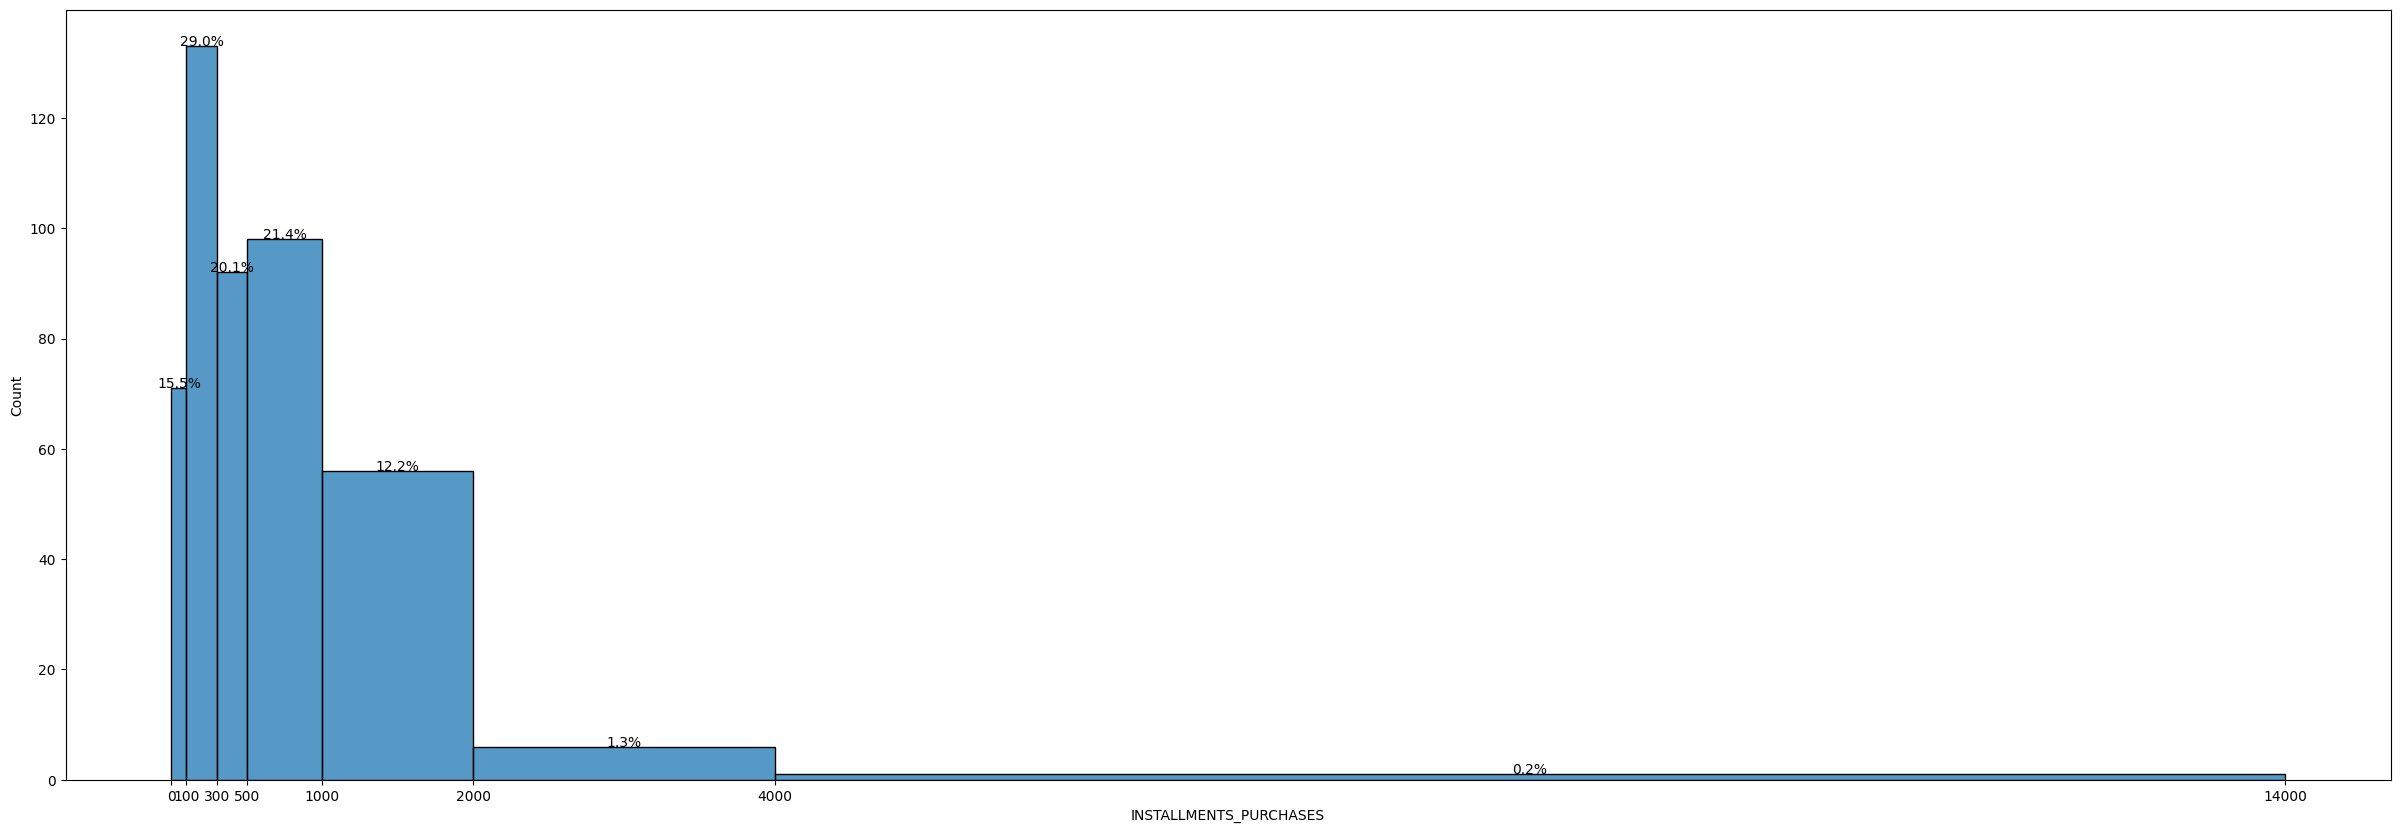

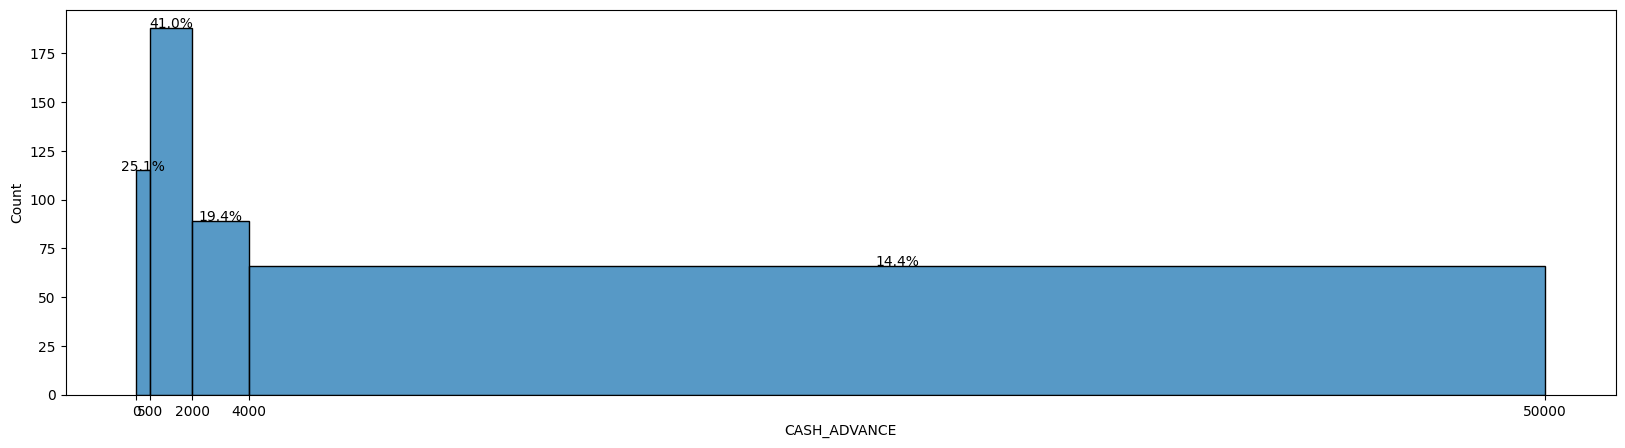

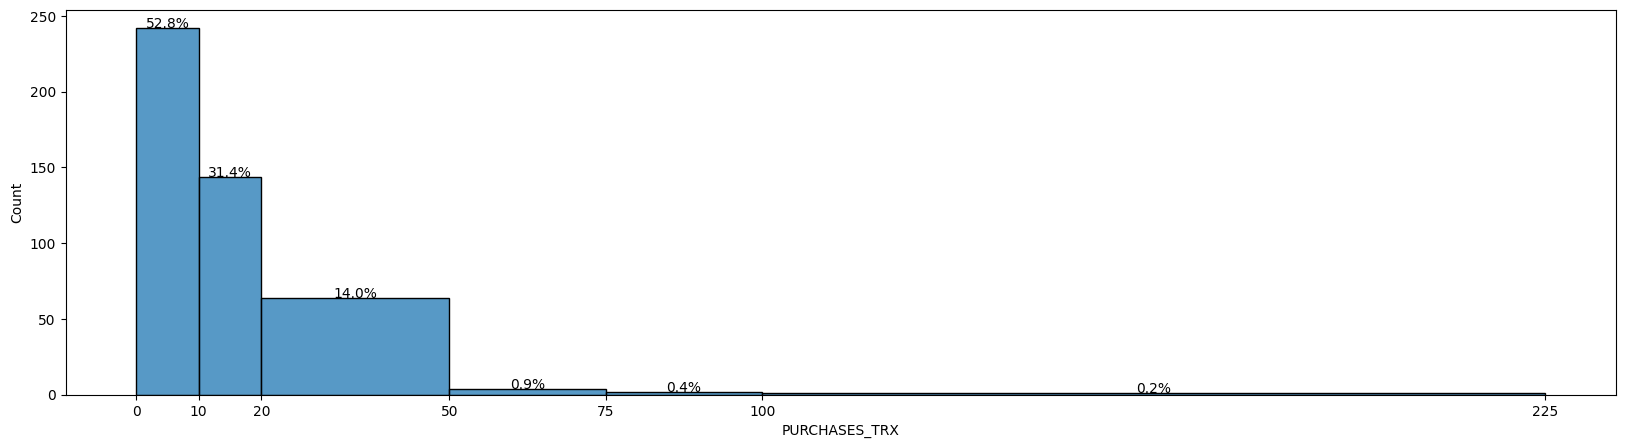

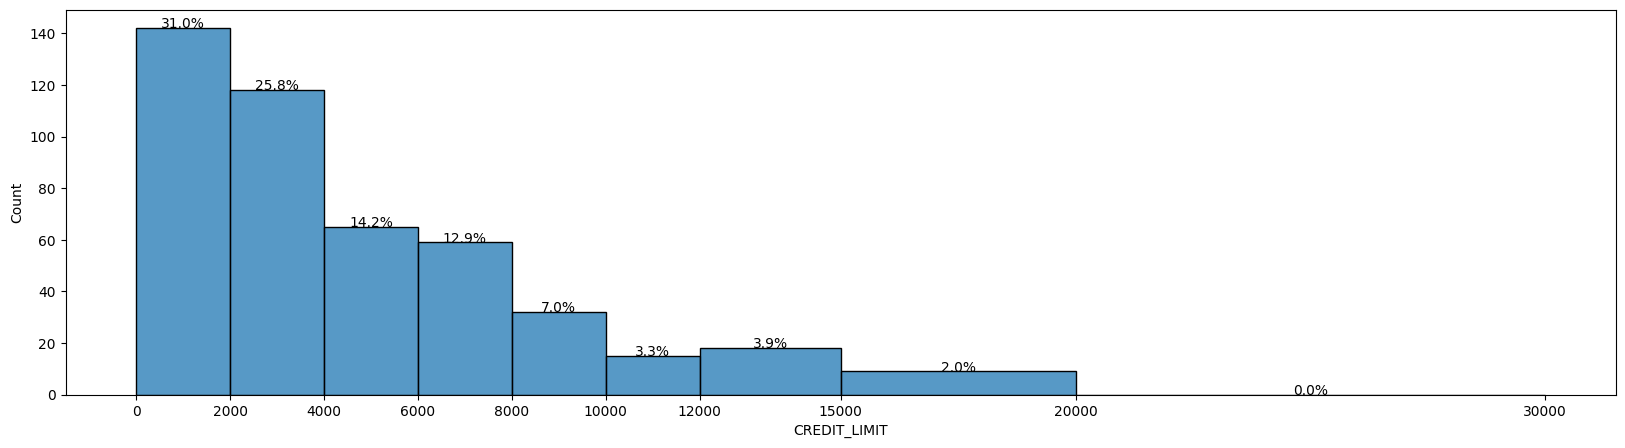

In [77]:
# Histogram plot of Balance column
col = ['BALANCE']
bins = [0, 500, 1000, 2000,4000, 6000, 20000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_6, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_6)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of BALANCE_FREQUENCY column
col = ['BALANCE_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_6, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_6)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of PURCHASES column

col = ['PURCHASES']
bins = [0, 500,1000, 2000, 4000,15000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_6, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_6)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_FREQUENCY' column
col = ['PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_6, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_6)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

# Histogram plot of 'ONEOFF_PURCHASES_FREQUENCY' column
col = ['ONEOFF_PURCHASES_FREQUENCY']
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_6, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_6)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of INSTALLMENTS_PURCHASES column

col = ['INSTALLMENTS_PURCHASES']
bins = [0, 100, 300, 500, 1000, 2000, 4000, 14000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(30, 10))
    ax = sns.histplot(data=cluster_6, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_6)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of CASH_ADVANCE column

col = ['CASH_ADVANCE']
bins = [0, 500, 2000, 4000,50000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_6, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_6)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'PURCHASES_TRX' column
col = ['PURCHASES_TRX']
bins = [0,10,20,50,75,100,225]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_6, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_6)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()
    
# Histogram plot of 'CREDIT_LIMIT' column
col = ['CREDIT_LIMIT']
bins = [0,2000,4000, 6000,8000, 10000,12000,15000,20000,30000]
stat = ['count', 'percent']

for i in range(len(col)):
    plt.figure(figsize=(20, 5))
    ax = sns.histplot(data=cluster_6, x=col[i], bins=bins, stat=stat[i])

    total_count = len(cluster_6)

    patches = ax.patches
    for j in range(len(patches)):
        percentage = '{:.1f}%'.format(100 * (patches[j].get_height() / total_count))
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')
    ax.set_xticks(bins)

    plt.show()

From the figures above, this segment opts for installment purchases and tends to avoid making large volume purchases at once. It caters to customers who favor cash transactions over advance payments, providing adaptable payment options and financial flexibility.